In [60]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

### 1. Data

In [62]:
country_ds = pd.read_csv(r'world-data-2023.csv',\
                        index_col='Country')
country_ds

Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
Country                                                           
Afghanistan               60           AF                58.10%   
Albania                  105           AL                43.10%   
Algeria                   18           DZ                17.40%   
Andorra                  164           AD                40.00%   
Angola                    26           AO                47.50%   
...                      ...          ...                   ...   
Venezuela                 32           VE                24.50%   
Vietnam                  314           VN                39.30%   
Yemen                     56           YE                44.60%   
Zambia                    25           ZM                32.10%   
Zimbabwe                  38           ZW                41.90%   

            Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
Country                                                                  
Afghanistan        652,230           323,000       32.49          93.0   
Albania             28,748             9,000       11.78         355.0   
Algeria          2,381,741           317,000       24.28         213.0   
Andorra                468               NaN        7.20         376.0   
Angola           1,246,700           117,000       40.73         244.0   
...                    ...               ...         ...           ...   
Venezuela          912,050           343,000       17.88          58.0   
Vietnam            331,210           522,000       16.75          84.0   
Yemen              527,968            40,000       30.45         967.0   
Zambia             752,618            16,000       36.19         260.0   
Zimbabwe           390,757            51,000       30.68         263.0   

            Capital/Major City Co2-Emissions       CPI  ...  \
Country                                                 ...   
Afghanistan              Kabul         8,672     149.9  ...   
Albania                 Tirana         4,536    119.05  ...   
Algeria                Algiers       150,006    151.36  ...   
Andorra       Andorra la Vella           469       NaN  ...   
Angola                  Luanda        34,693    261.73  ...   
...                        ...           ...       ...  ...   
Venezuela              Caracas       164,175  2,740.27  ...   
Vietnam                  Hanoi       192,668    163.52  ...   
Yemen                    Sanaa        10,609    157.58  ...   
Zambia                  Lusaka         5,141    212.31  ...   
Zimbabwe                Harare        10,983    105.51  ...   

            Out of pocket health expenditure Physicians per thousand  \
Country                                                                
Afghanistan                           78.40%                    0.28   
Albania                               56.90%                    1.20   
Algeria                               28.10%                    1.72   
Andorra                               36.40%                    3.33   
Angola                                33.40%                    0.21   
...                                      ...                     ...   
Venezuela                             45.80%                    1.92   
Vietnam                               43.50%                    0.82   
Yemen                                 81.00%                    0.31   
Zambia                                27.50%                    1.19   
Zimbabwe                              25.80%                    0.21   

             Population Population: Labor force participation (%)  \
Country                                                             
Afghanistan  38,041,754                                    48.90%   
Albania       2,854,191                                    55.70%   
Algeria      43,053,054                                    41.20%   
Andorra          77,142                                       NaN   
Angola

In [63]:
country_ds.tail()


Density\n(P/Km2) Abbreviation Agricultural Land( %) Land Area(Km2)  \
Country                                                                        
Venezuela               32           VE                24.50%        912,050   
Vietnam                314           VN                39.30%        331,210   
Yemen                   56           YE                44.60%        527,968   
Zambia                  25           ZM                32.10%        752,618   
Zimbabwe                38           ZW                41.90%        390,757   

          Armed Forces size  Birth Rate  Calling Code Capital/Major City  \
Country                                                                    
Venezuela           343,000       17.88          58.0            Caracas   
Vietnam             522,000       16.75          84.0              Hanoi   
Yemen                40,000       30.45         967.0              Sanaa   
Zambia               16,000       36.19         260.0             Lusaka   
Zimbabwe             51,000       30.68         263.0             Harare   

          Co2-Emissions       CPI  ... Out of pocket health expenditure  \
Country                            ...                                    
Venezuela       164,175  2,740.27  ...                           45.80%   
Vietnam         192,668    163.52  ...                           43.50%   
Yemen            10,609    157.58  ...                           81.00%   
Zambia            5,141    212.31  ...                           27.50%   
Zimbabwe         10,983    105.51  ...                           25.80%   

          Physicians per thousand  Population  \
Country                                         
Venezuela                    1.92  28,515,829   
Vietnam                      0.82  96,462,106   
Yemen                        0.31  29,161,922   
Zambia                       1.19  17,861,030   
Zimbabwe                     0.21  14,645,468   

          Population: Labor force participation (%) Tax revenue (%)  \
Country                                                               
Venezuela                                    59.70%             NaN   
Vietnam                                      77.40%          19.10%   
Yemen                                        38.00%             NaN   
Zambia                                       74.60%          16.20%   
Zimbabwe                                     83.10%          20.70%   

          Total tax rate Unemployment rate Urban_population   Latitude  \
Country                                                                  
Venezuela         73.30%             8.80%       25,162,368   6.423750   
Vietnam           37.60%             2.01%       35,332,140  14.058324   
Yemen             26.60%            12.91%       10,869,523  15.552727   
Zambia            15.60%            11.43%        7,871,713 -13.133897   
Zimbabwe          31.60%             4.95%        4,717,305 -19.015438   

            Longitude  
Country                
Venezuela  -66.589730  
Vietnam    108.277199  
Yemen       48.516388  
Zambia      27.849332  
Zimbabwe    29.154857  

[5 rows x 34 columns]

In [64]:
country_ds.shape


(195, 34)

In [65]:
country_ds.dtypes


Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       object
Infant mortality                             f

#### 1.1 Data Cleaning

In [66]:
print('Number of duplicate observations in the dataset:', country_ds.duplicated().sum())


Number of duplicate observations in the dataset: 0


In [67]:
# Looking for missing values
for col in country_ds.columns:
    print('{} - missing Values: {}'.format(col, country_ds[col].isnull().sum()))

Density
(P/Km2) - missing Values: 0
Abbreviation - missing Values: 7
Agricultural Land( %) - missing Values: 7
Land Area(Km2) - missing Values: 1
Armed Forces size - missing Values: 24
Birth Rate - missing Values: 6
Calling Code - missing Values: 1
Capital/Major City - missing Values: 3
Co2-Emissions - missing Values: 7
CPI - missing Values: 17
CPI Change (%) - missing Values: 16
Currency-Code - missing Values: 15
Fertility Rate - missing Values: 7
Forested Area (%) - missing Values: 7
Gasoline Price - missing Values: 20
GDP - missing Values: 2
Gross primary education enrollment (%) - missing Values: 7
Gross tertiary education enrollment (%) - missing Values: 12
Infant mortality - missing Values: 6
Largest city - missing Values: 6
Life expectancy - missing Values: 8
Maternal mortality ratio - missing Values: 14
Minimum wage - missing Values: 45
Official language - missing Values: 5
Out of pocket health expenditure - missing Values: 7
Physicians per thousand - missing Values: 7
Populati

In [68]:
# Correcting data types for specified columns
data = country_ds.copy()

# List of columns with incorrect data types
wrong_dtype_columns = ['Density\n(P/Km2)',
                       'Agricultural Land( %)',
                       'Land Area(Km2)',
                       'Armed Forces size',
                       'Co2-Emissions',
                       'CPI',
                       'CPI Change (%)',
                       'Forested Area (%)',
                       'Gasoline Price',
                       'GDP',
                       'Gross primary education enrollment (%)',
                       'Gross tertiary education enrollment (%)',
                       'Minimum wage',
                       'Out of pocket health expenditure',
                       'Population',
                       'Population: Labor force participation (%)',
                       'Tax revenue (%)',
                       'Total tax rate',
                       'Unemployment rate',
                       'Urban_population']

# Transform columns to float by removing special characters and converting to numeric values
data[wrong_dtype_columns] = data[wrong_dtype_columns].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))

In [69]:
import pandas as pd

# Assuming you have your DataFrame loaded as df
df = data.drop(['Abbreviation', 'Latitude', 'Official language', 'Capital/Major City', 'Longitude', 'Currency-Code', 'Calling Code', 'Largest city'], axis=1)


In [70]:
missing_values_per_column = df.isnull().sum()
missing_values_per_column

Density\n(P/Km2)                              0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Life expectancy                               8
Maternal mortality ratio                     14
Minimum wage                                 45
Out of pocket health expenditure              7
Physicians per thousand                       7
Population                              

In [71]:
df.dropna(inplace=True)
df


Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
Country                                                                   
Afghanistan                 60.0                   58.1        652230.0   
Albania                    105.0                   43.1         28748.0   
Algeria                     18.0                   17.4       2381741.0   
Angola                      26.0                   47.5       1246700.0   
Argentina                   17.0                   54.3       2780400.0   
...                          ...                    ...             ...   
United Kingdom             281.0                   71.7        243610.0   
United States               36.0                   44.4       9833517.0   
Uruguay                     20.0                   82.6        176215.0   
Vietnam                    314.0                   39.3        331210.0   
Zambia                      25.0                   32.1        752618.0   

                Armed Forces size  Birth Rate  Co2-Emissions     CPI  \
Country                                                                
Afghanistan              323000.0       32.49         8672.0  149.90   
Albania                    9000.0       11.78         4536.0  119.05   
Algeria                  317000.0       24.28       150006.0  151.36   
Angola                   117000.0       40.73        34693.0  261.73   
Argentina                105000.0       17.02       201348.0  232.75   
...                           ...         ...            ...     ...   
United Kingdom           148000.0       11.00       379025.0  119.62   
United States           1359000.0       11.60      5006302.0  117.24   
Uruguay                   22000.0       13.86         6766.0  202.92   
Vietnam                  522000.0       16.75       192668.0  163.52   
Zambia                    16000.0       36.19         5141.0  212.31   

                CPI Change (%)  Fertility Rate  Forested Area (%)  ...  \
Country                                                            ...   
Afghanistan                2.3            4.47                2.1  ...   
Albania                    1.4            1.62               28.1  ...   
Algeria                    2.0            3.02                0.8  ...   
Angola                    17.1            5.52               46.3  ...   
Argentina                 53.5            2.26                9.8  ...   
...                        ...             ...                ...  ...   
United Kingdom             1.7            1.68               13.1  ...   
United States              7.5            1.73               33.9  ...   
Uruguay                    7.9            1.97               10.7  ...   
Vietnam                    2.8            2.05               48.1  ...   
Zambia                     9.2            4.63               65.2  ...   

                Maternal mortality ratio  Minimum wage  \
Country                                                  
Afghanistan                        638.0          0.43   
Albania                             15.0          1.12   
Algeria                            112.0          0.95   
Angola                             241.0          0.71   
Argentina                           39.0          3.35   
...                                  ...           ...   
United Kingdom                       7.0         10.13   
United States                       19.0          7.25   
Uruguay                             17.0          1.66   
Vietnam                             43.0          0.73   
Zambia                             213.0          0.24   

                Out of pocket health expenditure  Physicians per thousand  \
Country                                                                     
Afghanistan                                 78.4                     0.28   
Albania                                     56.9                     1.20   
Algeria                                     28.1                     1.72   


In [72]:
df.drop('Gross primary education enrollment (%)', axis=1, inplace=True)


In [73]:
df.drop(df[df['Gross tertiary education enrollment (%)'] > 100].index, inplace=True)
df

Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
Country                                                                   
Afghanistan                 60.0                   58.1        652230.0   
Albania                    105.0                   43.1         28748.0   
Algeria                     18.0                   17.4       2381741.0   
Angola                      26.0                   47.5       1246700.0   
Argentina                   17.0                   54.3       2780400.0   
...                          ...                    ...             ...   
United Kingdom             281.0                   71.7        243610.0   
United States               36.0                   44.4       9833517.0   
Uruguay                     20.0                   82.6        176215.0   
Vietnam                    314.0                   39.3        331210.0   
Zambia                      25.0                   32.1        752618.0   

                Armed Forces size  Birth Rate  Co2-Emissions     CPI  \
Country                                                                
Afghanistan              323000.0       32.49         8672.0  149.90   
Albania                    9000.0       11.78         4536.0  119.05   
Algeria                  317000.0       24.28       150006.0  151.36   
Angola                   117000.0       40.73        34693.0  261.73   
Argentina                105000.0       17.02       201348.0  232.75   
...                           ...         ...            ...     ...   
United Kingdom           148000.0       11.00       379025.0  119.62   
United States           1359000.0       11.60      5006302.0  117.24   
Uruguay                   22000.0       13.86         6766.0  202.92   
Vietnam                  522000.0       16.75       192668.0  163.52   
Zambia                    16000.0       36.19         5141.0  212.31   

                CPI Change (%)  Fertility Rate  Forested Area (%)  ...  \
Country                                                            ...   
Afghanistan                2.3            4.47                2.1  ...   
Albania                    1.4            1.62               28.1  ...   
Algeria                    2.0            3.02                0.8  ...   
Angola                    17.1            5.52               46.3  ...   
Argentina                 53.5            2.26                9.8  ...   
...                        ...             ...                ...  ...   
United Kingdom             1.7            1.68               13.1  ...   
United States              7.5            1.73               33.9  ...   
Uruguay                    7.9            1.97               10.7  ...   
Vietnam                    2.8            2.05               48.1  ...   
Zambia                     9.2            4.63               65.2  ...   

                Maternal mortality ratio  Minimum wage  \
Country                                                  
Afghanistan                        638.0          0.43   
Albania                             15.0          1.12   
Algeria                            112.0          0.95   
Angola                             241.0          0.71   
Argentina                           39.0          3.35   
...                                  ...           ...   
United Kingdom                       7.0         10.13   
United States                       19.0          7.25   
Uruguay                             17.0          1.66   
Vietnam                             43.0          0.73   
Zambia                             213.0          0.24   

                Out of pocket health expenditure  Physicians per thousand  \
Country                                                                     
Afghanistan                                 78.4                     0.28   
Albania                                     56.9                     1.20   
Algeria                                     28.1                     1.72   


In [74]:

# Assuming your cleaned DataFrame is named 'df'
df.to_csv('cleaned_data.csv')


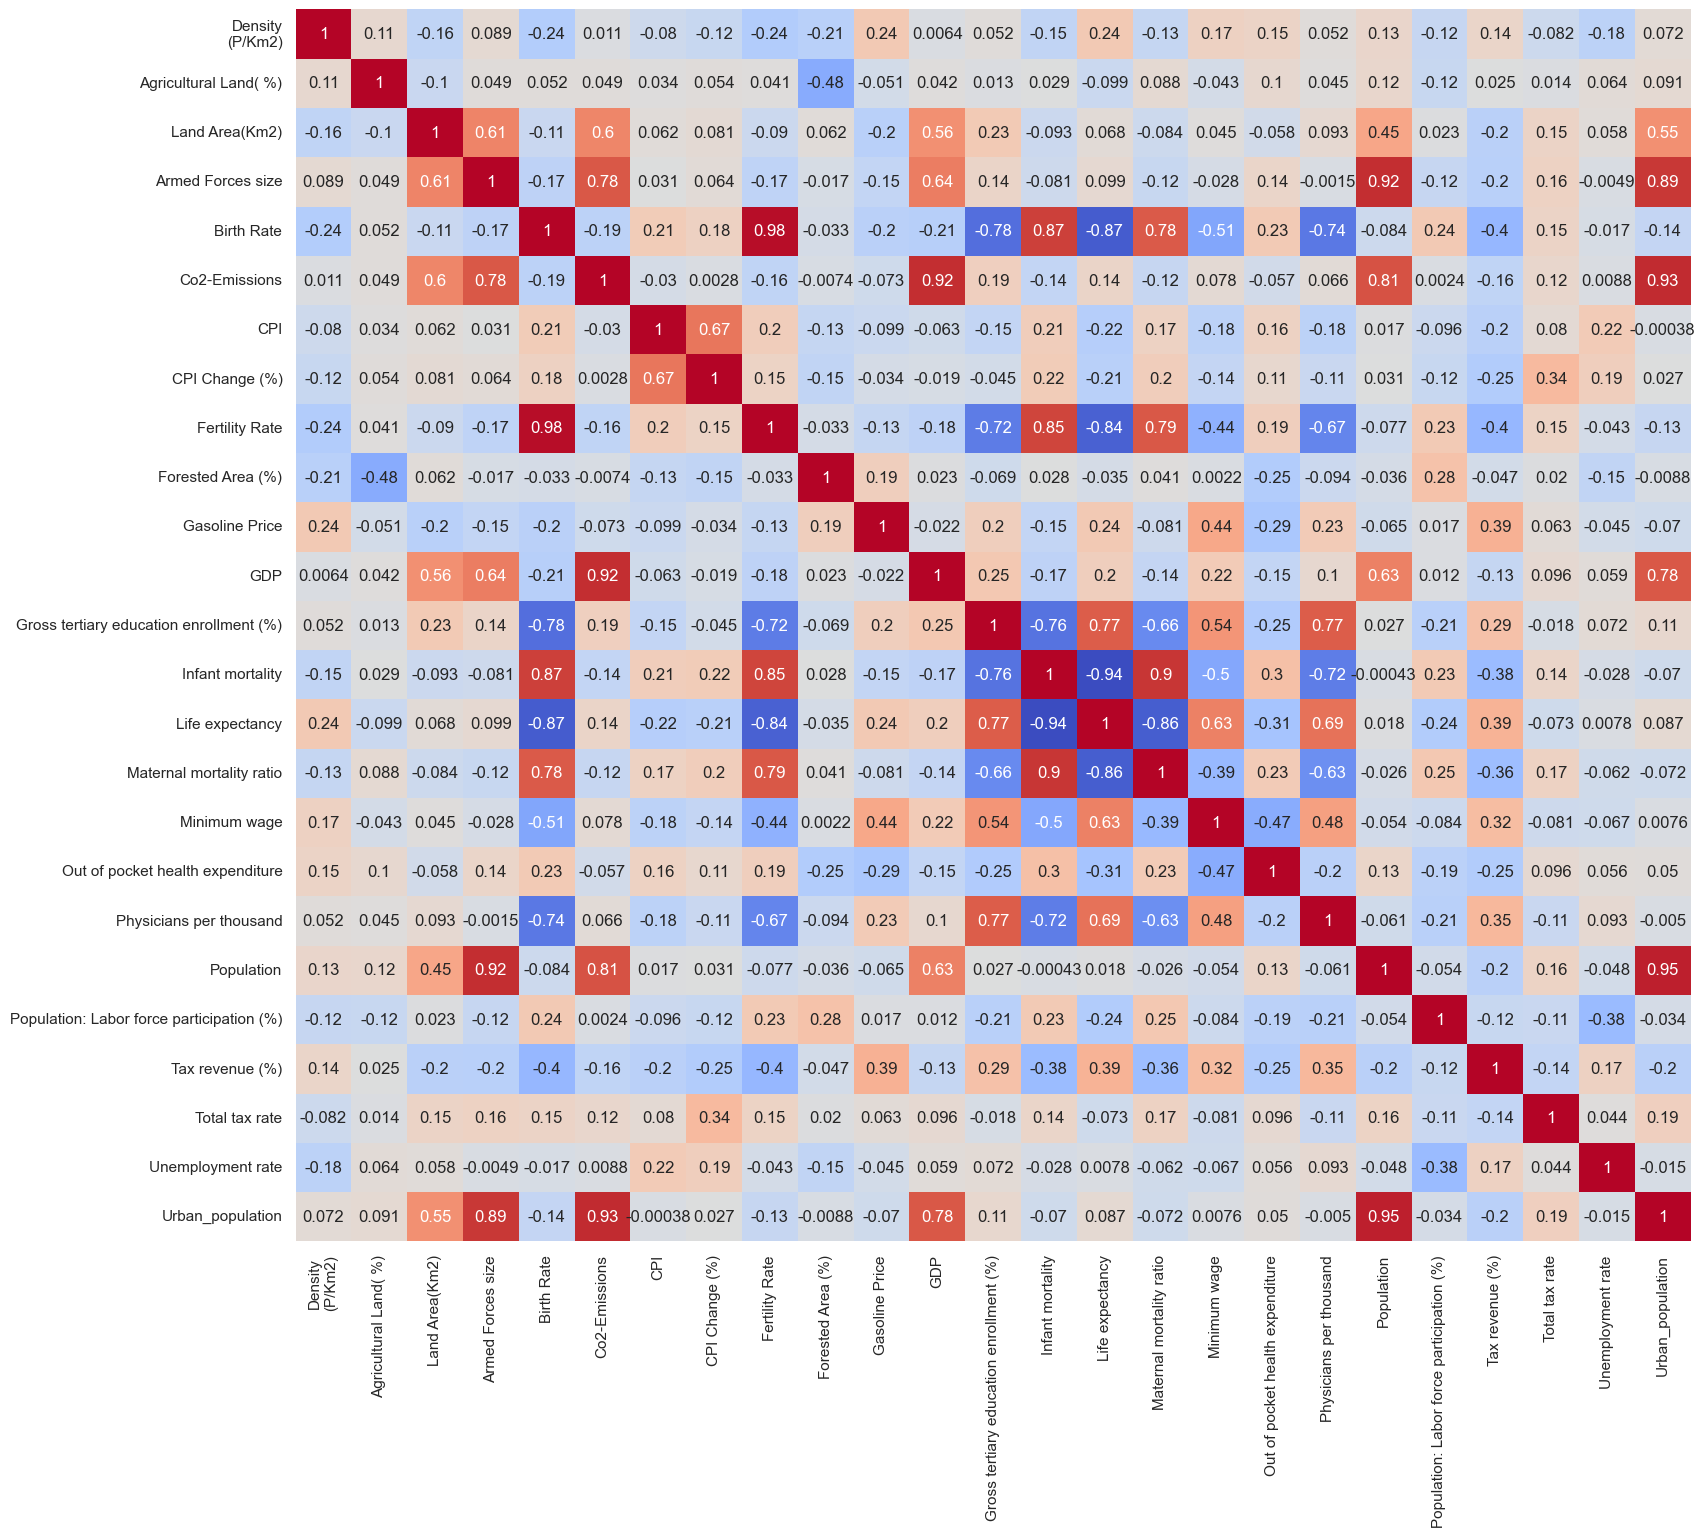

In [76]:
# Generating a linear correlation matrix to understand relationships between numerical features
correlation_matrix = df.corr(numeric_only=True)
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(18,16))
sns.heatmap(correlation_matrix, cbar=False, cmap='coolwarm', annot=True)
plt.show()

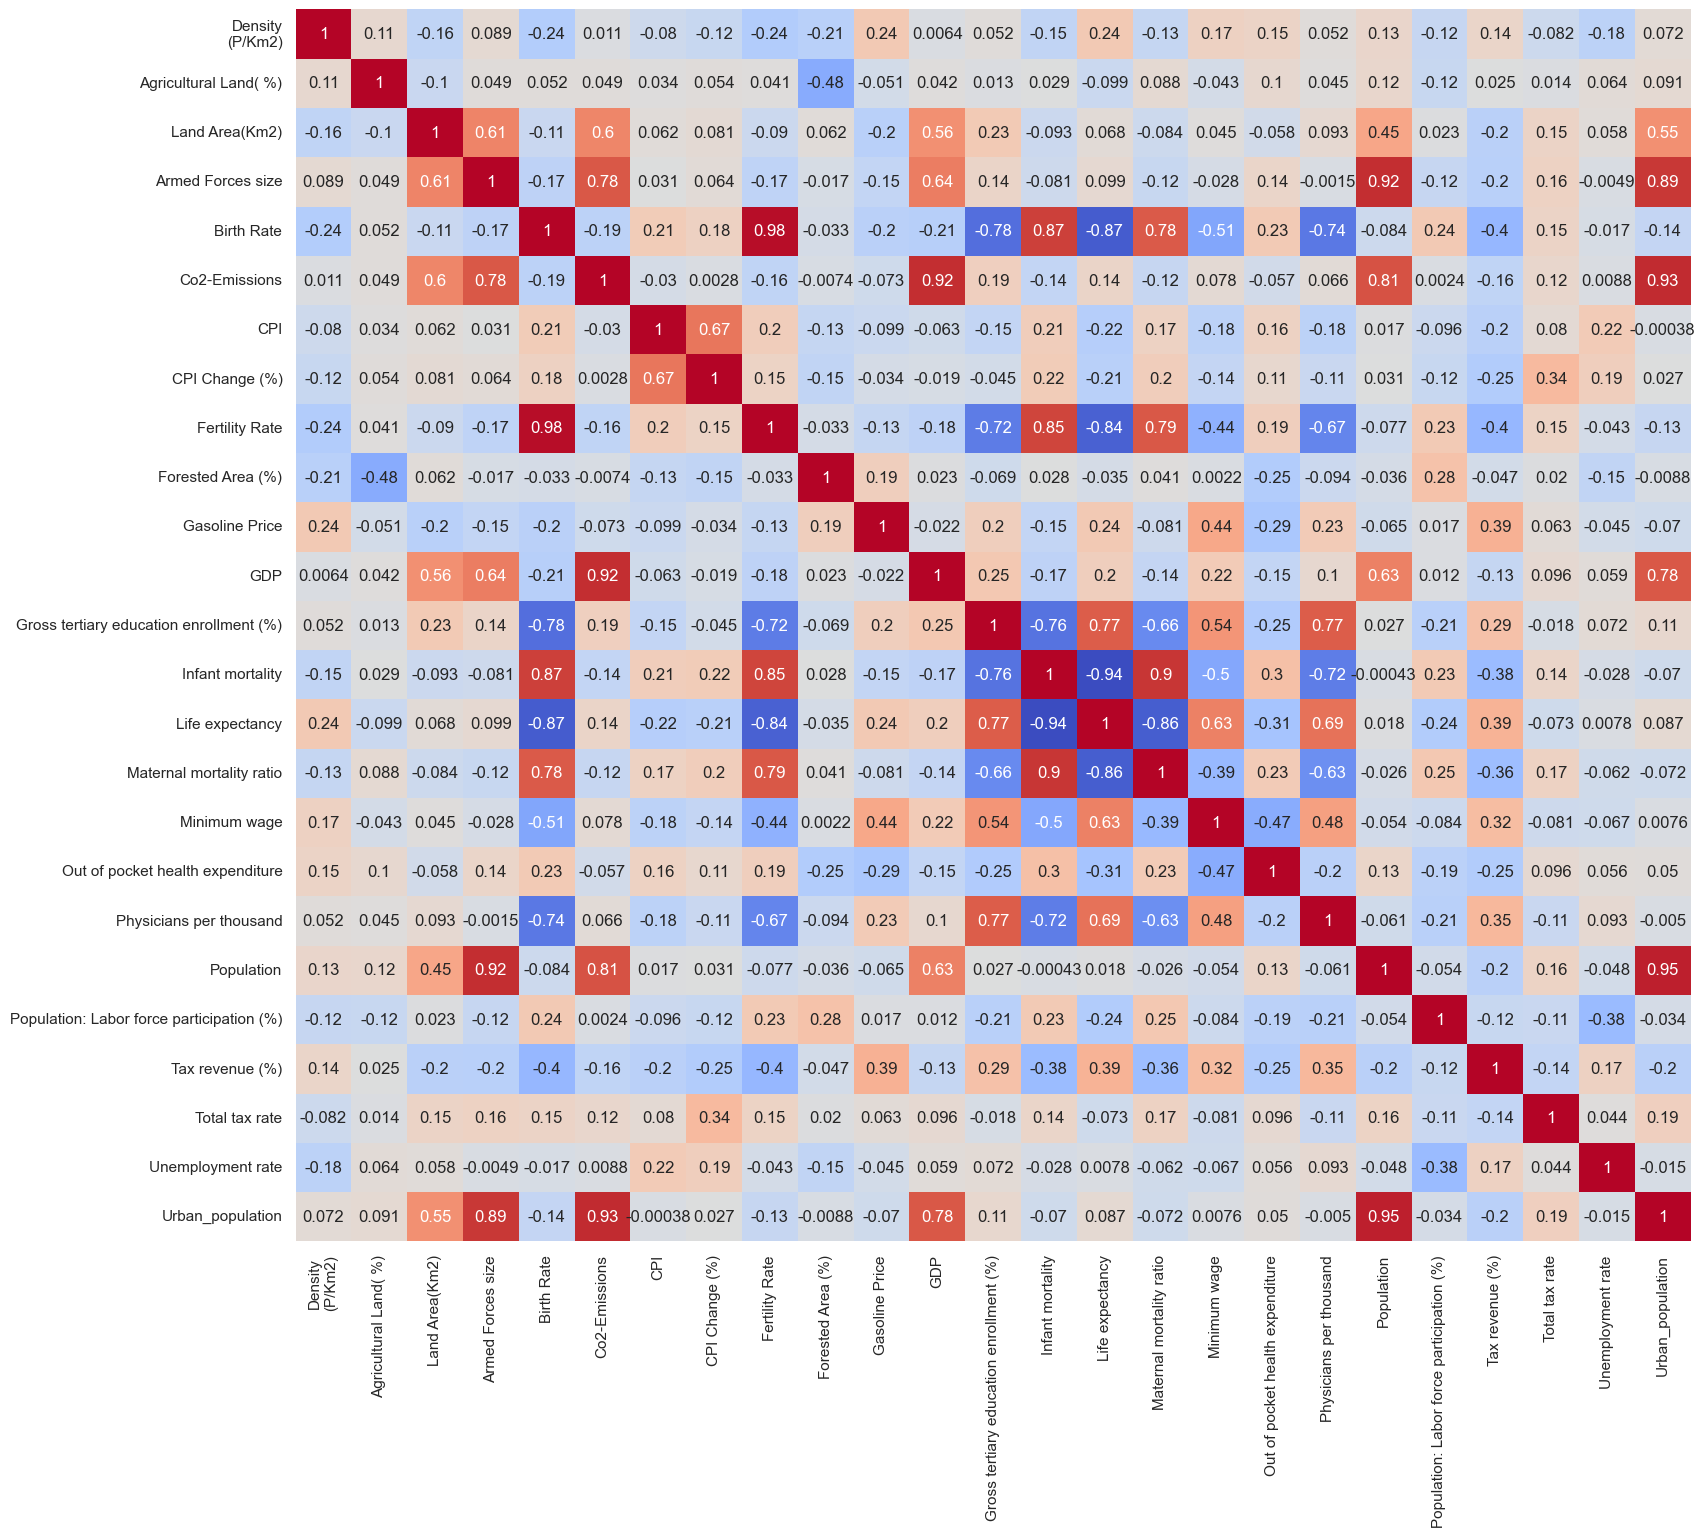

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a linear correlation matrix to understand relationships between numerical features
correlation_matrix = df.corr(numeric_only=True)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(18,16))
sns.heatmap(correlation_matrix, cbar=False, cmap='coolwarm', annot=True)
plt.show()


In [78]:
# Looking for missing values
# Looking for missing values
for col in df.columns:
    print('{} - missing Values: {}'.format(col, df[col].isnull().sum()))


Density
(P/Km2) - missing Values: 0
Agricultural Land( %) - missing Values: 0
Land Area(Km2) - missing Values: 0
Armed Forces size - missing Values: 0
Birth Rate - missing Values: 0
Co2-Emissions - missing Values: 0
CPI - missing Values: 0
CPI Change (%) - missing Values: 0
Fertility Rate - missing Values: 0
Forested Area (%) - missing Values: 0
Gasoline Price - missing Values: 0
GDP - missing Values: 0
Gross tertiary education enrollment (%) - missing Values: 0
Infant mortality - missing Values: 0
Life expectancy - missing Values: 0
Maternal mortality ratio - missing Values: 0
Minimum wage - missing Values: 0
Out of pocket health expenditure - missing Values: 0
Physicians per thousand - missing Values: 0
Population - missing Values: 0
Population: Labor force participation (%) - missing Values: 0
Tax revenue (%) - missing Values: 0
Total tax rate - missing Values: 0
Unemployment rate - missing Values: 0
Urban_population - missing Values: 0


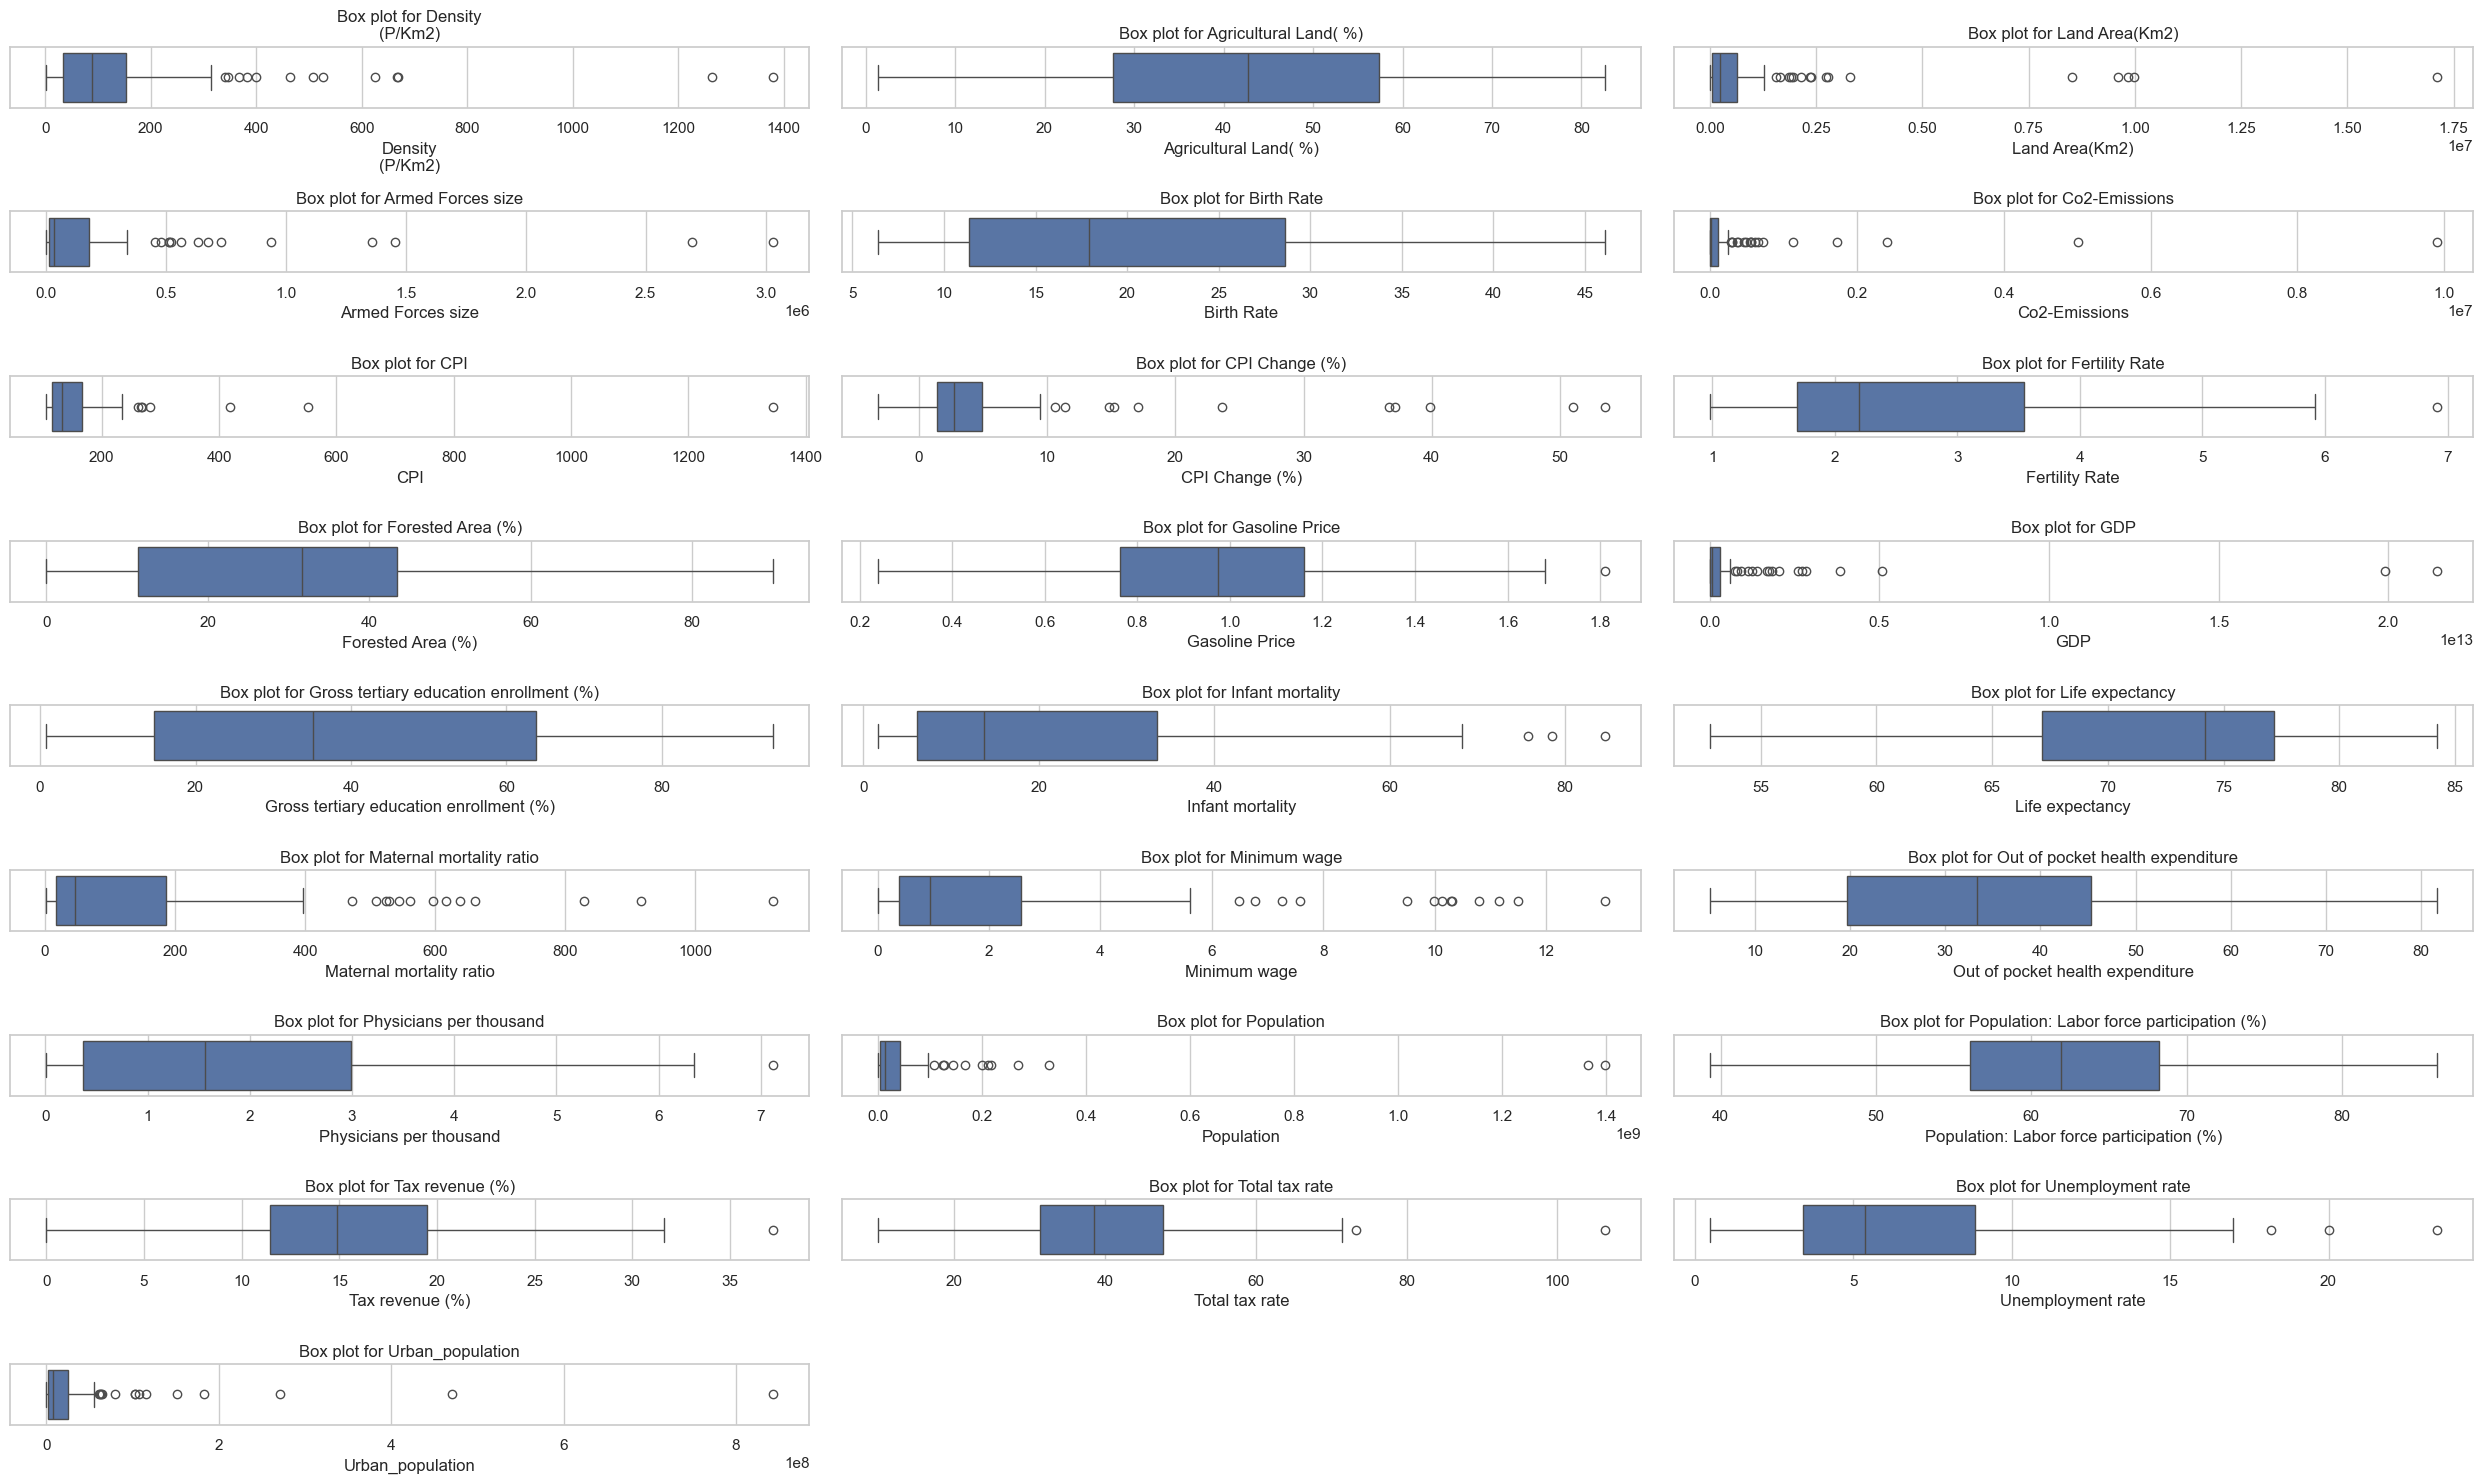

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is a statistical data visualization library

# Assuming df is your dataset
# You may need to install seaborn if you haven't already: pip install seaborn

# Set the style for the plots (optional but makes the plots look nicer)
sns.set(style="whitegrid")

# Get the number of features in your dataset
num_features = len(df.columns)

# Set the size of the plot based on the number of features
plt.figure(figsize=(25, 15))

# Iterate through each feature and create a box plot
for i, column in enumerate(df.columns):
    plt.subplot((num_features // 3) + 1, 3, i + 1)  # Create subplots in a 3-column layout
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [80]:
df.columns

Index(['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI',
       'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross tertiary education enrollment (%)',
       'Infant mortality', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population'],
      dtype='object')

In [81]:
import pandas as pd
import numpy as np

# Assuming df is your dataset
# Replace this with your actual dataset

# Calculate the lower and upper bounds for outliers using IQR method
def calculate_outlier_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Calculate the percentage of outliers for each feature
def calculate_outlier_percentage(df):
    outlier_percentages = {}
    for column in df.columns:
        lower_bound, upper_bound = calculate_outlier_bounds(df[column])
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        percentage_outliers = (len(outliers) / len(df)) * 100
        outlier_percentages[column] = percentage_outliers
    return outlier_percentages

# Print the percentage of outliers for each feature
outlier_percentages = calculate_outlier_percentage(df)
for column, percentage in outlier_percentages.items():
    print(f'{column}: {percentage:.2f}% outliers')


Density
(P/Km2): 11.02% outliers
Agricultural Land( %): 0.00% outliers
Land Area(Km2): 13.56% outliers
Armed Forces size: 11.86% outliers
Birth Rate: 0.00% outliers
Co2-Emissions: 15.25% outliers
CPI: 5.93% outliers
CPI Change (%): 9.32% outliers
Fertility Rate: 0.85% outliers
Forested Area (%): 0.00% outliers
Gasoline Price: 0.85% outliers
GDP: 14.41% outliers
Gross tertiary education enrollment (%): 0.00% outliers
Infant mortality: 2.54% outliers
Life expectancy: 0.00% outliers
Maternal mortality ratio: 11.02% outliers
Minimum wage: 11.02% outliers
Out of pocket health expenditure: 0.00% outliers
Physicians per thousand: 0.85% outliers
Population: 10.17% outliers
Population: Labor force participation (%): 0.00% outliers
Tax revenue (%): 0.85% outliers
Total tax rate: 1.69% outliers
Unemployment rate: 2.54% outliers
Urban_population: 11.86% outliers


In [82]:
# Looking for outliers
def outlier_visualizer(col, vert=True, grid=True):
    df[col].plot(kind='box', vert=vert)
    plt.title('{} - Boxplot'.format(col))
    plt.ylabel('Values')
    plt.grid(grid)
    plt.show()
    
def outlier_finder(col):
    # sourcery skip: merge-duplicate-blocks, remove-redundant-if
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    left_lim = q1 - iqr*1.5
    right_lim = q3 + iqr*1.5
    outliers = {'Country':[], col:[]}

    for i,c in enumerate(df[col]):
        if c < left_lim:
            outliers['Country'].append(df[col].index[i])
            outliers[col].append(c)
        elif c > right_lim:
            outliers['Country'].append(df[col].index[i])
            outliers[col].append(c)
        
    outliers_df = pd.DataFrame(outliers)
    outliers_df.set_index('Country', inplace=True)
    
    print('{} - % of outliers: {}%'.format(col, round(outliers_df.shape[0]/df.shape[0]*100,2)))
    return outliers_df

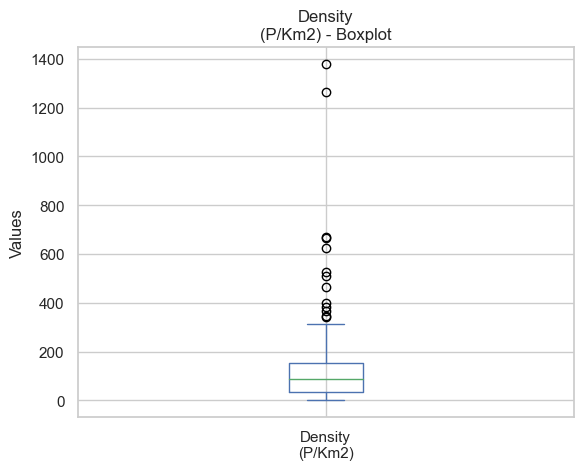

In [83]:
outlier_visualizer('Density\n(P/Km2)')


In [84]:
outlier_finder('Density\n(P/Km2)')

Density
(P/Km2) - % of outliers: 11.02%


Density\n(P/Km2)
Country                      
Bangladesh             1265.0
Barbados                668.0
Belgium                 383.0
India                   464.0
Israel                  400.0
Japan                   347.0
Lebanon                 667.0
Malta                  1380.0
Mauritius               626.0
Netherlands             508.0
Philippines             368.0
South Korea             527.0
Sri Lanka               341.0

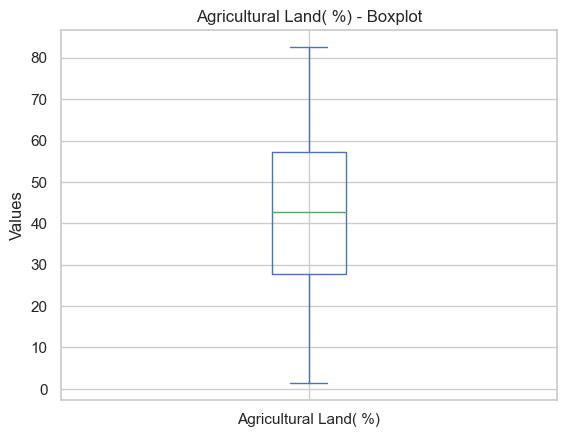

In [85]:
import matplotlib.pyplot as plt

# Your plot-generating code here
outlier_visualizer('Agricultural Land( %)')
# Add the following line at the end to display the plot
plt.show()


In [86]:
outlier_finder('Agricultural Land( %)')

Agricultural Land( %) - % of outliers: 0.0%


Empty DataFrame
Columns: [Agricultural Land( %)]
Index: []

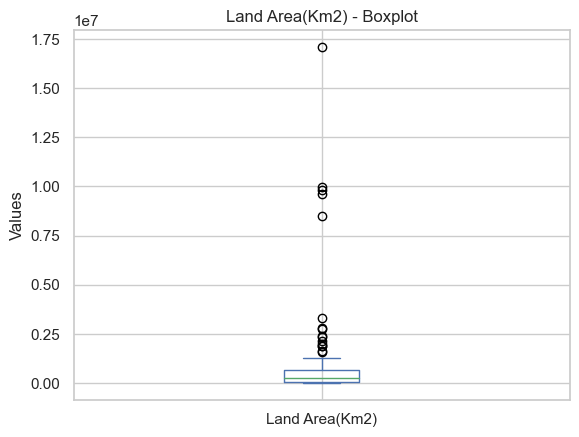

In [87]:
outlier_visualizer('Land Area(Km2)')


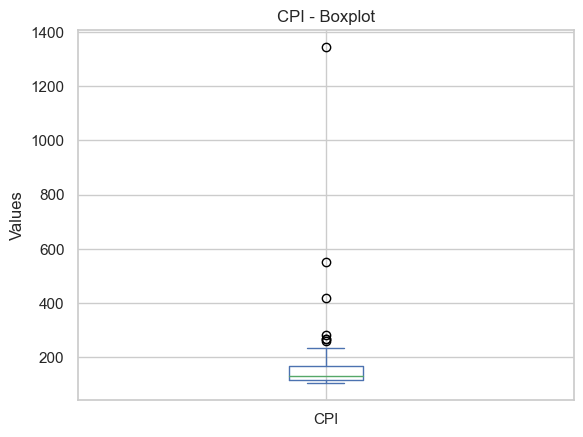

In [88]:
outlier_visualizer('CPI')

In [89]:
outlier_finder('GDP')

GDP - % of outliers: 14.41%


GDP
Country                     
Brazil          1.839758e+12
Canada          1.736426e+12
China           1.991000e+13
France          2.715518e+12
Germany         3.845630e+12
India           2.611000e+12
Indonesia       1.119191e+12
Japan           5.081770e+12
Mexico          1.258287e+12
Netherlands     9.090704e+11
Russia          1.699877e+12
Saudi Arabia    7.929668e+11
South Korea     2.029000e+12
Spain           1.394116e+12
Turkey          7.544117e+11
United Kingdom  2.827113e+12
United States   2.142770e+13

In [90]:
df.describe(include='all')


Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count        118.000000             118.000000    1.180000e+02   
mean         149.940678              42.029661    9.211379e+05   
std          208.835612              20.485919    2.320574e+06   
min            2.000000               1.400000    3.160000e+02   
25%           34.500000              27.700000    5.873600e+04   
50%           88.000000              42.750000    2.375955e+05   
75%          152.750000              57.325000    6.501228e+05   
max         1380.000000              82.600000    1.709824e+07   

       Armed Forces size  Birth Rate  Co2-Emissions          CPI  \
count       1.180000e+02  118.000000   1.180000e+02   118.000000   
mean        1.873220e+05   20.407203   2.595605e+05   161.087797   
std         4.286970e+05   10.025211   1.049664e+06   124.759114   
min         1.000000e+03    6.400000   2.970000e+02   105.480000   
25%         1.025000e+04   11.350000   5.845000e+03   115.987500   
50%         3.300000e+04   17.905000   2.168100e+04   132.955000   
75%         1.795000e+05   28.625000   1.158312e+05   166.935000   
max         3.031000e+06   46.080000   9.893038e+06  1344.190000   

       CPI Change (%)  Fertility Rate  Forested Area (%)  ...  \
count      118.000000      118.000000         118.000000  ...   
mean         5.135593        2.694831          30.359322  ...   
std          9.084273        1.305424          21.191460  ...   
min         -3.200000        0.980000           0.000000  ...   
25%          1.400000        1.690000          11.325000  ...   
50%          2.700000        2.200000          31.700000  ...   
75%          4.875000        3.547500          43.475000  ...   
max         53.500000        6.910000          90.000000  ...   

       Maternal mortality ratio  Minimum wage  \
count                118.000000    118.000000   
mean                 150.949153      2.182373   
std                  214.784362      2.956178   
min                    2.000000      0.010000   
25%                   16.250000      0.390000   
50%                   45.500000      0.950000   
75%                  185.750000      2.567500   
max                 1120.000000     13.050000   

       Out of pocket health expenditure  Physicians per thousand  \
count                        118.000000               118.000000   
mean                          34.490678                 1.826271   
std                           18.490658                 1.554242   
min                            5.300000                 0.010000   
25%                           19.650000                 0.372500   
50%                           33.400000                 1.565000   
75%                           45.350000                 2.987500   
max                           81.600000                 7.120000   

         Population  Population: Labor force participation (%)  \
count  1.180000e+02                                 118.000000   
mean   5.822575e+07                                  62.055085   
std    1.832020e+08                                   9.819174   
min    2.870250e+05                                  39.300000   
25%    4.865094e+06                                  56.050000   
50%    1.404876e+07                                  61.900000   
75%    4.299310e+07                                  68.225000   
max    1.397715e+09                                  86.100000   

       Tax revenue (%)  Total tax rate  Unemployment rate  Urban_population  
count       118.000000      118.000000         118.000000      1.180000e+02  
mean         15.566102       40.345763           6.566864      3.254803e+07  
std           6.448086       14.263046           4.457270      9.411728e+07  
min           0.000000        9.900000           0.470000      8.943100e+04  
25%          11.425000       31.425000           3.405000      2.546214e+06  
50%          14.900000       38.500000           5.375000      7.818710e+06  
75%          19.5

In [91]:
# let's check variable skewness
df.skew()

Density\n(P/Km2)                             3.575628
Agricultural Land( %)                        0.016044
Land Area(Km2)                               4.711968
Armed Forces size                            4.751126
Birth Rate                                   0.638814
Co2-Emissions                                7.621745
CPI                                          7.762394
CPI Change (%)                               3.723153
Fertility Rate                               1.040298
Forested Area (%)                            0.407443
Gasoline Price                               0.046102
GDP                                          6.748778
Gross tertiary education enrollment (%)      0.315780
Infant mortality                             1.217546
Life expectancy                             -0.687592
Maternal mortality ratio                     2.077352
Minimum wage                                 2.070882
Out of pocket health expenditure             0.586632
Physicians per thousand     

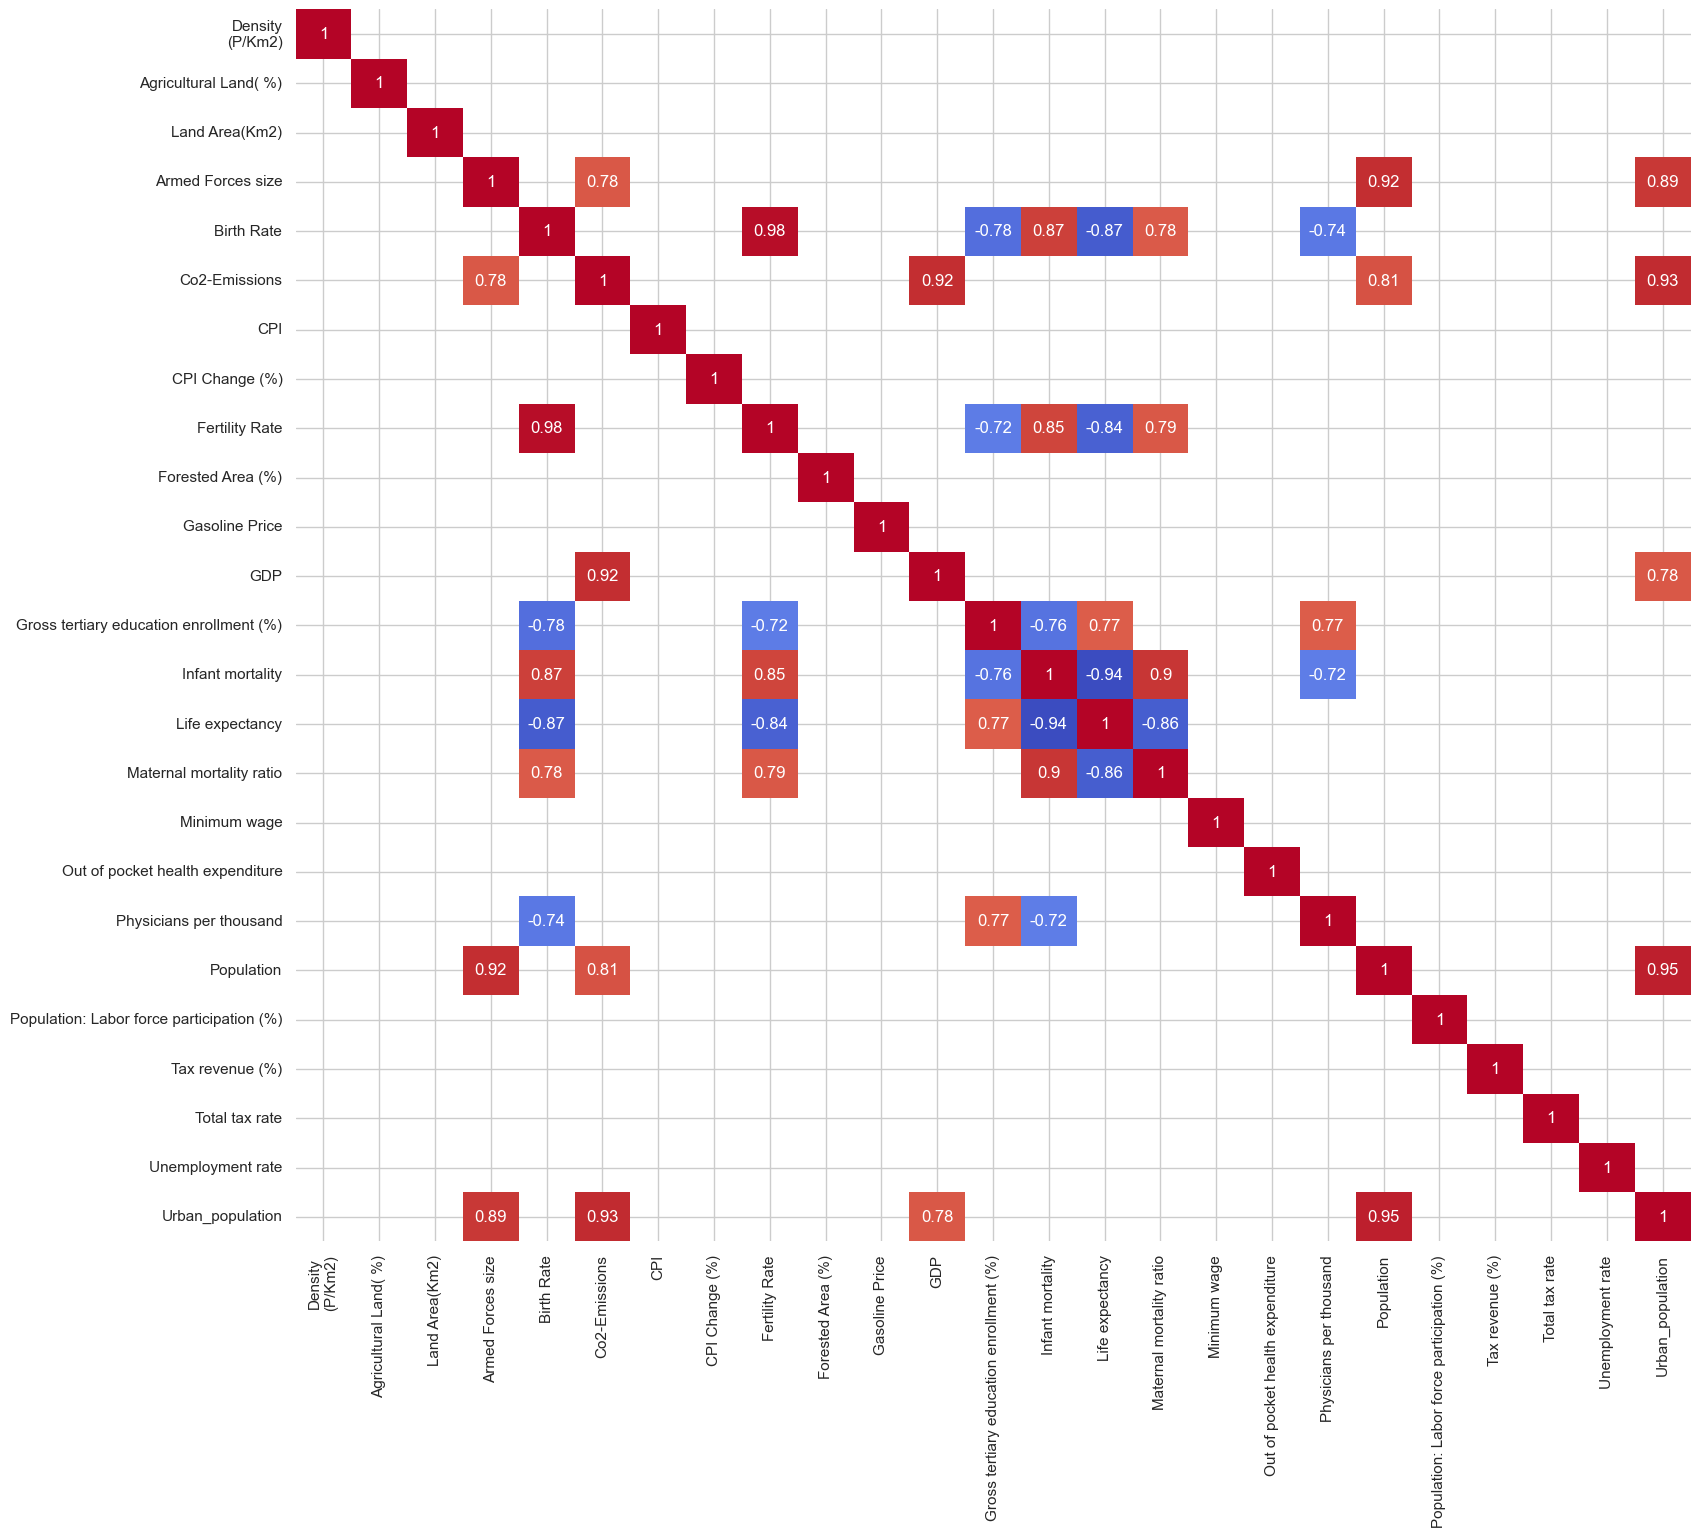

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Filter the correlation matrix to keep only values greater than 0.7 (or -0.7)
high_correlation = np.abs(correlation_matrix) > 0.7

# Replace values below the threshold with NaN
correlation_matrix[~high_correlation] = np.nan

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cbar=False, cmap='coolwarm', annot=True)
plt.show()


In [92]:
def norm_check(data):
    for var in range(len(data.skew())):
        if abs(data.skew()[var]) > 0.75:
            print('"{}" skew: {}. The variable is NOT normally distributed.'.format(data.skew().index[var],
                                                                                    round(data.skew()[var],2)))
        else:
            print('"{}" skew: {}. The Variable is normally distributed'.format(data.skew().index[var],
                                                                                round(data.skew()[var],2)))
            
norm_check(df)

"Density
(P/Km2)" skew: 3.58. The variable is NOT normally distributed.
"Agricultural Land( %)" skew: 0.02. The Variable is normally distributed
"Land Area(Km2)" skew: 4.71. The variable is NOT normally distributed.
"Armed Forces size" skew: 4.75. The variable is NOT normally distributed.
"Birth Rate" skew: 0.64. The Variable is normally distributed
"Co2-Emissions" skew: 7.62. The variable is NOT normally distributed.
"CPI" skew: 7.76. The variable is NOT normally distributed.
"CPI Change (%)" skew: 3.72. The variable is NOT normally distributed.
"Fertility Rate" skew: 1.04. The variable is NOT normally distributed.
"Forested Area (%)" skew: 0.41. The Variable is normally distributed
"Gasoline Price" skew: 0.05. The Variable is normally distributed
"GDP" skew: 6.75. The variable is NOT normally distributed.
"Gross tertiary education enrollment (%)" skew: 0.32. The Variable is normally distributed
"Infant mortality" skew: 1.22. The variable is NOT normally distributed.
"Life expectancy"

In [219]:
# I'll create a function to check which feature are linearly correlated and what is the correlation coefficient
def corr_matrix(data):
    corr_matrix = data.corr()
    
    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.70 and abs(x) < 1 else '')
    
    return corr_matrix

In [220]:
corr_matrix(df)

Density\n(P/Km2)  \
Density\n(P/Km2)                                             
Agricultural Land( %)                                        
Land Area(Km2)                                               
Armed Forces size                                            
Birth Rate                                                   
Co2-Emissions                                                
CPI                                                          
CPI Change (%)                                               
Fertility Rate                                               
Forested Area (%)                                            
Gasoline Price                                               
GDP                                                          
Gross tertiary education enrollment (%)                      
Infant mortality                                             
Life expectancy                                              
Maternal mortality ratio                                     
Minimum wage                                                 
Out of pocket health expenditure                             
Physicians per thousand                                      
Population                                                   
Population: Labor force participation (%)                    
Tax revenue (%)                                              
Total tax rate                                               
Unemployment rate                                            
Urban_population                                             

                                          Agricultural Land( %)  \
Density\n(P/Km2)                                                  
Agricultural Land( %)                                             
Land Area(Km2)                                                    
Armed Forces size                                                 
Birth Rate                                                        
Co2-Emissions                                                     
CPI                                                               
CPI Change (%)                                                    
Fertility Rate                                                    
Forested Area (%)                                                 
Gasoline Price                                                    
GDP                                                               
Gross tertiary education enrollment (%)                           
Infant mortality                                                  
Life expectancy                                                   
Maternal mortality ratio                                          
Minimum wage                                                      
Out of pocket health expenditure                                  
Physicians per thousand                                           
Population                                                        
Population: Labor force participation (%)                         
Tax revenue (%)                                                   
Total tax rate                                                    
Unemployment rate                                                 
Urban_population                                                  

                                          Land Area(Km2) Armed Forces size  \
Density\n(P/Km2)                                                             
Agricultural Land( %)                                                        
Land Area(Km2)                                                               
Armed Forces size                                                            
Birth Rate                                                                   
Co2-Emissions                                                     0.781271   
CPI                                                                          
CPI Change (%)                                                

### Feature Engineer and Transformation 

#### Logarithm Transformation

In [95]:
# Create a function to apply several transformations
def transformer(data,function):  # sourcery skip: assign-if-exp
    lam = []
    for col in data.columns:
        if abs(data[col].skew()) > 0.75:
            if function == boxcox:
                data[col], lam_val = function(data[col] + abs(df.min().min())+0.001)
                lam.append(lam_val)
            else:
                data[col] = function(data[col] + abs(df.min().min())+0.001)
                # inflation is the only feature with negative values; to make the log transform possible,
                ## I added the lowest value of inflation +0.001 to make all values positive
    if function == boxcox:
        return data, lam
    else:
        return data

In [96]:
log_data = df.copy(deep=True) 
log_data = transformer(log_data, np.log)
log_data.skew()

Density\n(P/Km2)                            -0.027551
Agricultural Land( %)                        0.016044
Land Area(Km2)                              -0.446903
Armed Forces size                            0.035547
Birth Rate                                   0.638814
Co2-Emissions                                0.311392
CPI                                          3.064998
CPI Change (%)                              -4.839815
Fertility Rate                               0.757662
Forested Area (%)                            0.407443
Gasoline Price                               0.046102
GDP                                          0.412386
Gross tertiary education enrollment (%)      0.315780
Infant mortality                             0.171412
Life expectancy                             -0.687592
Maternal mortality ratio                     0.223275
Minimum wage                                 1.413908
Out of pocket health expenditure             0.586632
Physicians per thousand     

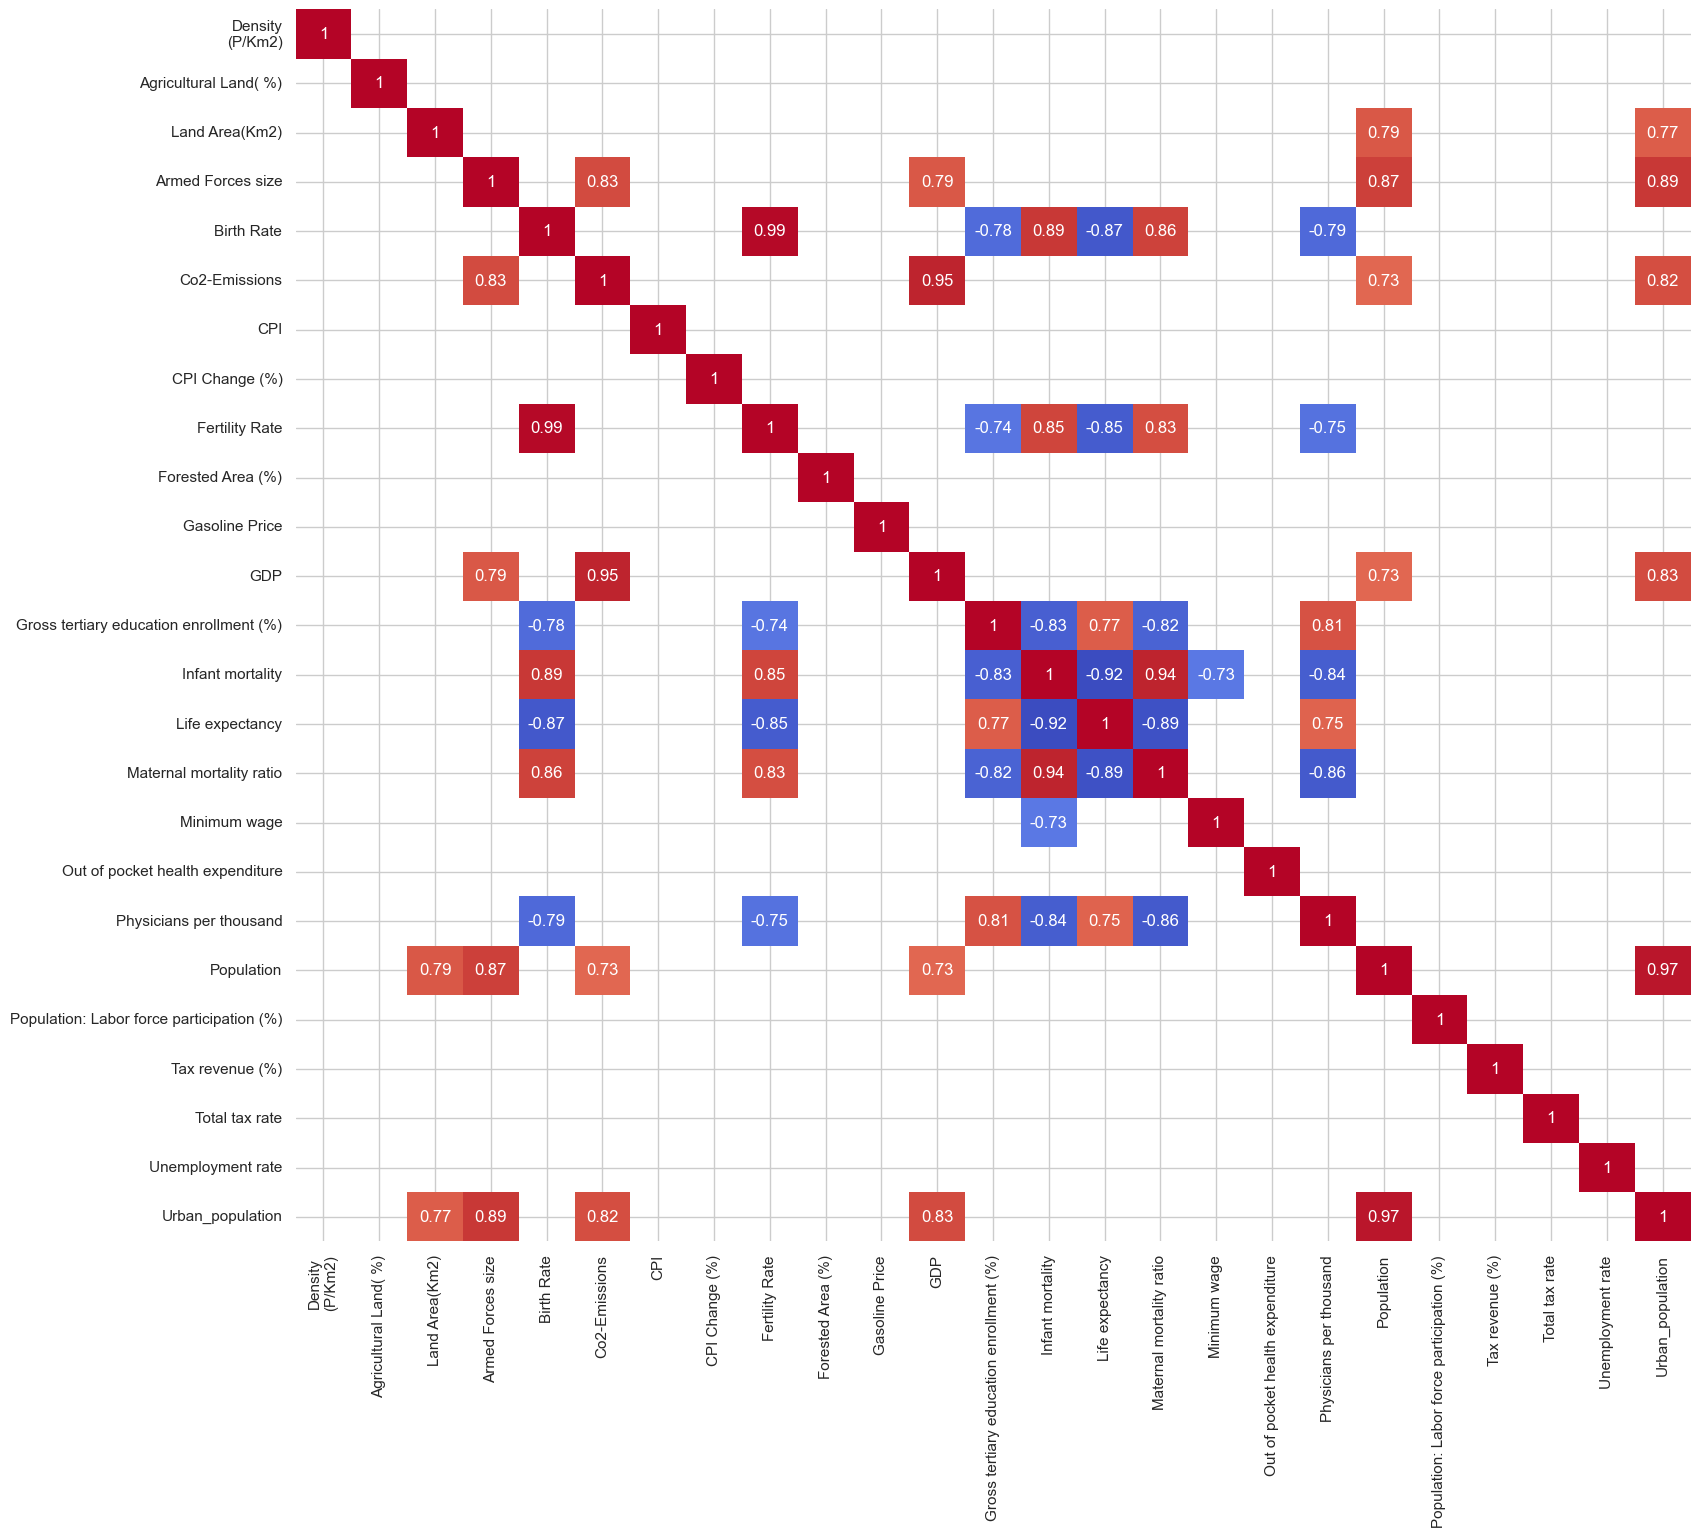

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
df = log_data
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Filter the correlation matrix to keep only values greater than 0.7 (or -0.7)
high_correlation = np.abs(correlation_matrix) > 0.7

# Replace values below the threshold with NaN
correlation_matrix[~high_correlation] = np.nan

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cbar=False, cmap='coolwarm', annot=True)
plt.show()

In [97]:
norm_check(log_data)

"Density
(P/Km2)" skew: -0.03. The Variable is normally distributed
"Agricultural Land( %)" skew: 0.02. The Variable is normally distributed
"Land Area(Km2)" skew: -0.45. The Variable is normally distributed
"Armed Forces size" skew: 0.04. The Variable is normally distributed
"Birth Rate" skew: 0.64. The Variable is normally distributed
"Co2-Emissions" skew: 0.31. The Variable is normally distributed
"CPI" skew: 3.06. The variable is NOT normally distributed.
"CPI Change (%)" skew: -4.84. The variable is NOT normally distributed.
"Fertility Rate" skew: 0.76. The variable is NOT normally distributed.
"Forested Area (%)" skew: 0.41. The Variable is normally distributed
"Gasoline Price" skew: 0.05. The Variable is normally distributed
"GDP" skew: 0.41. The Variable is normally distributed
"Gross tertiary education enrollment (%)" skew: 0.32. The Variable is normally distributed
"Infant mortality" skew: 0.17. The Variable is normally distributed
"Life expectancy" skew: -0.69. The Variable 

In [98]:
print('Correlation Matrix - Data Log Transformed')
corr_matrix(log_data)

Correlation Matrix - Data Log Transformed


Density\n(P/Km2)  \
Density\n(P/Km2)                                             
Agricultural Land( %)                                        
Land Area(Km2)                                               
Armed Forces size                                            
Birth Rate                                                   
Co2-Emissions                                                
CPI                                                          
CPI Change (%)                                               
Fertility Rate                                               
Forested Area (%)                                            
Gasoline Price                                               
GDP                                                          
Gross tertiary education enrollment (%)                      
Infant mortality                                             
Life expectancy                                              
Maternal mortality ratio                                     
Minimum wage                                                 
Out of pocket health expenditure                             
Physicians per thousand                                      
Population                                                   
Population: Labor force participation (%)                    
Tax revenue (%)                                              
Total tax rate                                               
Unemployment rate                                            
Urban_population                                             

                                          Agricultural Land( %)  \
Density\n(P/Km2)                                                  
Agricultural Land( %)                                             
Land Area(Km2)                                                    
Armed Forces size                                                 
Birth Rate                                                        
Co2-Emissions                                                     
CPI                                                               
CPI Change (%)                                                    
Fertility Rate                                                    
Forested Area (%)                                                 
Gasoline Price                                                    
GDP                                                               
Gross tertiary education enrollment (%)                           
Infant mortality                                                  
Life expectancy                                                   
Maternal mortality ratio                                          
Minimum wage                                                      
Out of pocket health expenditure                                  
Physicians per thousand                                           
Population                                                        
Population: Labor force participation (%)                         
Tax revenue (%)                                                   
Total tax rate                                                    
Unemployment rate                                                 
Urban_population                                                  

                                          Land Area(Km2) Armed Forces size  \
Density\n(P/Km2)                                                             
Agricultural Land( %)                                                        
Land Area(Km2)                                                               
Armed Forces size                                                            
Birth Rate                                                                   
Co2-Emissions                                                     0.828401   
CPI                                                                          
CPI Change (%)                                                

In [99]:
sqrt_data = df.copy() 
sqrt_data = transformer(sqrt_data, np.sqrt)
sqrt_data.skew()

Density\n(P/Km2)                             1.629248
Agricultural Land( %)                        0.016044
Land Area(Km2)                               2.595967
Armed Forces size                            2.235374
Birth Rate                                   0.638814
Co2-Emissions                                4.051712
CPI                                          5.289561
CPI Change (%)                               2.340661
Fertility Rate                               0.894596
Forested Area (%)                            0.407443
Gasoline Price                               0.046102
GDP                                          3.957786
Gross tertiary education enrollment (%)      0.315780
Infant mortality                             0.684616
Life expectancy                             -0.687592
Maternal mortality ratio                     1.114971
Minimum wage                                 1.741105
Out of pocket health expenditure             0.586632
Physicians per thousand     

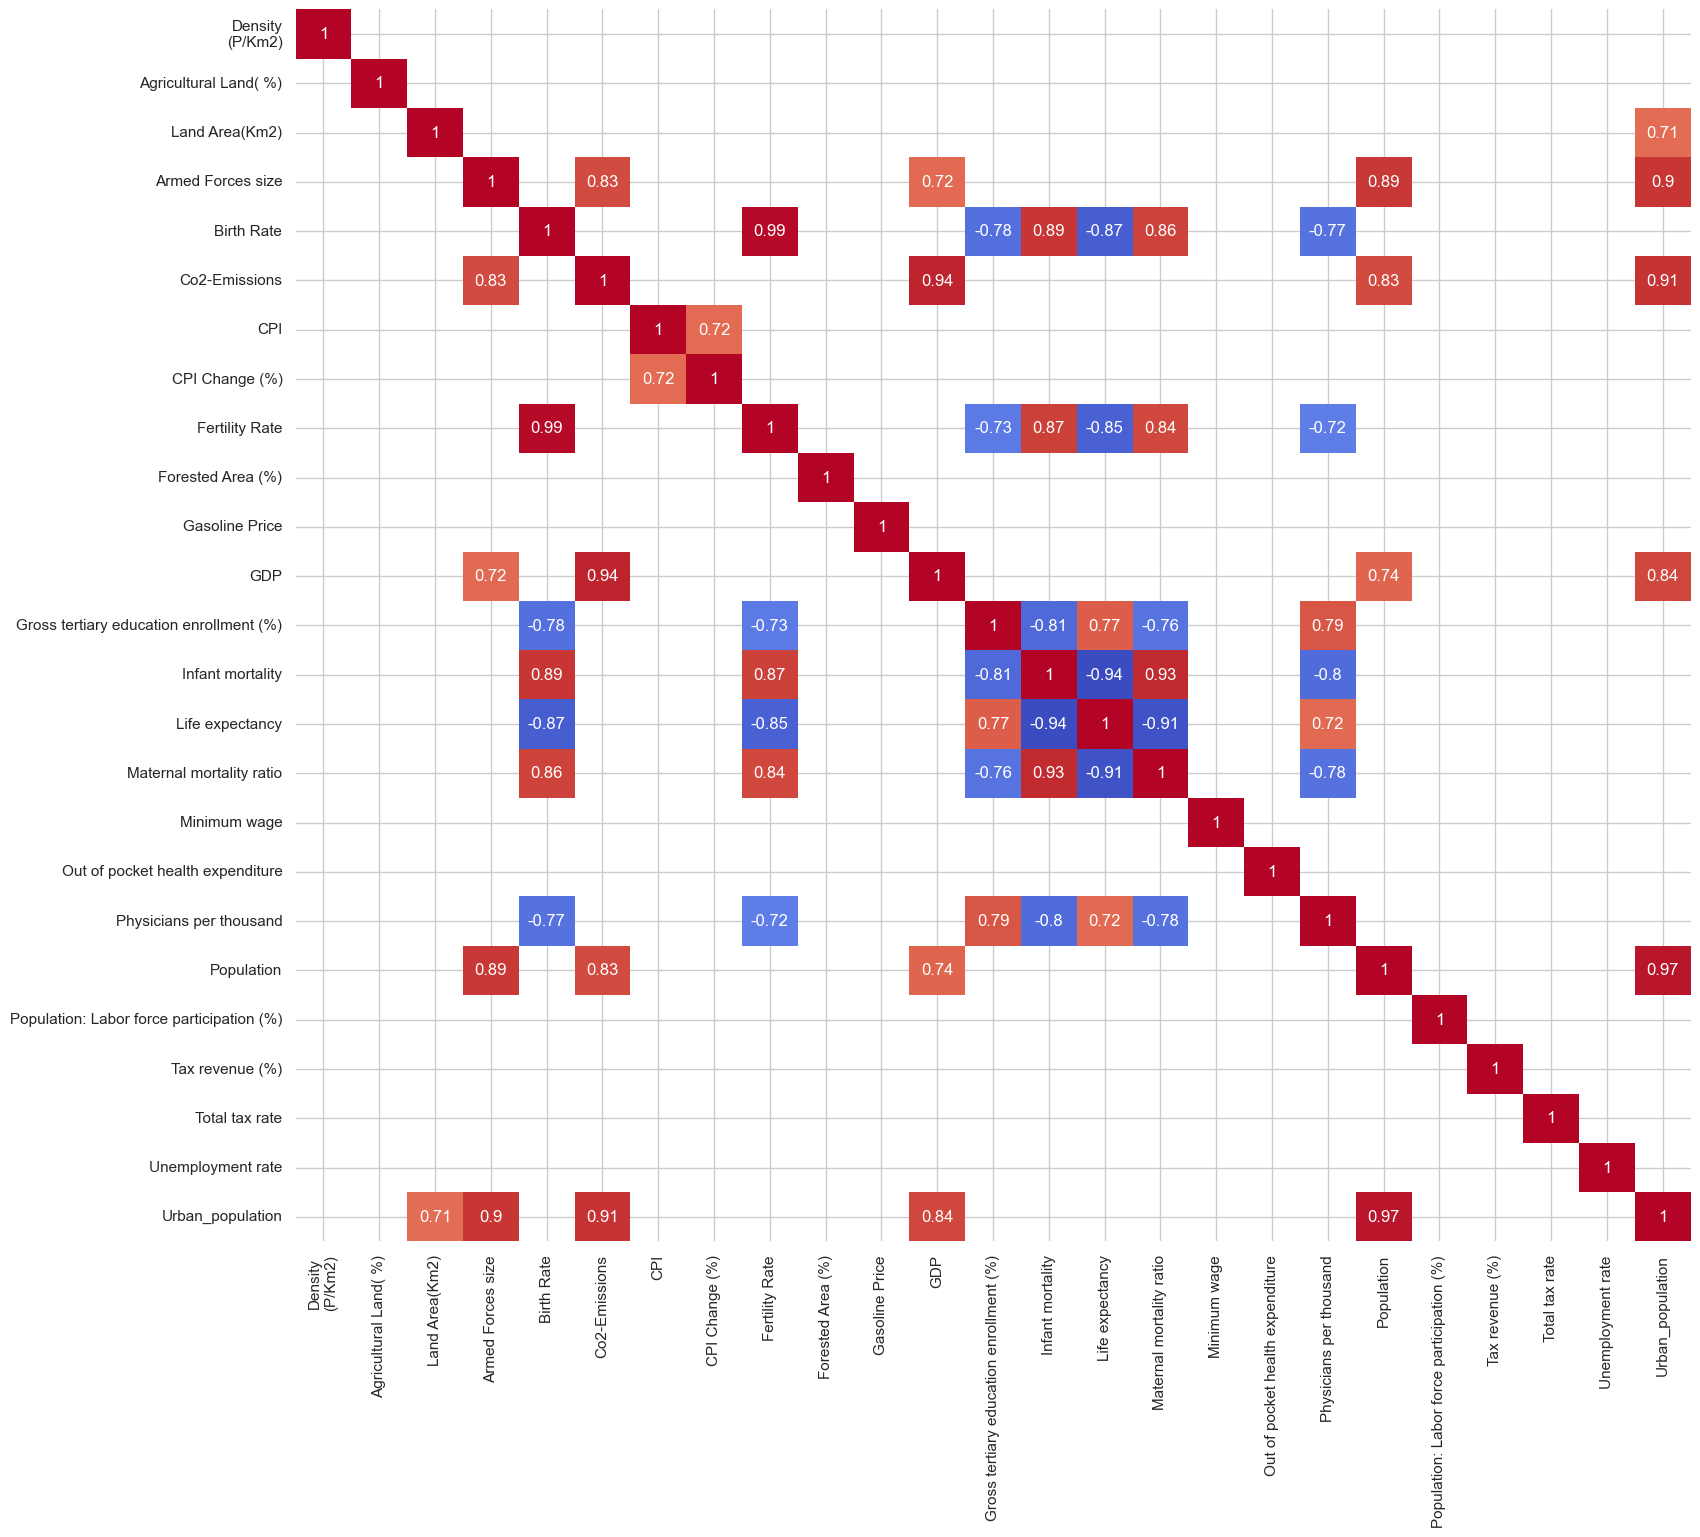

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sqrt_data
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Filter the correlation matrix to keep only values greater than 0.7 (or -0.7)
high_correlation = np.abs(correlation_matrix) > 0.7

# Replace values below the threshold with NaN
correlation_matrix[~high_correlation] = np.nan

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cbar=False, cmap='coolwarm', annot=True)
plt.show()

In [100]:
bc_data = df.copy() 
bc_data, lambda_list = transformer(bc_data, boxcox) #storing the lambda values of boxcox transform in a separate list
bc_data.skew()

Density\n(P/Km2)                            -0.000673
Agricultural Land( %)                        0.016044
Land Area(Km2)                               0.012064
Armed Forces size                            0.003456
Birth Rate                                   0.638814
Co2-Emissions                                0.019699
CPI                                          0.000000
CPI Change (%)                               0.550903
Fertility Rate                               0.194338
Forested Area (%)                            0.407443
Gasoline Price                               0.046102
GDP                                          0.023207
Gross tertiary education enrollment (%)      0.315780
Infant mortality                             0.040871
Life expectancy                             -0.687592
Maternal mortality ratio                     0.055333
Minimum wage                                 0.401853
Out of pocket health expenditure             0.586632
Physicians per thousand     

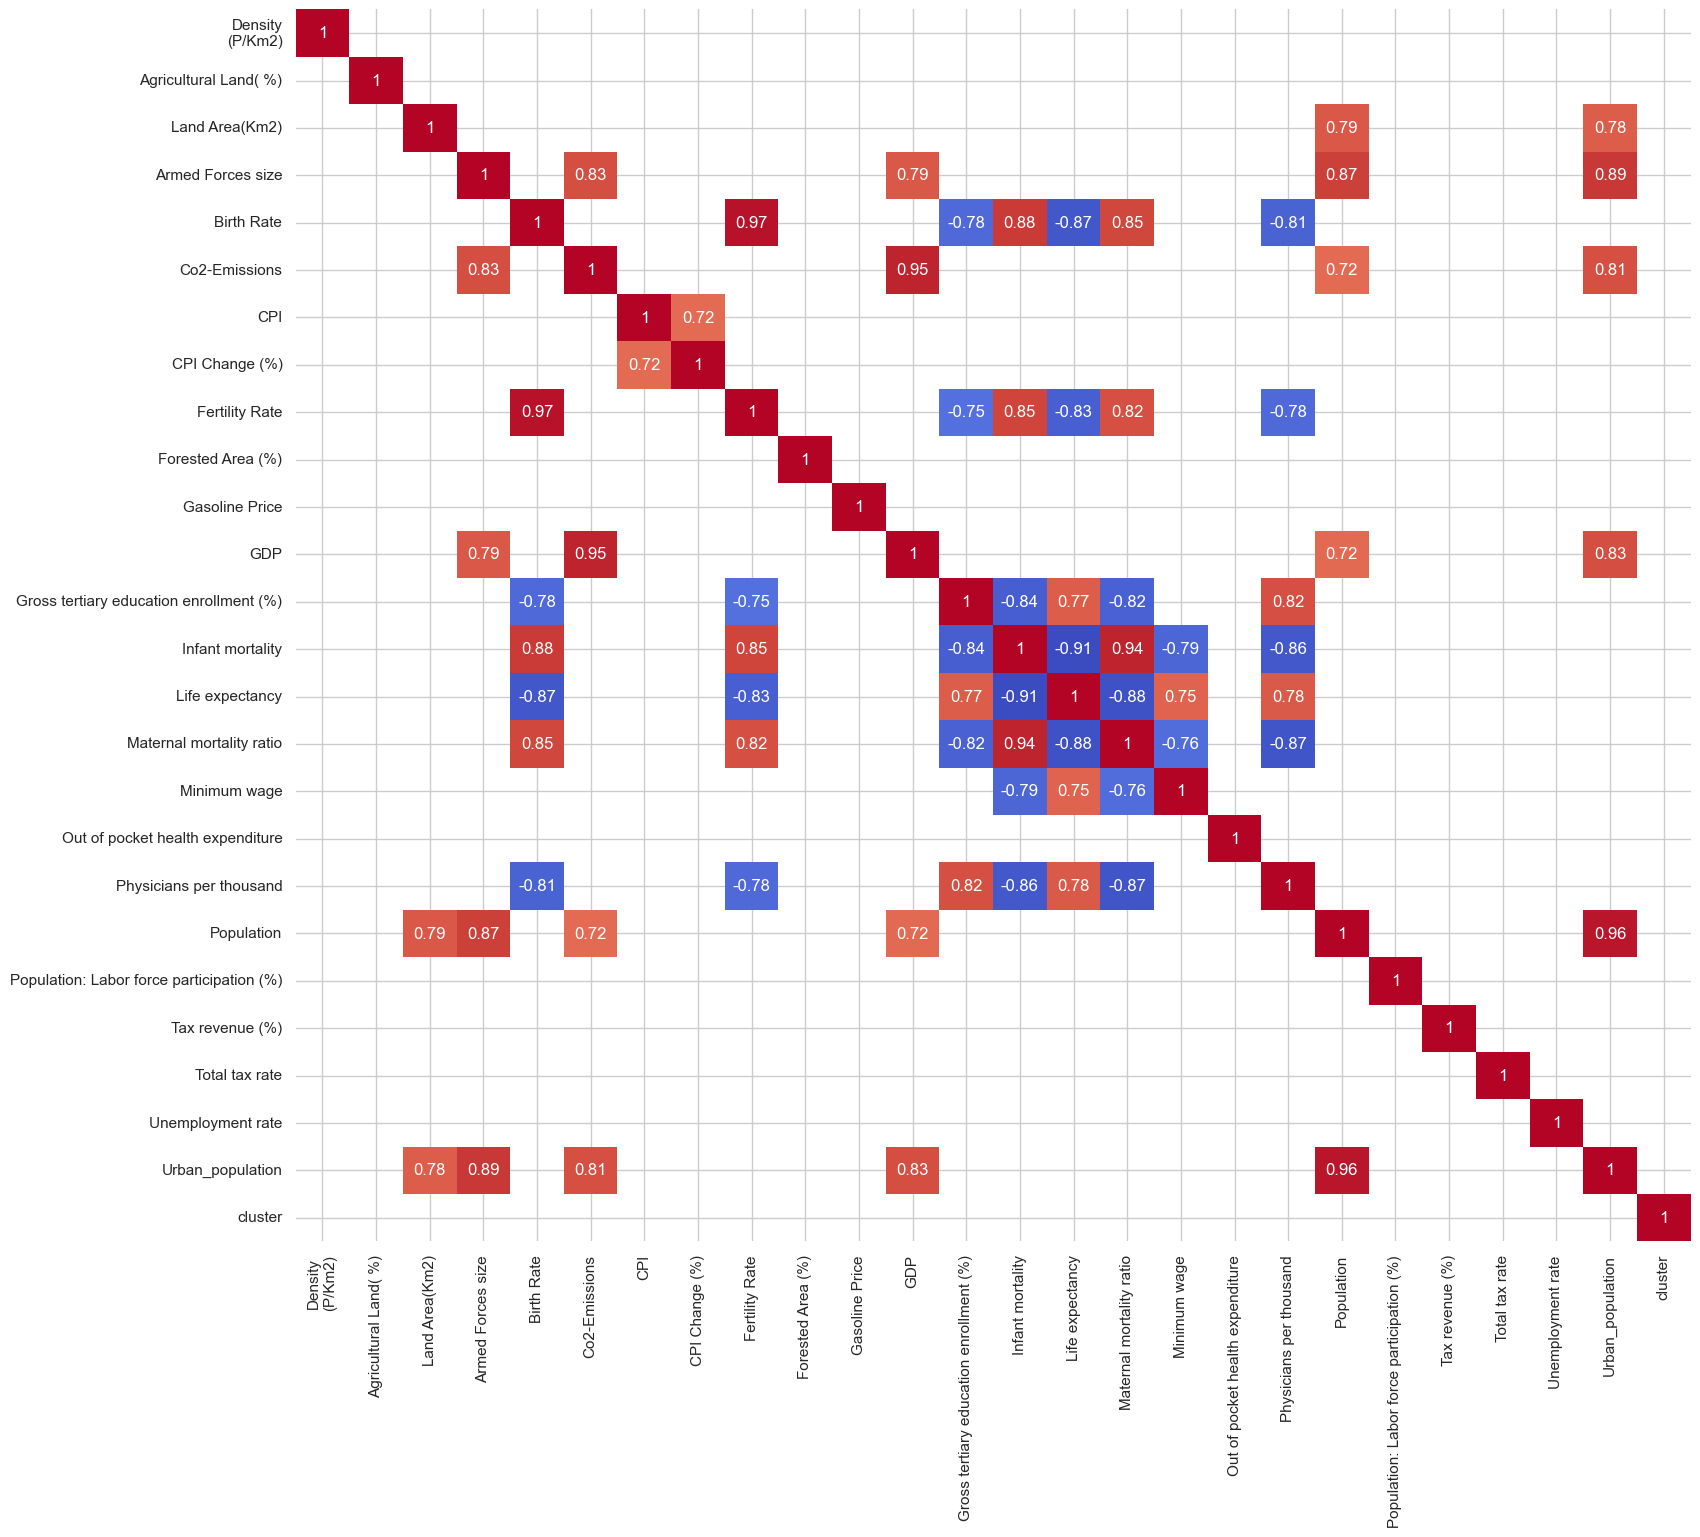

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
df = bc_data
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Filter the correlation matrix to keep only values greater than 0.7 (or -0.7)
high_correlation = np.abs(correlation_matrix) > 0.7

# Replace values below the threshold with NaN
correlation_matrix[~high_correlation] = np.nan

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cbar=False, cmap='coolwarm', annot=True)
plt.show()

In [101]:
norm_check(sqrt_data)

"Density
(P/Km2)" skew: 1.63. The variable is NOT normally distributed.
"Agricultural Land( %)" skew: 0.02. The Variable is normally distributed
"Land Area(Km2)" skew: 2.6. The variable is NOT normally distributed.
"Armed Forces size" skew: 2.24. The variable is NOT normally distributed.
"Birth Rate" skew: 0.64. The Variable is normally distributed
"Co2-Emissions" skew: 4.05. The variable is NOT normally distributed.
"CPI" skew: 5.29. The variable is NOT normally distributed.
"CPI Change (%)" skew: 2.34. The variable is NOT normally distributed.
"Fertility Rate" skew: 0.89. The variable is NOT normally distributed.
"Forested Area (%)" skew: 0.41. The Variable is normally distributed
"Gasoline Price" skew: 0.05. The Variable is normally distributed
"GDP" skew: 3.96. The variable is NOT normally distributed.
"Gross tertiary education enrollment (%)" skew: 0.32. The Variable is normally distributed
"Infant mortality" skew: 0.68. The Variable is normally distributed
"Life expectancy" skew:

In [102]:
print('Correlation Matrix - After Square Root Transformation')
corr_matrix(sqrt_data)

Correlation Matrix - After Square Root Transformation


Density\n(P/Km2)  \
Density\n(P/Km2)                                             
Agricultural Land( %)                                        
Land Area(Km2)                                               
Armed Forces size                                            
Birth Rate                                                   
Co2-Emissions                                                
CPI                                                          
CPI Change (%)                                               
Fertility Rate                                               
Forested Area (%)                                            
Gasoline Price                                               
GDP                                                          
Gross tertiary education enrollment (%)                      
Infant mortality                                             
Life expectancy                                              
Maternal mortality ratio                                     
Minimum wage                                                 
Out of pocket health expenditure                             
Physicians per thousand                                      
Population                                                   
Population: Labor force participation (%)                    
Tax revenue (%)                                              
Total tax rate                                               
Unemployment rate                                            
Urban_population                                             

                                          Agricultural Land( %)  \
Density\n(P/Km2)                                                  
Agricultural Land( %)                                             
Land Area(Km2)                                                    
Armed Forces size                                                 
Birth Rate                                                        
Co2-Emissions                                                     
CPI                                                               
CPI Change (%)                                                    
Fertility Rate                                                    
Forested Area (%)                                                 
Gasoline Price                                                    
GDP                                                               
Gross tertiary education enrollment (%)                           
Infant mortality                                                  
Life expectancy                                                   
Maternal mortality ratio                                          
Minimum wage                                                      
Out of pocket health expenditure                                  
Physicians per thousand                                           
Population                                                        
Population: Labor force participation (%)                         
Tax revenue (%)                                                   
Total tax rate                                                    
Unemployment rate                                                 
Urban_population                                                  

                                          Land Area(Km2) Armed Forces size  \
Density\n(P/Km2)                                                             
Agricultural Land( %)                                                        
Land Area(Km2)                                                               
Armed Forces size                                                            
Birth Rate                                                                   
Co2-Emissions                                                     0.830325   
CPI                                                                          
CPI Change (%)                                                

In [103]:
norm_check(bc_data)


"Density
(P/Km2)" skew: -0.0. The Variable is normally distributed
"Agricultural Land( %)" skew: 0.02. The Variable is normally distributed
"Land Area(Km2)" skew: 0.01. The Variable is normally distributed
"Armed Forces size" skew: 0.0. The Variable is normally distributed
"Birth Rate" skew: 0.64. The Variable is normally distributed
"Co2-Emissions" skew: 0.02. The Variable is normally distributed
"CPI" skew: 0.0. The Variable is normally distributed
"CPI Change (%)" skew: 0.55. The Variable is normally distributed
"Fertility Rate" skew: 0.19. The Variable is normally distributed
"Forested Area (%)" skew: 0.41. The Variable is normally distributed
"Gasoline Price" skew: 0.05. The Variable is normally distributed
"GDP" skew: 0.02. The Variable is normally distributed
"Gross tertiary education enrollment (%)" skew: 0.32. The Variable is normally distributed
"Infant mortality" skew: 0.04. The Variable is normally distributed
"Life expectancy" skew: -0.69. The Variable is normally distribu

In [104]:
print('Correlation Matrix - Data BoxCox Transformed')
corr_matrix(bc_data)

Correlation Matrix - Data BoxCox Transformed


Density\n(P/Km2)  \
Density\n(P/Km2)                                             
Agricultural Land( %)                                        
Land Area(Km2)                                               
Armed Forces size                                            
Birth Rate                                                   
Co2-Emissions                                                
CPI                                                          
CPI Change (%)                                               
Fertility Rate                                               
Forested Area (%)                                            
Gasoline Price                                               
GDP                                                          
Gross tertiary education enrollment (%)                      
Infant mortality                                             
Life expectancy                                              
Maternal mortality ratio                                     
Minimum wage                                                 
Out of pocket health expenditure                             
Physicians per thousand                                      
Population                                                   
Population: Labor force participation (%)                    
Tax revenue (%)                                              
Total tax rate                                               
Unemployment rate                                            
Urban_population                                             

                                          Agricultural Land( %)  \
Density\n(P/Km2)                                                  
Agricultural Land( %)                                             
Land Area(Km2)                                                    
Armed Forces size                                                 
Birth Rate                                                        
Co2-Emissions                                                     
CPI                                                               
CPI Change (%)                                                    
Fertility Rate                                                    
Forested Area (%)                                                 
Gasoline Price                                                    
GDP                                                               
Gross tertiary education enrollment (%)                           
Infant mortality                                                  
Life expectancy                                                   
Maternal mortality ratio                                          
Minimum wage                                                      
Out of pocket health expenditure                                  
Physicians per thousand                                           
Population                                                        
Population: Labor force participation (%)                         
Tax revenue (%)                                                   
Total tax rate                                                    
Unemployment rate                                                 
Urban_population                                                  

                                          Land Area(Km2) Armed Forces size  \
Density\n(P/Km2)                                                             
Agricultural Land( %)                                                        
Land Area(Km2)                                                               
Armed Forces size                                                            
Birth Rate                                                                   
Co2-Emissions                                                     0.826547   
CPI                                                                          
CPI Change (%)                                                

In [105]:
comp_matrix = pd.concat([corr_matrix(bc_data), corr_matrix(log_data).rename(columns=\
                                                                            {old:str('log-'+old)\
                                                                             for old in corr_matrix(log_data).columns})],\
                        axis=1)

comp_matrix = pd.concat([comp_matrix, corr_matrix(sqrt_data).rename(columns={old:str('sqrt-'+old)\
                                                                             for old in corr_matrix(sqrt_data).columns})],\
                        axis=1)

for c in comp_matrix.columns:
    comp_matrix[c] = comp_matrix[c].apply(lambda x:0 if x == '' else x)

for bc,log,sqrt in zip(comp_matrix.columns[:9],comp_matrix.columns[9:-9],comp_matrix.columns[-9:]):
    comp_matrix[bc] = comp_matrix[[bc,log,sqrt]].apply(lambda x: 'boxcox' if abs(x[0]) > abs(x[1]) and abs(x[0]) > abs(x[2])\
                                                       else 'log' if abs(x[0]) < abs(x[1]) and abs(x[0]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[0]) > abs(x[1]) and abs(x[0]) < abs(x[2])\
                                                       else 'log' if abs(x[1]) > abs(x[0]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[1]) > abs(x[0]) and abs(x[1]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[1]) < abs(x[0]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[2]) > abs(x[0]) and abs(x[2]) > abs(x[1])\
                                                       else 'log' if abs(x[2]) > abs(x[0]) and abs(x[2]) < abs(x[1])\
                                                       else 'boxcox' if abs(x[2]) < abs(x[0]) and abs(x[2]) > abs(x[1])\
                                                       else 'log' if abs(x[0]) < abs(x[1]) and abs(x[0]) < abs(x[2]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[0]) < abs(x[1]) and abs(x[0]) < abs(x[2]) and abs(x[1]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[1]) < abs(x[0]) and abs(x[1]) < abs(x[2]) and abs(x[0]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[1]) < abs(x[0]) and abs(x[1]) < abs(x[2]) and abs(x[0]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[2]) < abs(x[0]) and abs(x[2]) < abs(x[1]) and abs(x[0]) > abs(x[1])\
                                                       else 'log' if abs(x[2]) < abs(x[0]) and abs(x[2]) < abs(x[1]) and abs(x[0]) < abs(x[1])\
                                                       else '', axis=1)
    
comp_matrix.drop(comp_matrix.columns[-18:], axis=1, inplace=True)
print('Correlation Coefficient Comparison Matrix:')
comp_matrix

Correlation Coefficient Comparison Matrix:


Density\n(P/Km2)  \
Density\n(P/Km2)                                             
Agricultural Land( %)                                        
Land Area(Km2)                                               
Armed Forces size                                            
Birth Rate                                                   
Co2-Emissions                                                
CPI                                                          
CPI Change (%)                                               
Fertility Rate                                               
Forested Area (%)                                            
Gasoline Price                                               
GDP                                                          
Gross tertiary education enrollment (%)                      
Infant mortality                                             
Life expectancy                                              
Maternal mortality ratio                                     
Minimum wage                                                 
Out of pocket health expenditure                             
Physicians per thousand                                      
Population                                                   
Population: Labor force participation (%)                    
Tax revenue (%)                                              
Total tax rate                                               
Unemployment rate                                            
Urban_population                                             

                                          Agricultural Land( %)  \
Density\n(P/Km2)                                                  
Agricultural Land( %)                                             
Land Area(Km2)                                                    
Armed Forces size                                                 
Birth Rate                                                        
Co2-Emissions                                                     
CPI                                                               
CPI Change (%)                                                    
Fertility Rate                                                    
Forested Area (%)                                                 
Gasoline Price                                                    
GDP                                                               
Gross tertiary education enrollment (%)                           
Infant mortality                                                  
Life expectancy                                                   
Maternal mortality ratio                                          
Minimum wage                                                      
Out of pocket health expenditure                                  
Physicians per thousand                                           
Population                                                        
Population: Labor force participation (%)                         
Tax revenue (%)                                                   
Total tax rate                                                    
Unemployment rate                                                 
Urban_population                                                  

                                          Land Area(Km2) Armed Forces size  \
Density\n(P/Km2)                                                             
Agricultural Land( %)                                                        
Land Area(Km2)                                                               
Armed Forces size                                    log              sqrt   
Birth Rate                                          sqrt               log   
Co2-Emissions                                        log              sqrt   
CPI                                                                          
CPI Change (%)                                                

In [106]:
for c in comp_matrix.columns:
    comp_matrix[c] = comp_matrix[c].apply(lambda x:np.nan if x == '' else x)
    
boxcox=[]
log=[]
sqrt=[]

for col in comp_matrix.columns:
    try:
        boxcox.append(comp_matrix[col].value_counts().loc['boxcox'])
    except:
        boxcox.append(0)
    try:
        log.append(comp_matrix[col].value_counts().loc['log'])
    except:
        log.append(0)
    try:
        sqrt.append(comp_matrix[col].value_counts().loc['sqrt'])
    except:
        log.append(0)
print('Boxcox Transformation highest correlation coefficients:', int(sum(boxcox)/2))
print('Log Transformation highest correlation coefficient:', int(sum(log)/2))
print('Square Root Transformation highest correlation coefficient:', int(sum(sqrt)/2))

Boxcox Transformation highest correlation coefficients: 8
Log Transformation highest correlation coefficient: 16
Square Root Transformation highest correlation coefficient: 7


In [107]:
bc_data

Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
Country                                                                   
Afghanistan             4.223266                   58.1       21.265238   
Albania                 4.782343                   43.1       14.559120   
Algeria                 3.095659                   17.4       24.469086   
Angola                  3.425043                   47.5       22.834357   
Argentina               3.046031                   54.3       24.870130   
...                          ...                    ...             ...   
United Kingdom          5.793180                   71.7       19.002125   
United States           3.728857                   44.4       28.297639   
Uruguay                 3.188311                   82.6       18.288766   
Vietnam                 5.908717                   39.3       19.692659   
Zambia                  3.389148                   32.1       21.606352   

                Armed Forces size  Birth Rate  Co2-Emissions       CPI  \
Country                                                                  
Afghanistan             12.027900       32.49       7.040670  0.464910   
Albania                  8.763190       11.78       6.651907  0.464905   
Algeria                 12.011058       24.28       8.587017  0.464910   
Angola                  11.111924       40.73       7.824859  0.464917   
Argentina               11.013850       17.02       8.732541  0.464916   
...                           ...         ...            ...       ...   
United Kingdom          11.324631       11.00       9.036933  0.464905   
United States           13.310595       11.60      10.168653  0.464904   
Uruguay                  9.587371       13.86       6.893503  0.464915   
Vietnam                 12.458151       16.75       8.710914  0.464912   
Zambia                   9.294424       36.19       6.728154  0.464915   

                CPI Change (%)  Fertility Rate  Forested Area (%)  ...  \
Country                                                            ...   
Afghanistan           2.109629        0.440858                2.1  ...   
Albania               1.845662        0.432416               28.1  ...   
Algeria               2.025542        0.438098                0.8  ...   
Angola                4.427123        0.442008               46.3  ...   
Argentina             6.839647        0.435598                9.8  ...   
...                        ...             ...                ...  ...   
United Kingdom        1.937691        0.432773               13.1  ...   
United States         3.199383        0.433060               33.9  ...   
Uruguay               3.264733        0.434314               10.7  ...   
Vietnam               2.242350        0.434691               48.1  ...   
Zambia                3.465486        0.441066               65.2  ...   

                Maternal mortality ratio  Minimum wage  \
Country                                                  
Afghanistan                     4.819402      0.467633   
Albania                         2.533341      0.479250   
Algeria                         3.814507      0.476912   
Angola                          4.274690      0.473083   
Argentina                       3.145369      0.495148   
...                                  ...           ...   
United Kingdom                  2.082397      0.504580   
United States                   2.682396      0.502680   
Uruguay                         2.611917      0.485133   
Vietnam                         3.208382      0.473429   
Zambia                          4.202327      0.463162   

                Out of pocket health expenditure  Physicians per thousand  \
Country                                                                     
Afghanistan                                 78.4                 0.920014   
Albania                                     56.9                 1.036130   
Algeria                                     28.1   

In [108]:
# display the values of boxcox lambdas
cols = []
for i in range(len(df.skew().index)):
    if abs(df.skew()[i]) > 0.75:
        cols.append(df.skew().index[i])

lambda_values = pd.Series(dict(zip(cols, lambda_list)))
print('Lambda values used in BoxCox transformation per data feature:')
lambda_values

Lambda values used in BoxCox transformation per data feature:


Density\n(P/Km2)            0.008842
Land Area(Km2)              0.064507
Armed Forces size          -0.008467
Co2-Emissions              -0.058385
CPI                        -2.150910
CPI Change (%)              0.241570
Fertility Rate             -2.244899
GDP                        -0.078163
Infant mortality           -0.130869
Maternal mortality ratio   -0.095740
Minimum wage               -1.969787
Physicians per thousand    -0.515562
Population                 -0.009637
Total tax rate              0.428800
Unemployment rate          -0.352668
Urban_population           -0.013286
dtype: float64

In [109]:
bc_data.describe()


Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count        118.000000             118.000000      118.000000   
mean           4.521915              42.029661       18.672639   
std            1.163042              20.485919        4.265757   
min            1.660929               1.400000        6.984361   
25%            3.688297              27.700000       15.973916   
50%            4.604263              42.750000       18.946517   
75%            5.163965              57.325000       21.257528   
max            7.468410              82.600000       29.888813   

       Armed Forces size  Birth Rate  Co2-Emissions         CPI  \
count         118.000000  118.000000     118.000000  118.000000   
mean           10.149801   20.407203       7.589260    0.464908   
std             1.698720   10.025211       1.162139    0.000005   
min             6.712637    6.400000       4.851735    0.464900   
25%             8.882681   11.350000       6.805008    0.464904   
50%             9.958814   17.905000       7.564240    0.464908   
75%            11.498935   28.625000       8.455815    0.464912   
max            14.019921   46.080000      10.439966    0.464919   

       CPI Change (%)  Fertility Rate  Forested Area (%)  ...  \
count      118.000000      118.000000         118.000000  ...   
mean         2.385073        0.435885          30.359322  ...   
std          1.245042        0.003704          21.191460  ...   
min         -3.359312        0.427503           0.000000  ...   
25%          1.845662        0.432831          11.325000  ...   
50%          2.216496        0.435351          31.700000  ...   
75%          2.716989        0.439326          43.475000  ...   
max          6.839647        0.442982          90.000000  ...   

       Maternal mortality ratio  Minimum wage  \
count                118.000000    118.000000   
mean                   3.322974      0.479316   
std                    0.962613      0.014268   
min                    1.525292      0.456665   
25%                    2.583292      0.466750   
50%                    3.244761      0.476912   
75%                    4.121285      0.491571   
max                    5.113373      0.505578   

       Out of pocket health expenditure  Physicians per thousand  Population  \
count                        118.000000               118.000000  118.000000   
mean                          34.490678                 1.066137   15.194538   
std                           18.490658                 0.131750    1.423999   
min                            5.300000                 0.876676   11.836120   
25%                           19.650000                 0.933707   14.309626   
50%                           33.400000                 1.072492   15.208040   
75%                           45.350000                 1.181738   16.168538   
max                           81.600000                 1.357417   19.058848   

       Population: Labor force participation (%)  Tax revenue (%)  \
count                                 118.000000       118.000000   
mean                                   62.055085        15.566102   
std                                     9.819174         6.448086   
min                                    39.300000         0.000000   
25%                                    56.050000        11.425000   
50%                                    61.900000        14.900000   
75%                                    68.225000        19.500000   
max                                    86.100000        37.200000   

       Total tax rate  Unemployment rate  Urban_population  
count      118.000000         118.000000        118.000000  
mean         9.279208           1.510966         14.271755  
std          1.642628           0.191298          1.382336  
min          4.696132           1.043055         10.579756  
25%          8.329804           1.378499         13.394813  
50%          9.214744           1.506620         14.310210  
75%       

In [110]:
scaled_ds = StandardScaler().fit_transform(bc_data)
scaled_ds

array([[-0.25787786,  0.78780306,  0.61036188, ...,  1.96026676,
         1.13126842,  0.16048135],
       [ 0.22487424,  0.05247035, -0.96842378, ..., -0.17915308,
         1.295458  , -0.86242974],
       [-1.23154458, -1.20739968,  1.36462691, ...,  1.67847149,
         1.212221  ,  0.84047535],
       ...,
       [-1.15154178,  1.98884648, -0.09037307, ...,  0.19495733,
         0.74401986, -0.48188557],
       [ 1.19747658, -0.13381393,  0.24013794, ..., -0.10513077,
        -1.36282118,  0.90654923],
       [-0.97812264, -0.48677363,  0.69066848, ..., -2.08212071,
         1.17507639,  0.03192685]])

In [111]:
# import the libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
def distortion_function(k, dataset, init='k-means++', random_state=98):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(dataset)
    
    dist_list = []  # Initialize an empty list to store dictionaries

    for x in range(len(dataset)):
        cluster_label = km.labels_[x]
        distance = ((dataset[x] - km.cluster_centers_[cluster_label])**2).sum()
        dist_list.append({'Cluster': cluster_label, 'Distance': distance})

    dist_matrix = pd.DataFrame(dist_list)  # Convert the list of dictionaries to a DataFrame
    distortion = (dist_matrix.groupby(['Cluster']).mean()).mean()[0]
    
    return distortion

inertia = []
distortion = []
silhouette = []

for k in range(2, 11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(scaled_ds)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=scaled_ds))
    silhouette.append(silhouette_score(scaled_ds, km.labels_))


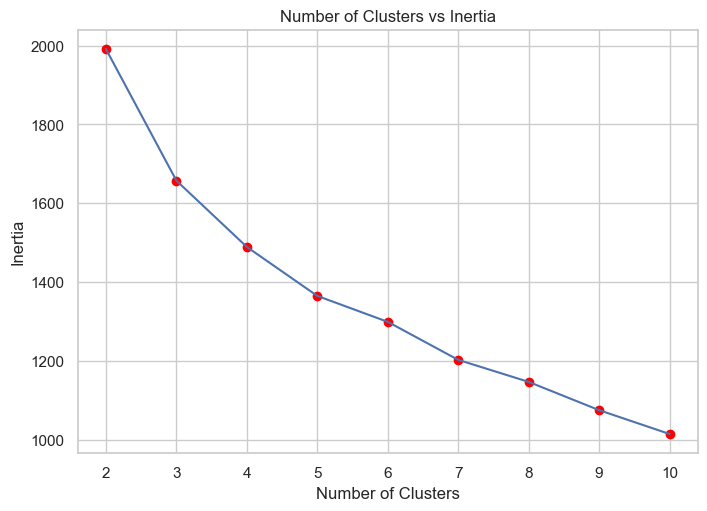

In [152]:
plt.figure(figsize=(8,5.5))
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ticks=range(2,11), labels=range(2,11))
plt.grid(True)
plt.annotate('Inflection Point: K=3',
             xy=(3.05,745),
             xytext=(7,850),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.annotate('',
            xy=(5.05,600),
            xytext=(9,790),
            arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

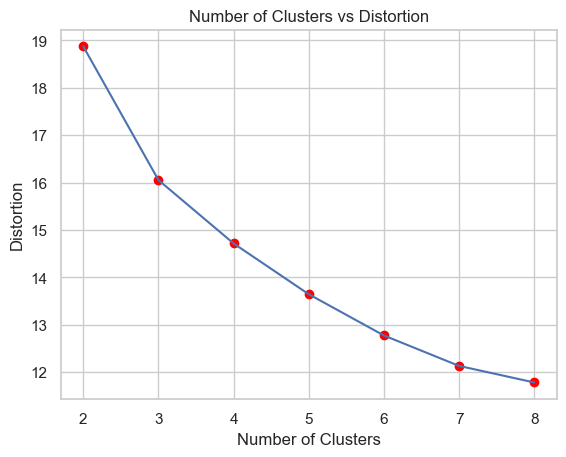

In [114]:
#plt.figure(figsize=(8,5.5))
plt.plot(range(2,9), distortion[:7])
plt.scatter(range(2,9),distortion[:7], color='red')
plt.annotate('Inflection Point: K= 5',
             xy=(5.05,3.5),
             xytext=(5.4,4.6),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.title('Number of Clusters vs Distortion')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
#plt.xticks(ticks=range(2,11), labels=range(2,11))
plt.grid(True)
plt.show()

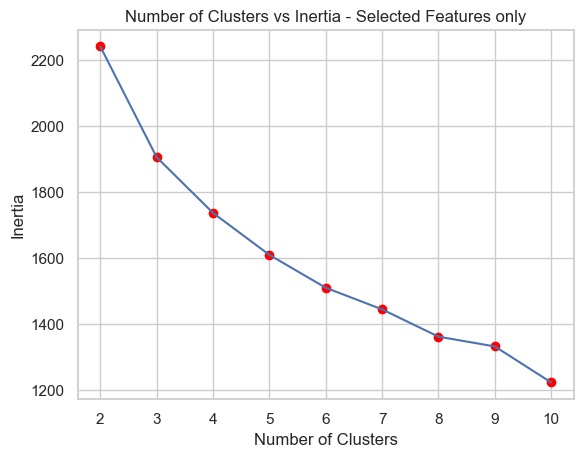

In [115]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia - Selected Features only')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.annotate('Inflection Point: K=4',
              xy=(4.05,135),
              xytext=(7,252),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

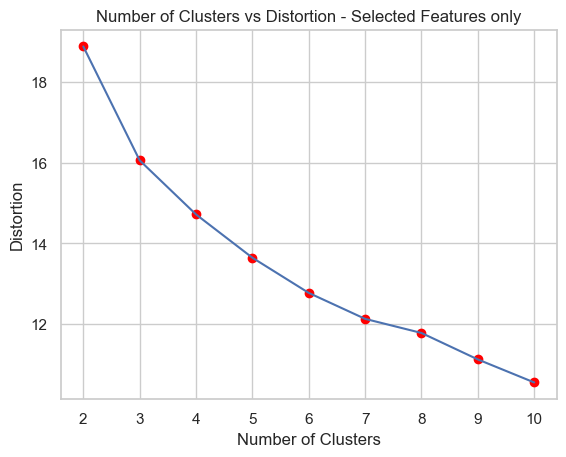

In [116]:
plt.plot(range(2,11), distortion)
plt.scatter(range(2,11),distortion, color='red')
plt.title('Number of Clusters vs Distortion - Selected Features only')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.annotate('Inflection Point: K=4',
              xy=(4.05,0.81),
              xytext=(7,1.42),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.grid(True)
plt.show()

In [154]:
inertia

[1991.3036397734581,
 1657.5318979678573,
 1489.3606624192992,
 1365.166183275377,
 1299.4025972688803,
 1203.023594358136,
 1147.169206670654,
 1075.4820600540286,
 1015.0239823506323]

In [155]:
from sklearn.cluster import KMeans

k_values = [3, 4, 6]
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_ds)
    inertias.append(kmeans.inertia_)

# Compare inertias
print("Inertias:", inertias)


Inertias: [1905.3654197689352, 1731.881845015614, 1519.6978933886994]


/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [156]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scaled_ds)
    silhouette_scores.append(silhouette_score(scaled_ds, labels))

# Compare silhouette scores
print("Silhouette Scores:", silhouette_scores)


Silhouette Scores: [0.1843670129713354, 0.1568872092266828, 0.1320339839045772]


/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [157]:
from sklearn.metrics import davies_bouldin_score

db_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scaled_ds)
    db_indices.append(davies_bouldin_score(scaled_ds, labels))

# Compare Davies-Bouldin indices
print("Davies-Bouldin Indices:", db_indices)


Davies-Bouldin Indices: [1.67738927696536, 1.7446812471651787, 1.737931431027744]


/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [159]:
scaled_ds

array([[-0.25787786,  0.78780306,  0.61036188, ...,  1.96026676,
         1.13126842,  0.16048135],
       [ 0.22487424,  0.05247035, -0.96842378, ..., -0.17915308,
         1.295458  , -0.86242974],
       [-1.23154458, -1.20739968,  1.36462691, ...,  1.67847149,
         1.212221  ,  0.84047535],
       ...,
       [-1.15154178,  1.98884648, -0.09037307, ...,  0.19495733,
         0.74401986, -0.48188557],
       [ 1.19747658, -0.13381393,  0.24013794, ..., -0.10513077,
        -1.36282118,  0.90654923],
       [-0.97812264, -0.48677363,  0.69066848, ..., -2.08212071,
         1.17507639,  0.03192685]])

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1259165211.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette )
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1259165211.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palet

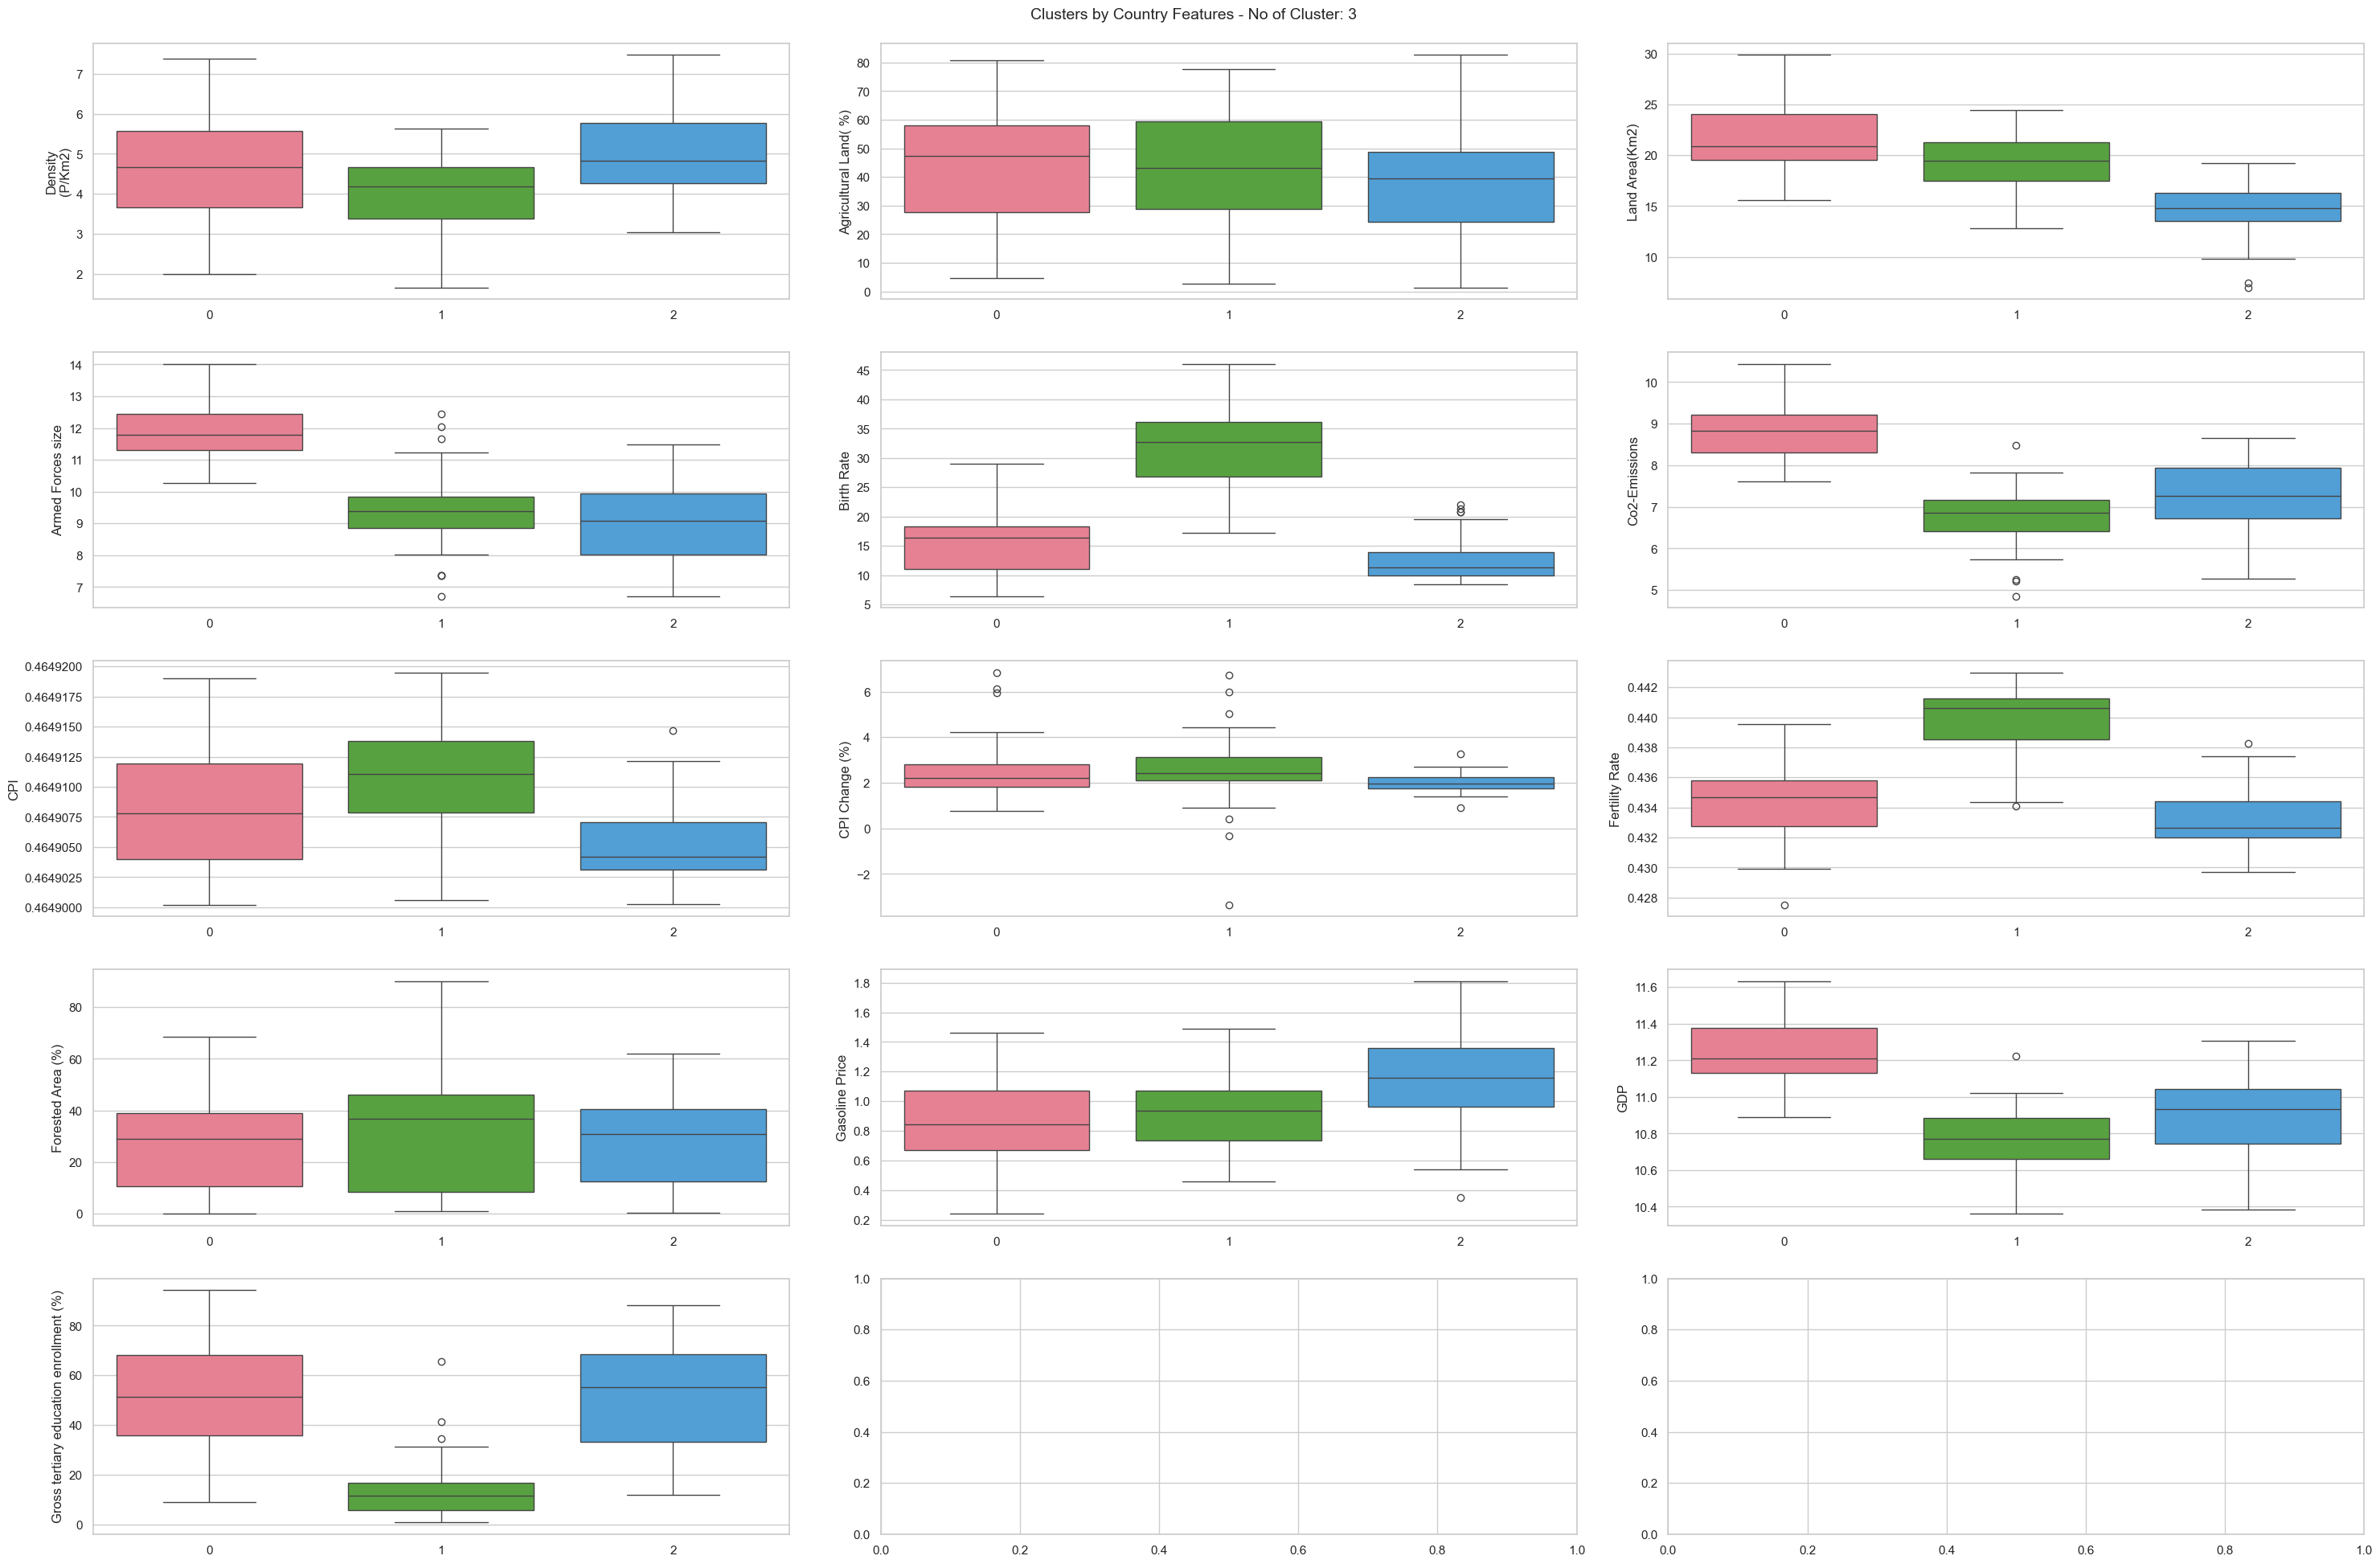

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1259165211.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette )
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1259165211.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palet

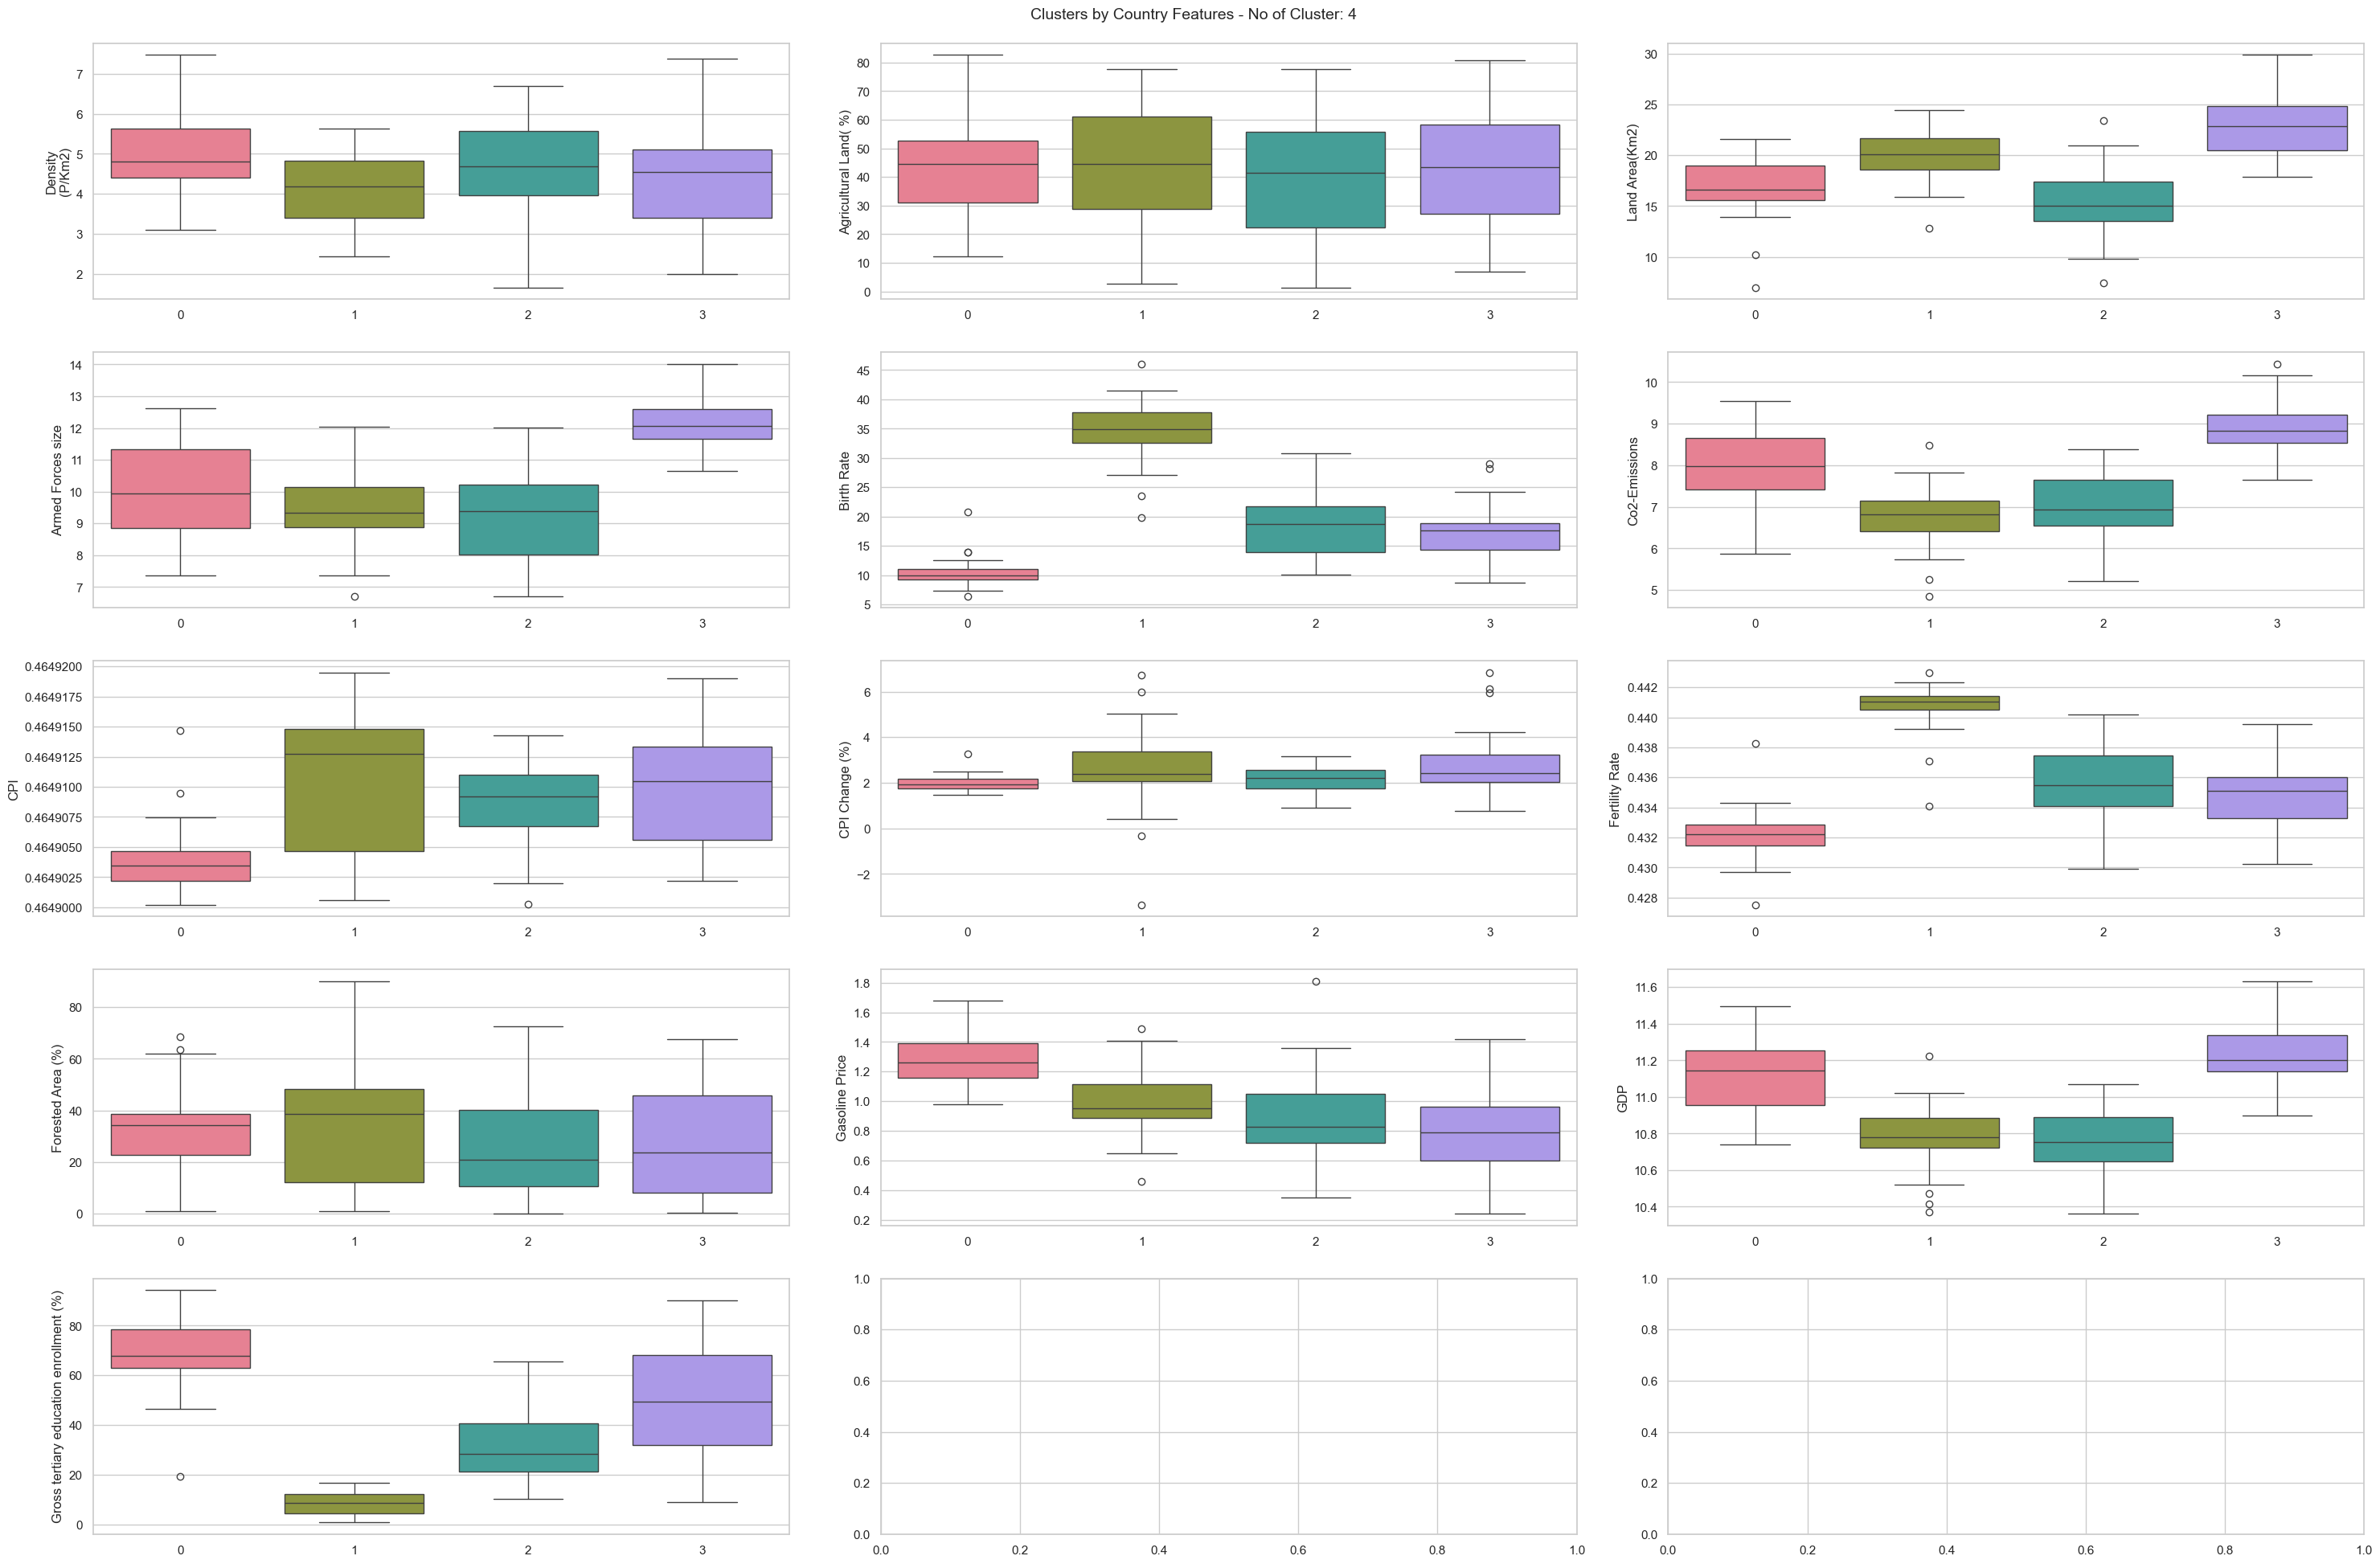

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1259165211.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette )
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1259165211.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palet

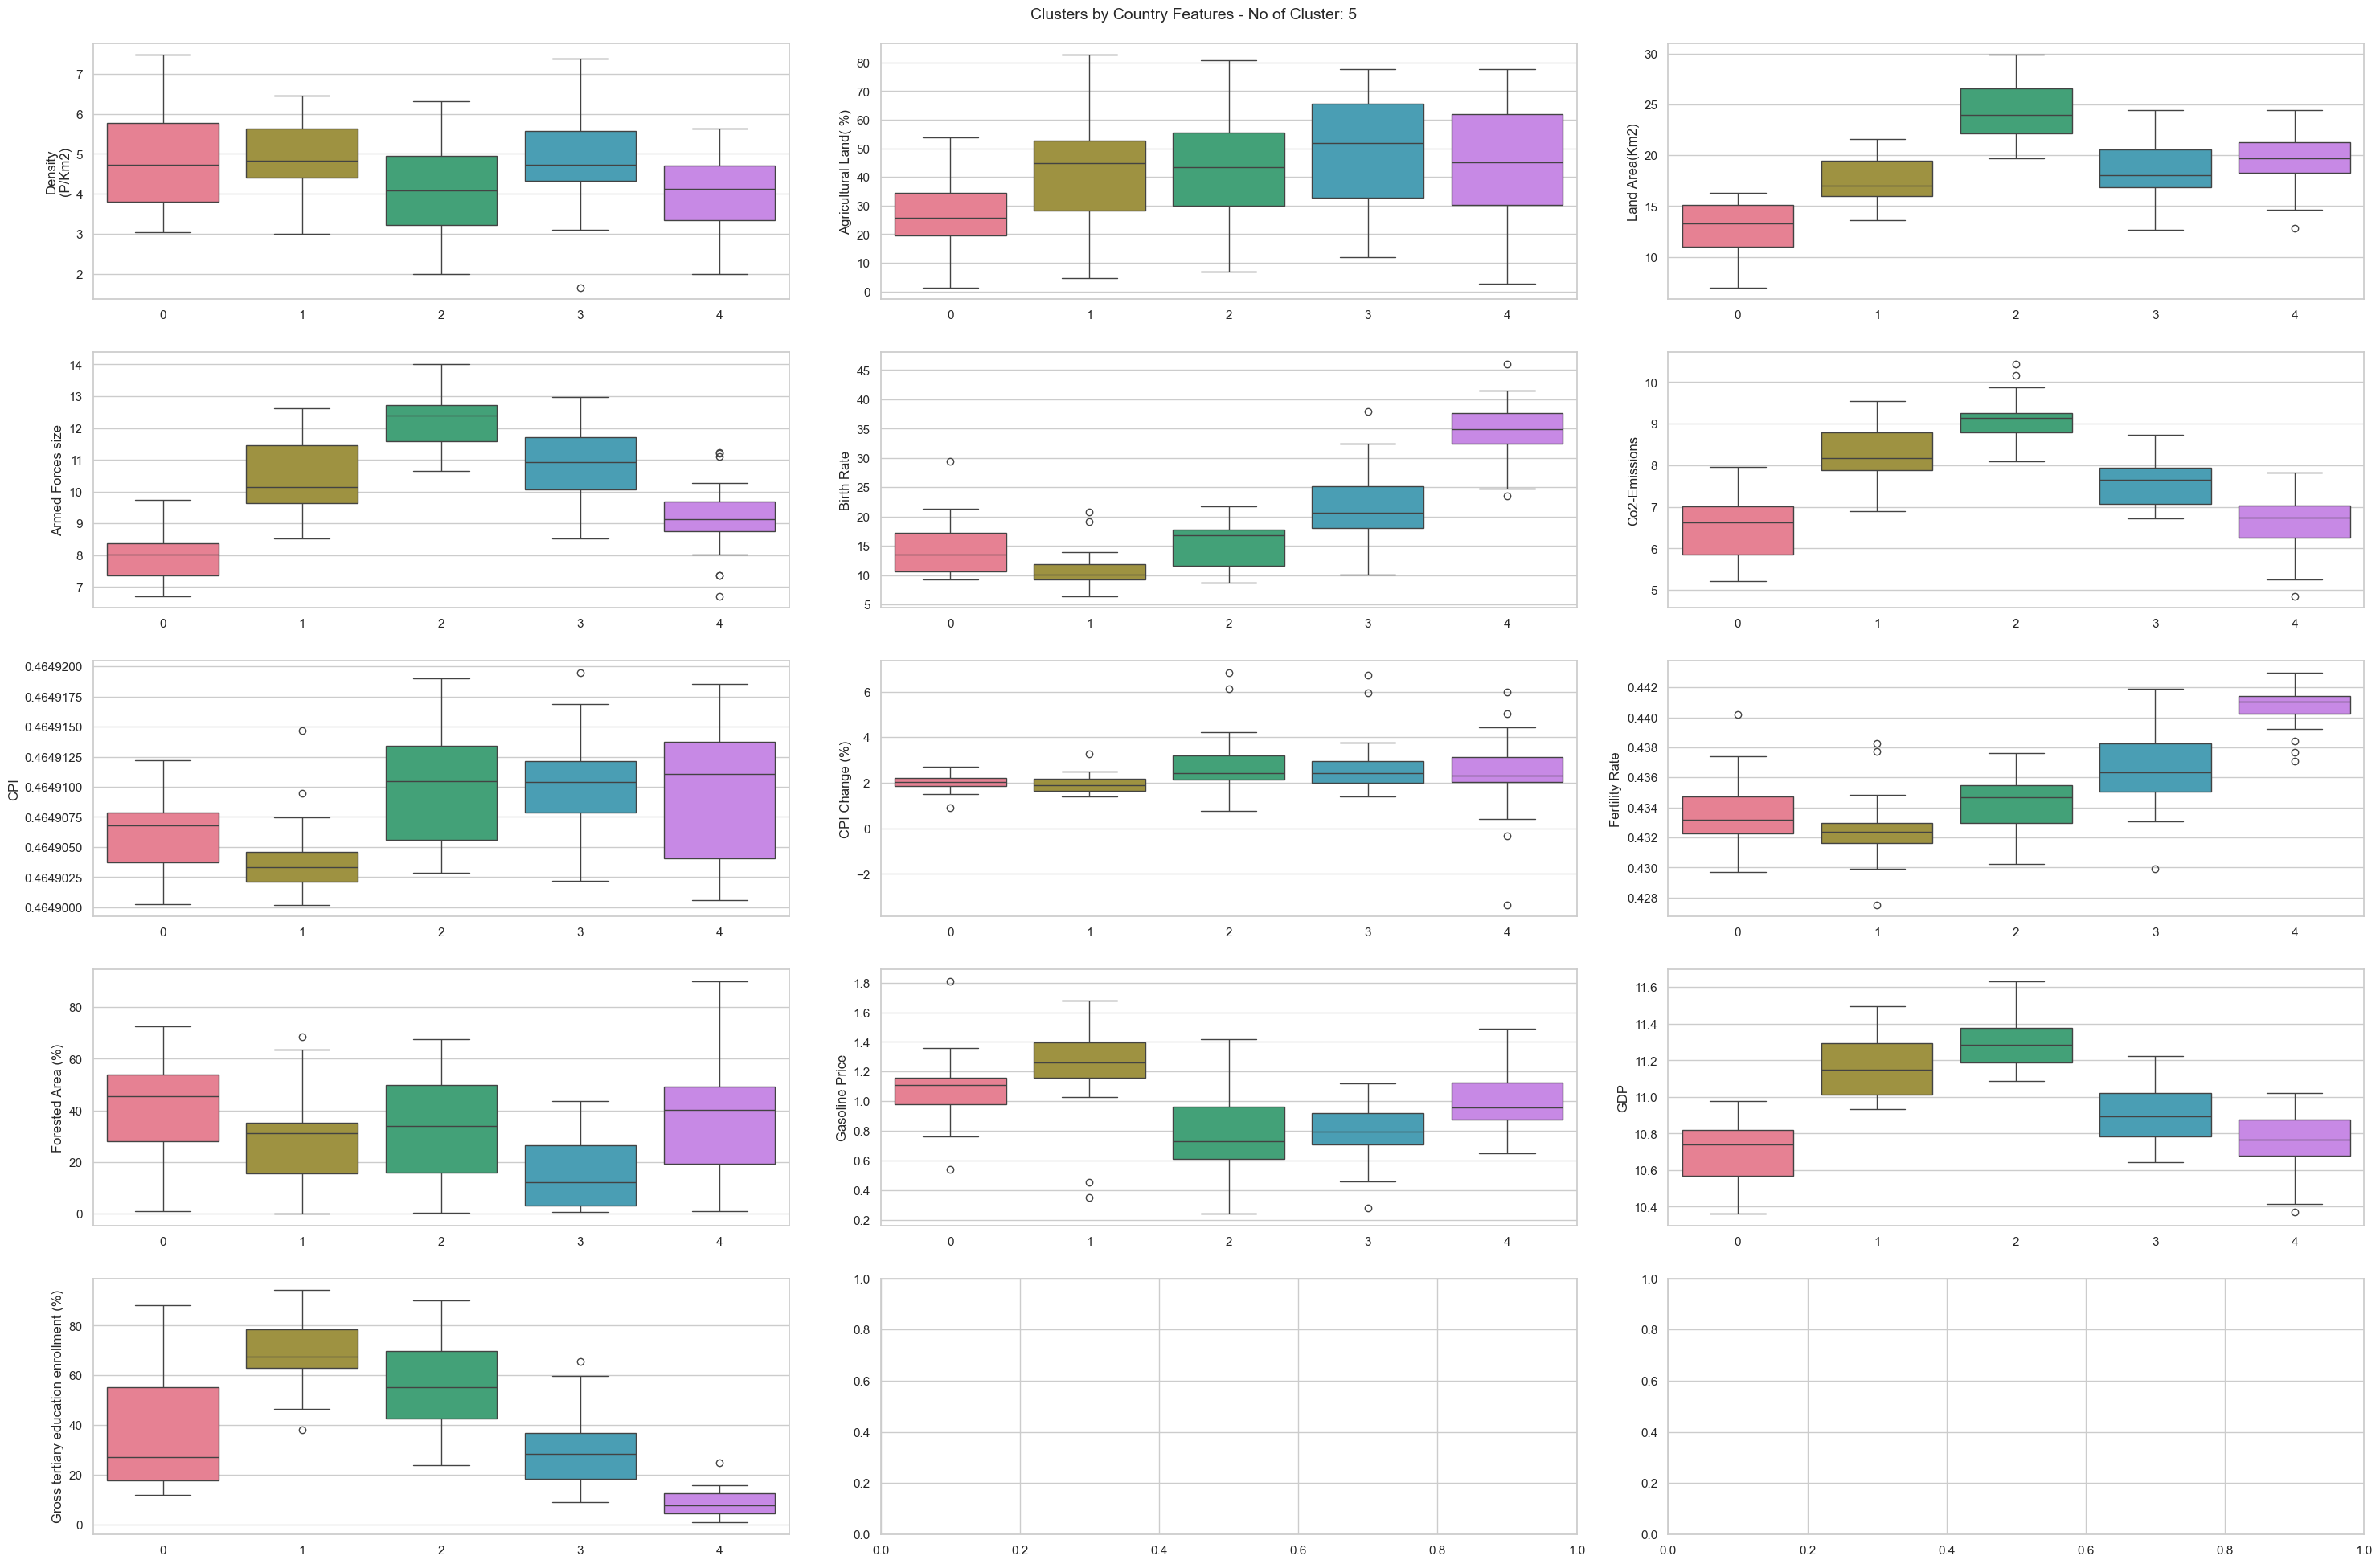

In [213]:
def cluster_boxplots(scaled_dataset, original_dataset, features, k_values=[3, 4, 5], plot_size=(30, 20), add_info=''):
    num_features = len(features)
    num_rows, num_cols = divmod(num_features, 3)
    if num_cols > 0:
        num_rows += 1

    for k in k_values:
        km = KMeans(init='k-means++', n_clusters=k, random_state=98)
        km.fit(scaled_dataset)
        original_dataset['cluster'] = km.labels_
        # Generating a color palette for each cluster
        cluster_palette = sns.color_palette('husl', n_colors=k)
        fig, axes = plt.subplots(num_rows, 3, figsize=plot_size)
        
        for i, feature in enumerate(features):
            row, col = divmod(i, 3)
            ax = axes[row, col] if num_rows > 1 else axes[col]
            sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette )
            ax.set_xlabel('')

        fig.suptitle('Clusters by Country Features - No of Cluster: {}{}'.format(k, add_info), fontsize=14)
        plt.tight_layout(pad=2)
        plt.show()

# Example usage:
selected_features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
                      'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
                      'Gasoline Price', 'GDP', 'Gross tertiary education enrollment (%)']

cluster_boxplots(scaled_ds, bc_data, selected_features, k_values=[3, 4, 5])


/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1875563816.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_palette)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1875563816.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_pale

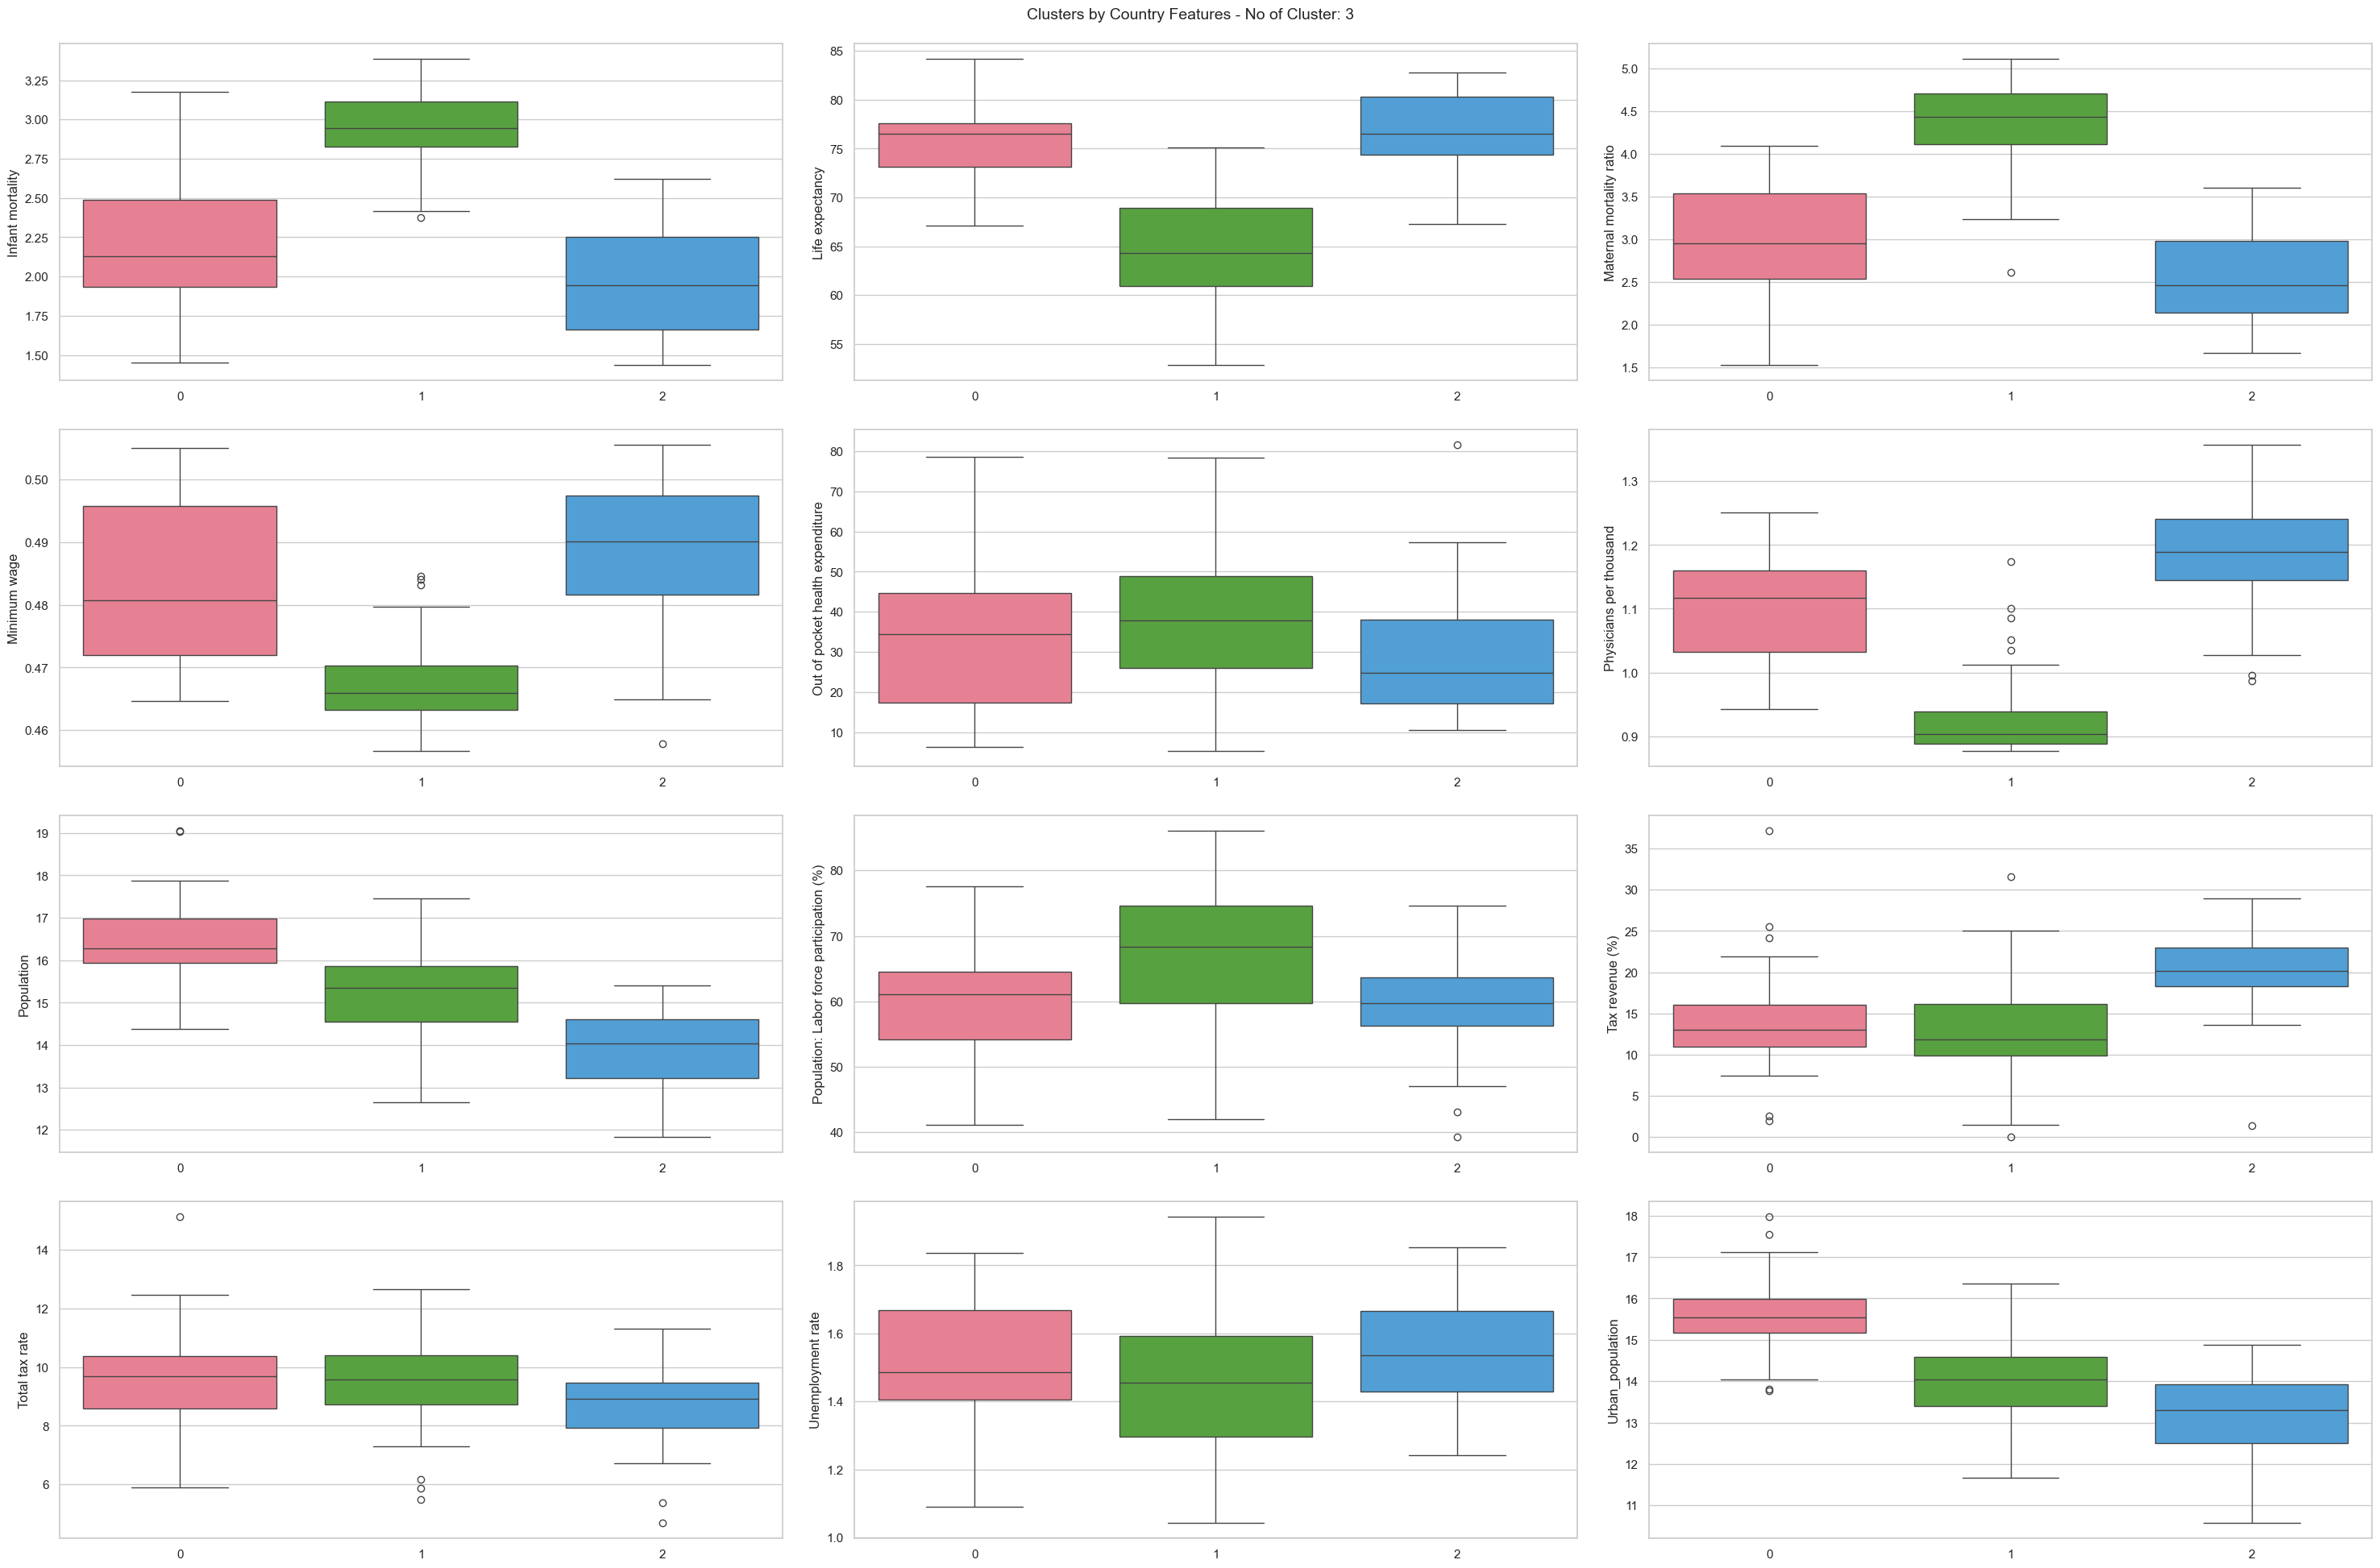

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1875563816.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_palette)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1875563816.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_pale

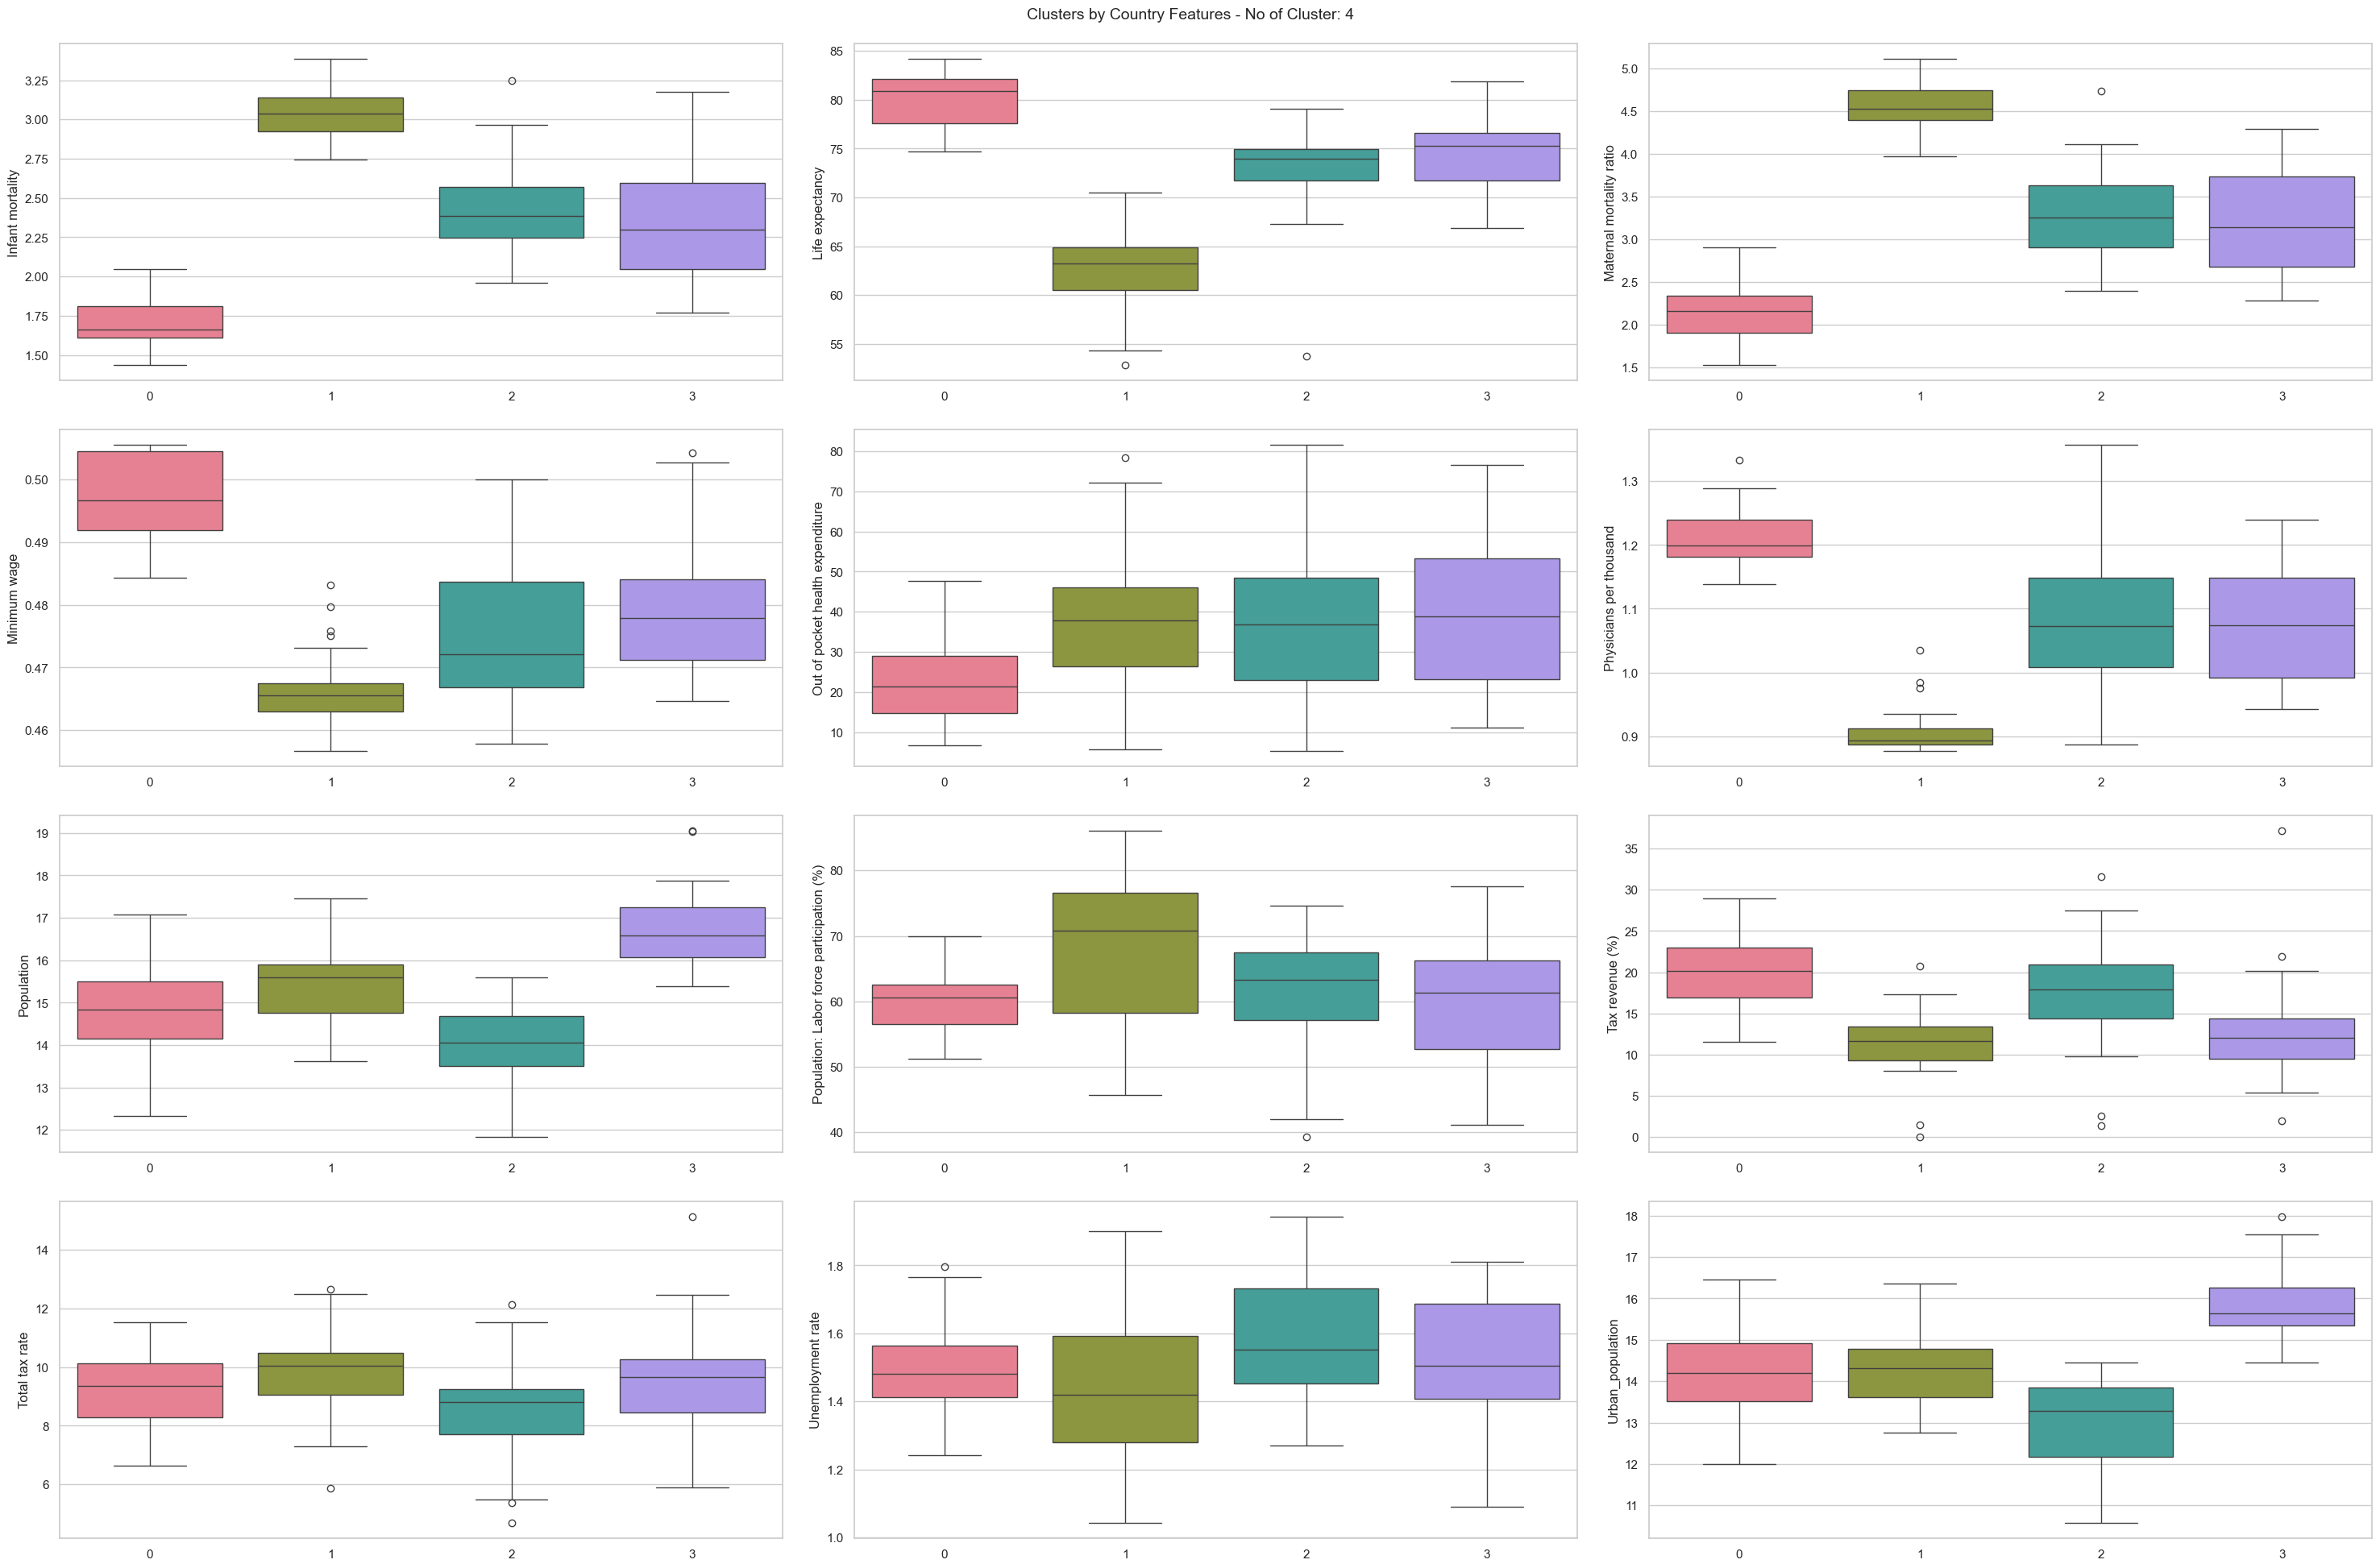

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1875563816.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_palette)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1875563816.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_pale

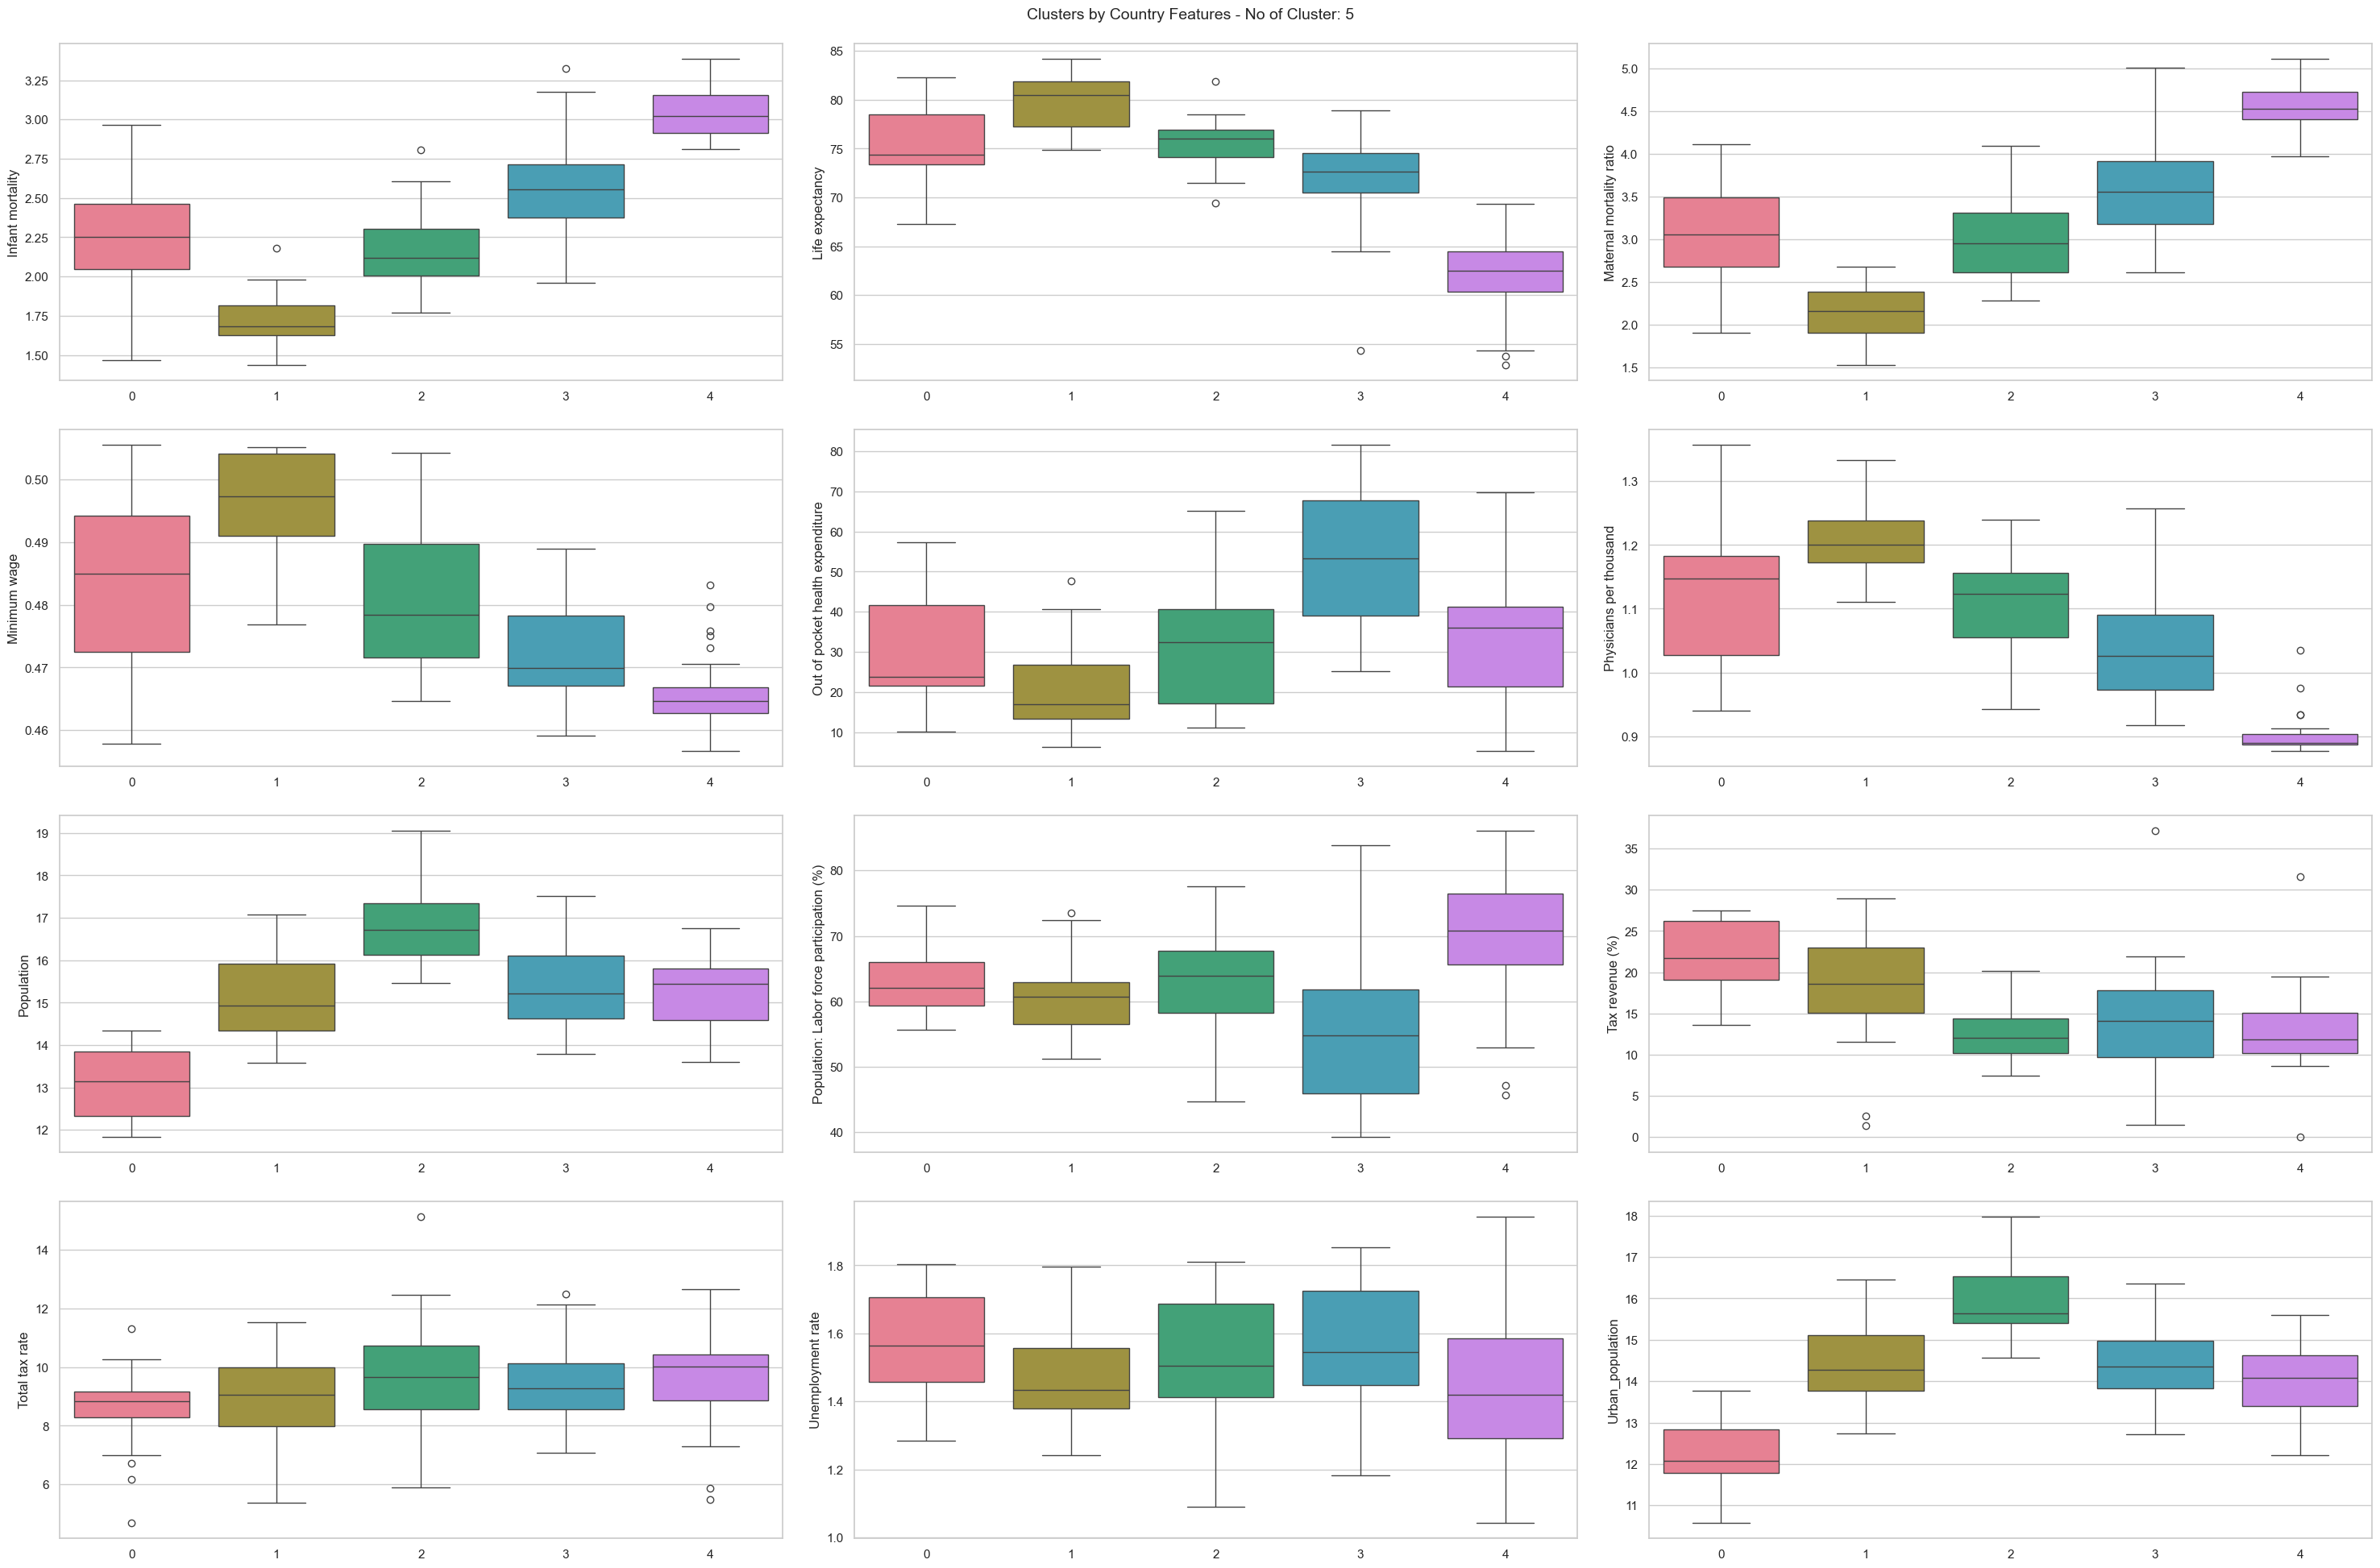

In [212]:
def cluster_boxplots(scaled_dataset, original_dataset, features, k_values=[3, 4, 5], plot_size=(30, 20), add_info=''):
    num_features = len(features)
    num_rows, num_cols = divmod(num_features, 3)
    if num_cols > 0:
        num_rows += 1

    for k in k_values:
        km = KMeans(init='k-means++', n_clusters=k, random_state=98)
        km.fit(scaled_dataset)
        original_dataset['cluster'] = km.labels_

        # Generating a color palette for each cluster
        cluster_palette = sns.color_palette('husl', n_colors=k)
        
        fig, axes = plt.subplots(num_rows, 3, figsize=plot_size)

        for i, feature in enumerate(features):
            row, col = divmod(i, 3)
            ax = axes[row, col] if num_rows > 1 else axes[col]
            sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_palette)
            ax.set_xlabel('')

        fig.suptitle('Clusters by Country Features - No of Cluster: {}{}'.format(k, add_info), fontsize=14)
        plt.tight_layout(pad=2)
        plt.show()

# Example usage:
selected_features = ['Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure',
                      'Physicians per thousand', 'Population', 'Population: Labor force participation (%)',
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

cluster_boxplots(scaled_ds, bc_data, selected_features, k_values=[3, 4, 5])


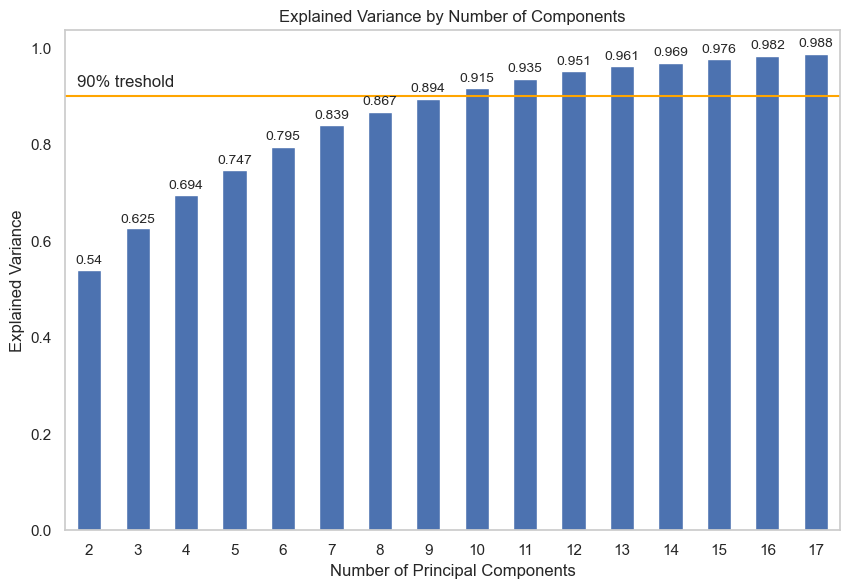

In [118]:
expl_var = {'N_components':[], 'Explained Variance':[]}

for p in range(2,18):
    pca = PCA(n_components=p)
    pca_data = pca.fit_transform(scaled_ds)
    expl_var['N_components'].append(p)
    expl_var['Explained Variance'].append(pca.explained_variance_ratio_.sum())
    

expl_var = pd.DataFrame(expl_var)
barchart = expl_var.plot(x='N_components', y='Explained Variance', kind='bar',figsize=(10,6.5), legend=False)
for i in barchart.patches:
    barchart.annotate(round(i.get_height(),3), # get the frequency of the variable categories
                      xy = (i.get_x() + i.get_width()/2, i.get_height()*1.005), # set the coordinates for each label
                      ha='center', # set the horizontal alignment
                      va='top', # set the vertical alignment
                      xytext=(0,10), # default
                      textcoords='offset points', # default
                      fontsize=10) # set the font size
plt.plot(range(-1,20), np.full((21,), 0.9), color='orange')
plt.text(-0.25, 0.92, '90% treshold')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [119]:
pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_ds)

inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=pca_data))
    silhouette.append(silhouette_score(pca_data, km.labels_))

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

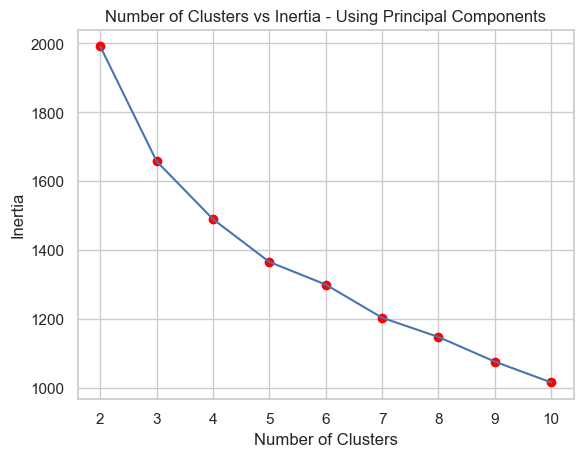

In [120]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.annotate('Inflection Point: K=3',
             xy=(3.05,630),
             xytext=(7,700),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

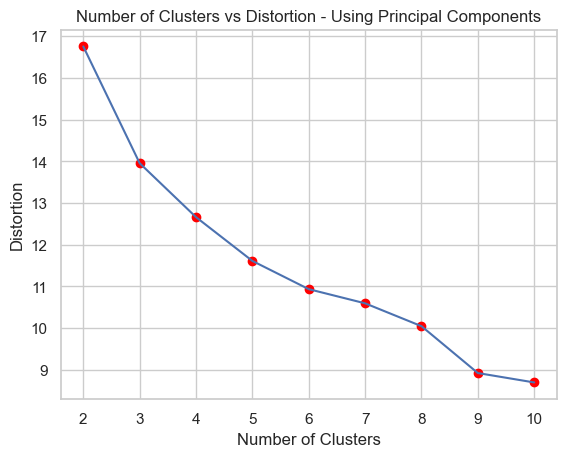

In [121]:
plt.plot(range(2,11), distortion)
plt.scatter(range(2,11),distortion, color='red')
plt.annotate('Inflection Points: K= 4, 5, 8',
              xy=(4.05,3.2),
              xytext=(6.75,4.1),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.annotate('',
             xy=(5.05,2.9),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.annotate('',
             xy=(5.05,2.9),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.annotate('',
             xy=(8.05,2.2),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.title('Number of Clusters vs Distortion - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/617810743.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette )
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/617810743.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette

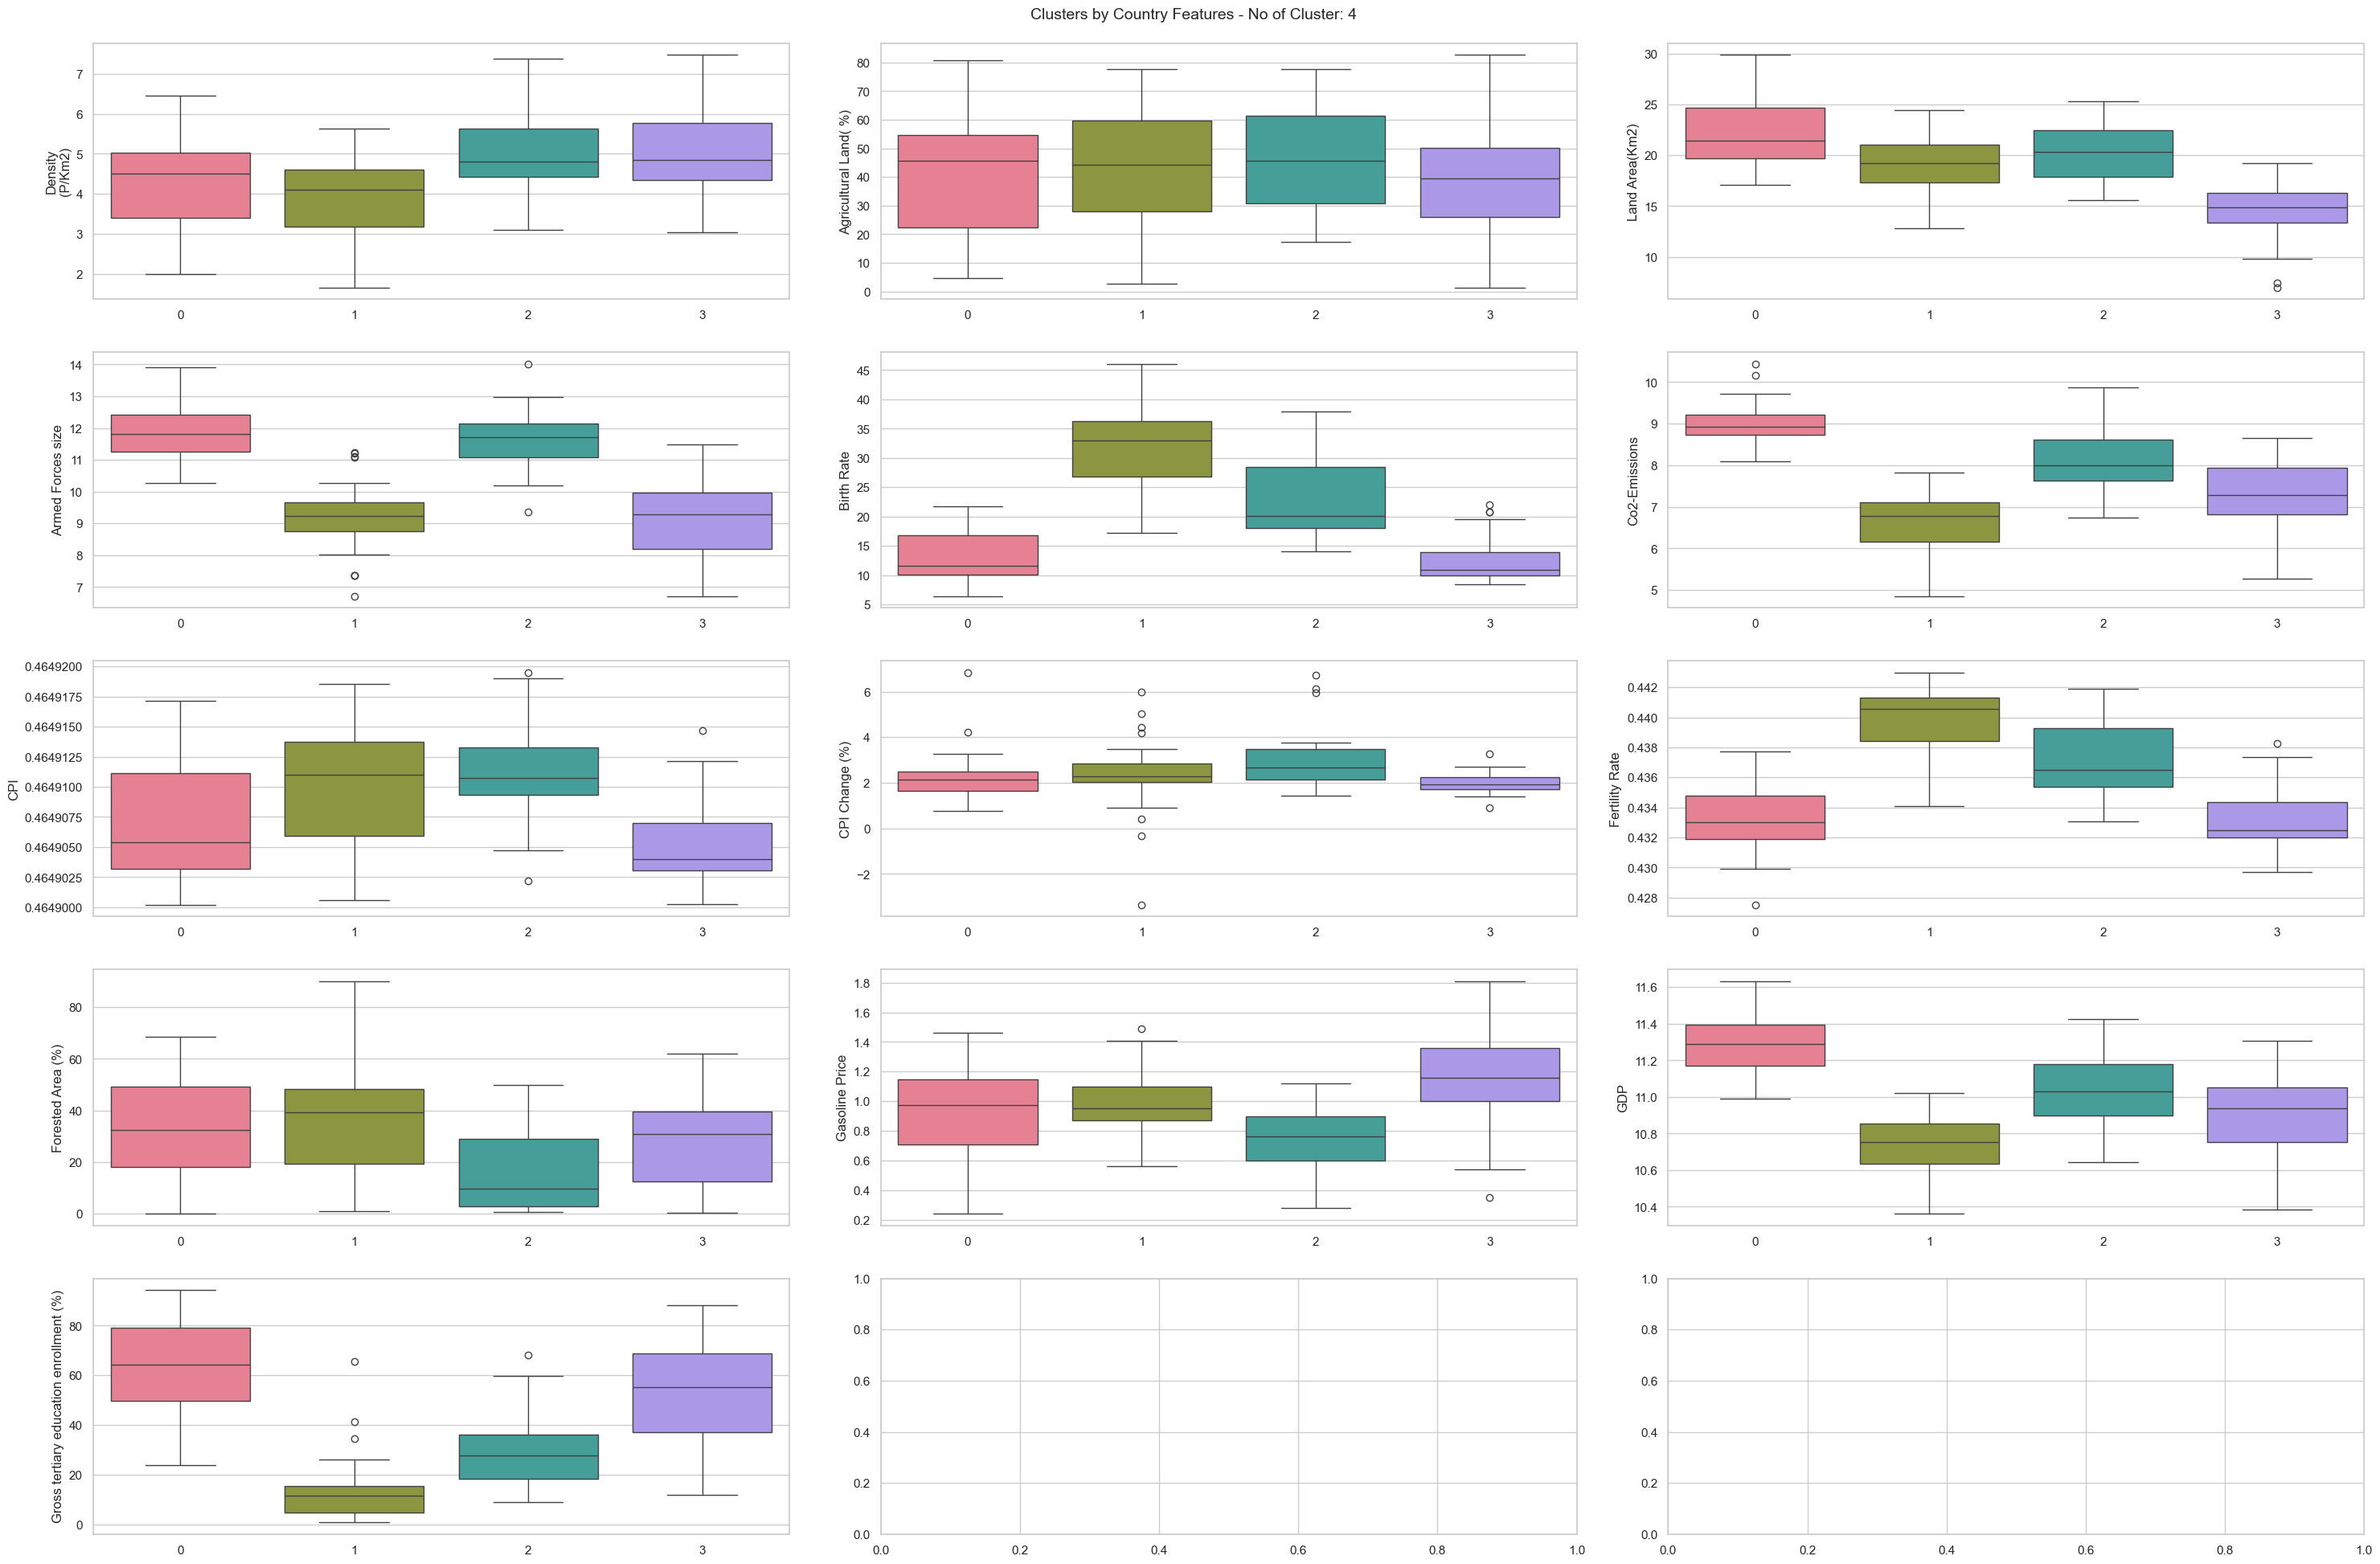

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/617810743.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette )
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/617810743.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette

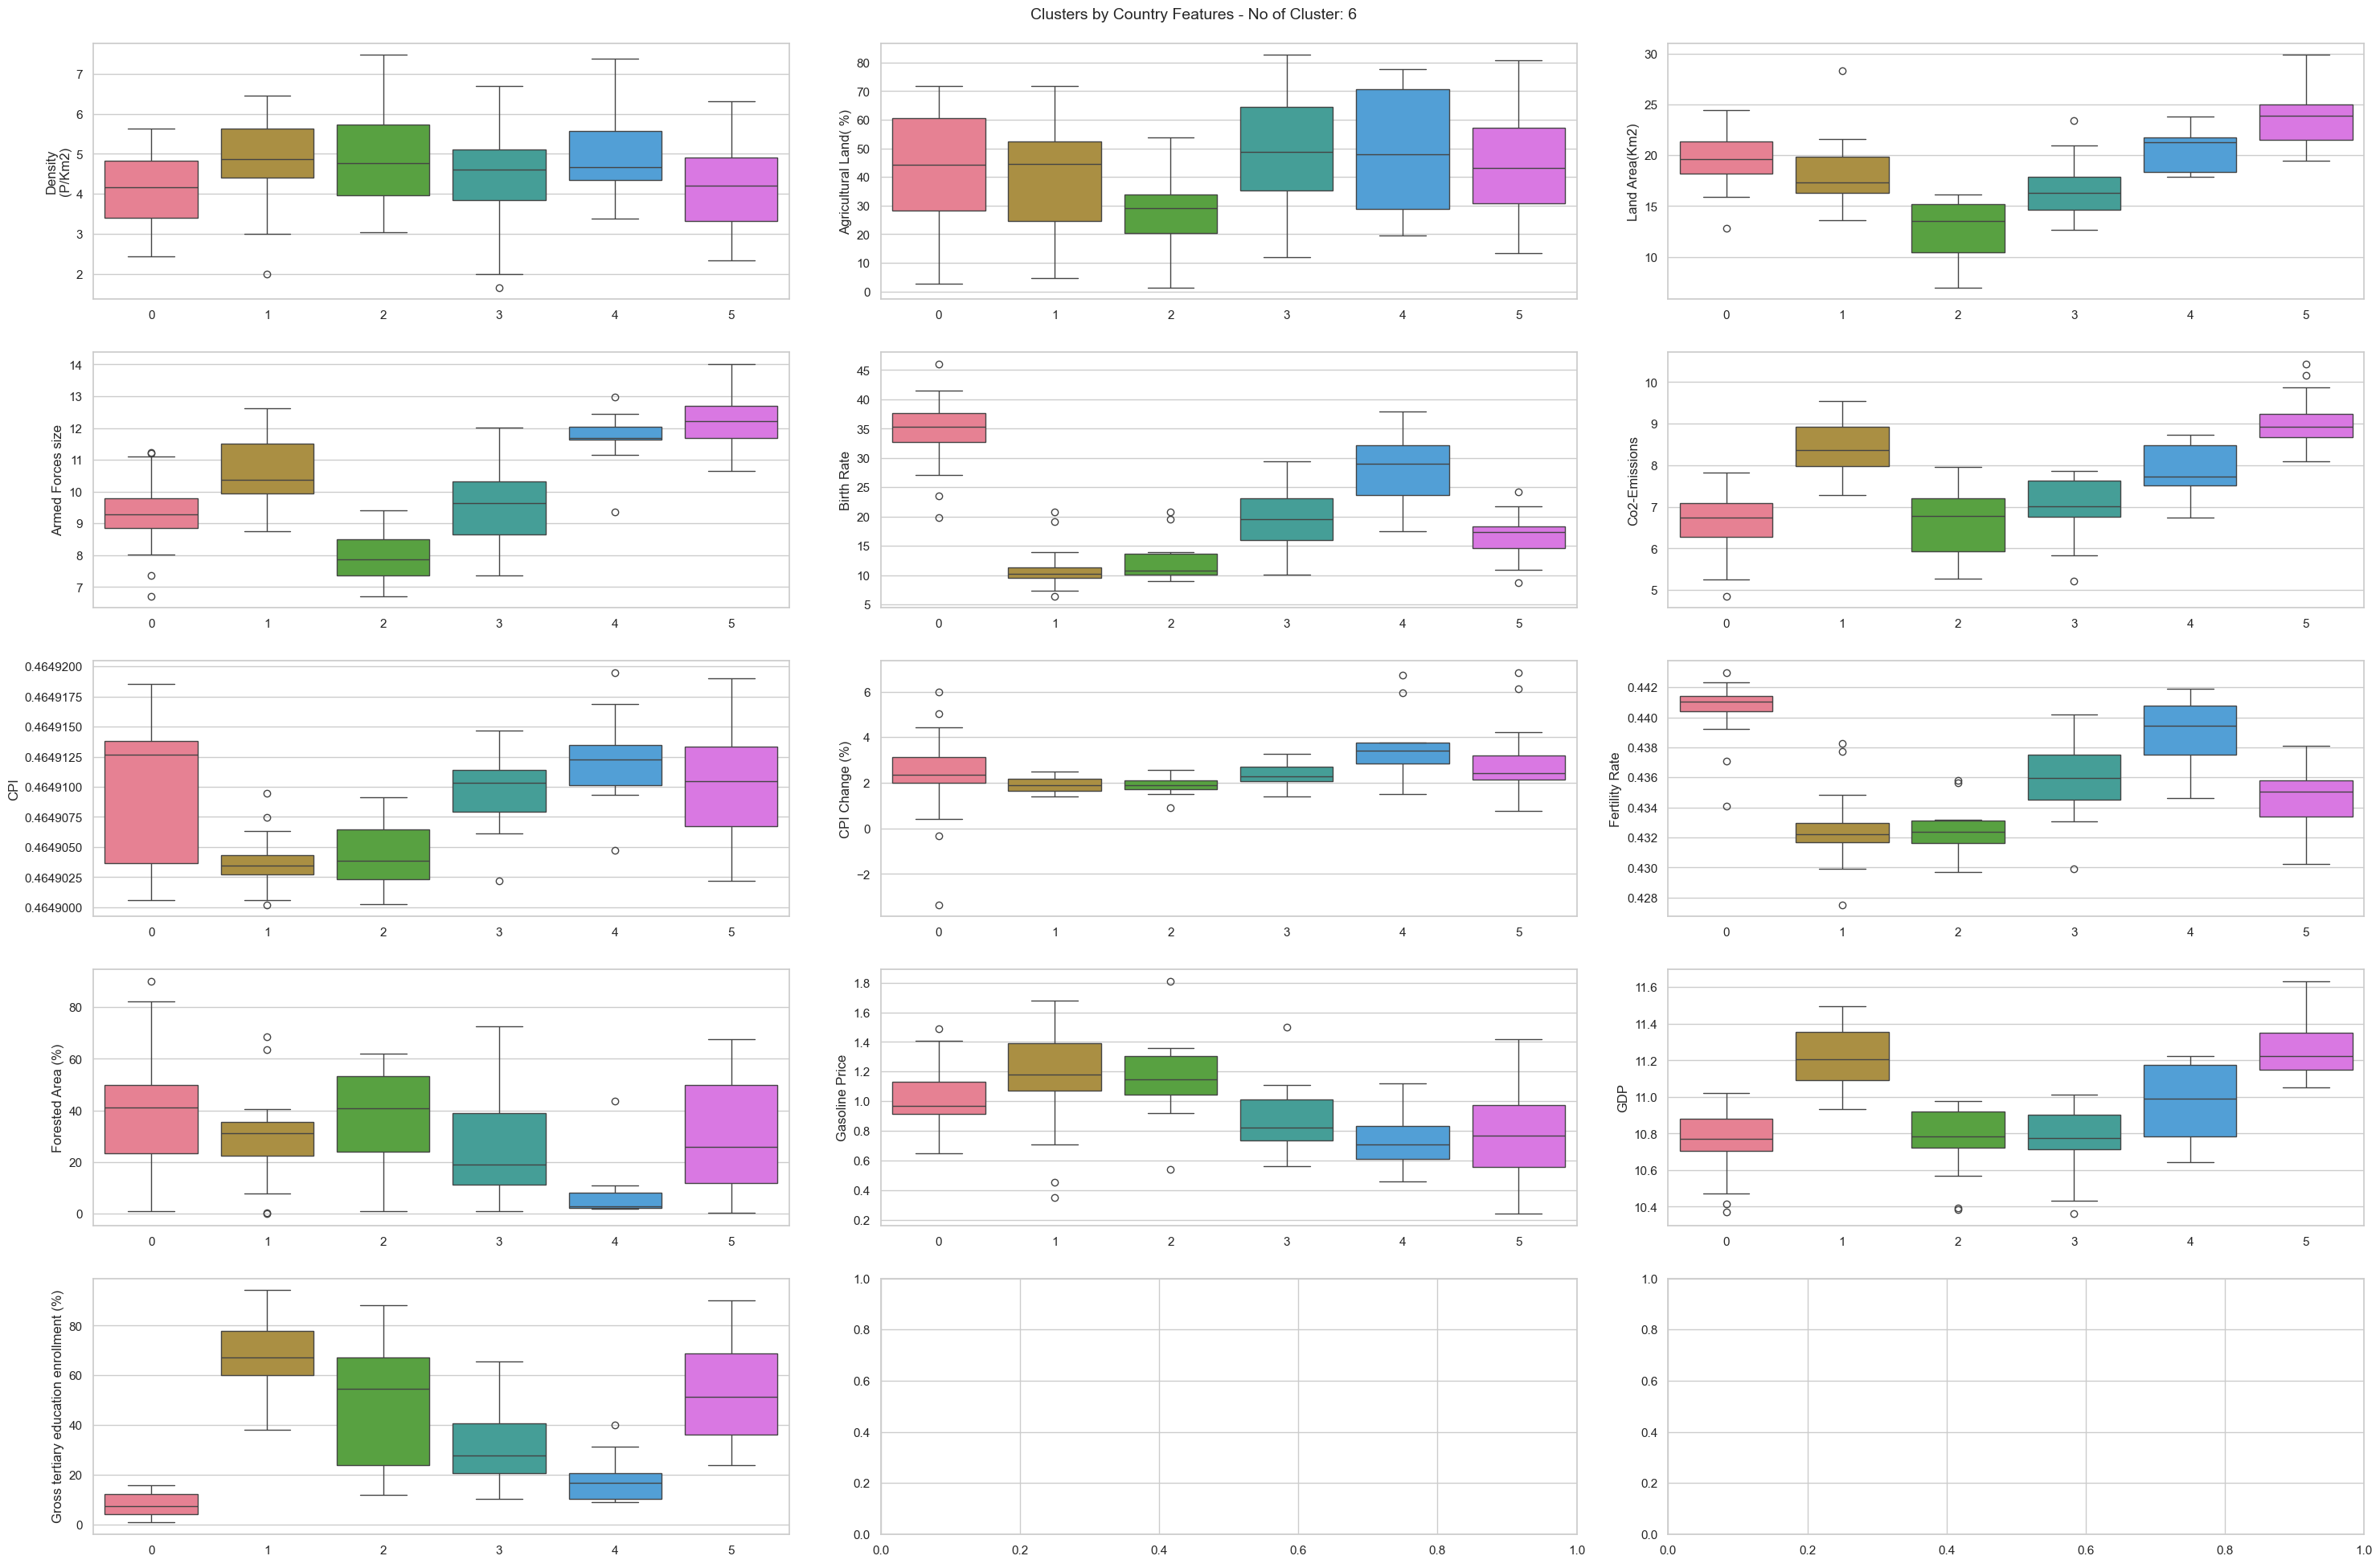

In [216]:
def cluster_boxplots(scaled_dataset, original_dataset, features, k_values=[4, 6], plot_size=(30, 20), add_info=''):
    num_features = len(features)
    num_rows, num_cols = divmod(num_features, 3)
    if num_cols > 0:
        num_rows += 1

    for k in k_values:
        km = KMeans(init='k-means++', n_clusters=k, random_state=98)
        km.fit(scaled_dataset)
        original_dataset['cluster'] = km.labels_
        # Generating a color palette for each cluster
        cluster_palette = sns.color_palette('husl', n_colors=k)
        fig, axes = plt.subplots(num_rows, 3, figsize=plot_size)
        
        for i, feature in enumerate(features):
            row, col = divmod(i, 3)
            ax = axes[row, col] if num_rows > 1 else axes[col]
            sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax,palette=cluster_palette )
            ax.set_xlabel('')

        fig.suptitle('Clusters by Country Features - No of Cluster: {}{}'.format(k, add_info), fontsize=14)
        plt.tight_layout(pad=2)
        plt.show()

# Example usage:
selected_features = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
                      'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
                      'Gasoline Price', 'GDP', 'Gross tertiary education enrollment (%)']

cluster_boxplots(pca_data, bc_data, selected_features, k_values=[4, 6])

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1245822838.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_palette)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1245822838.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_pale

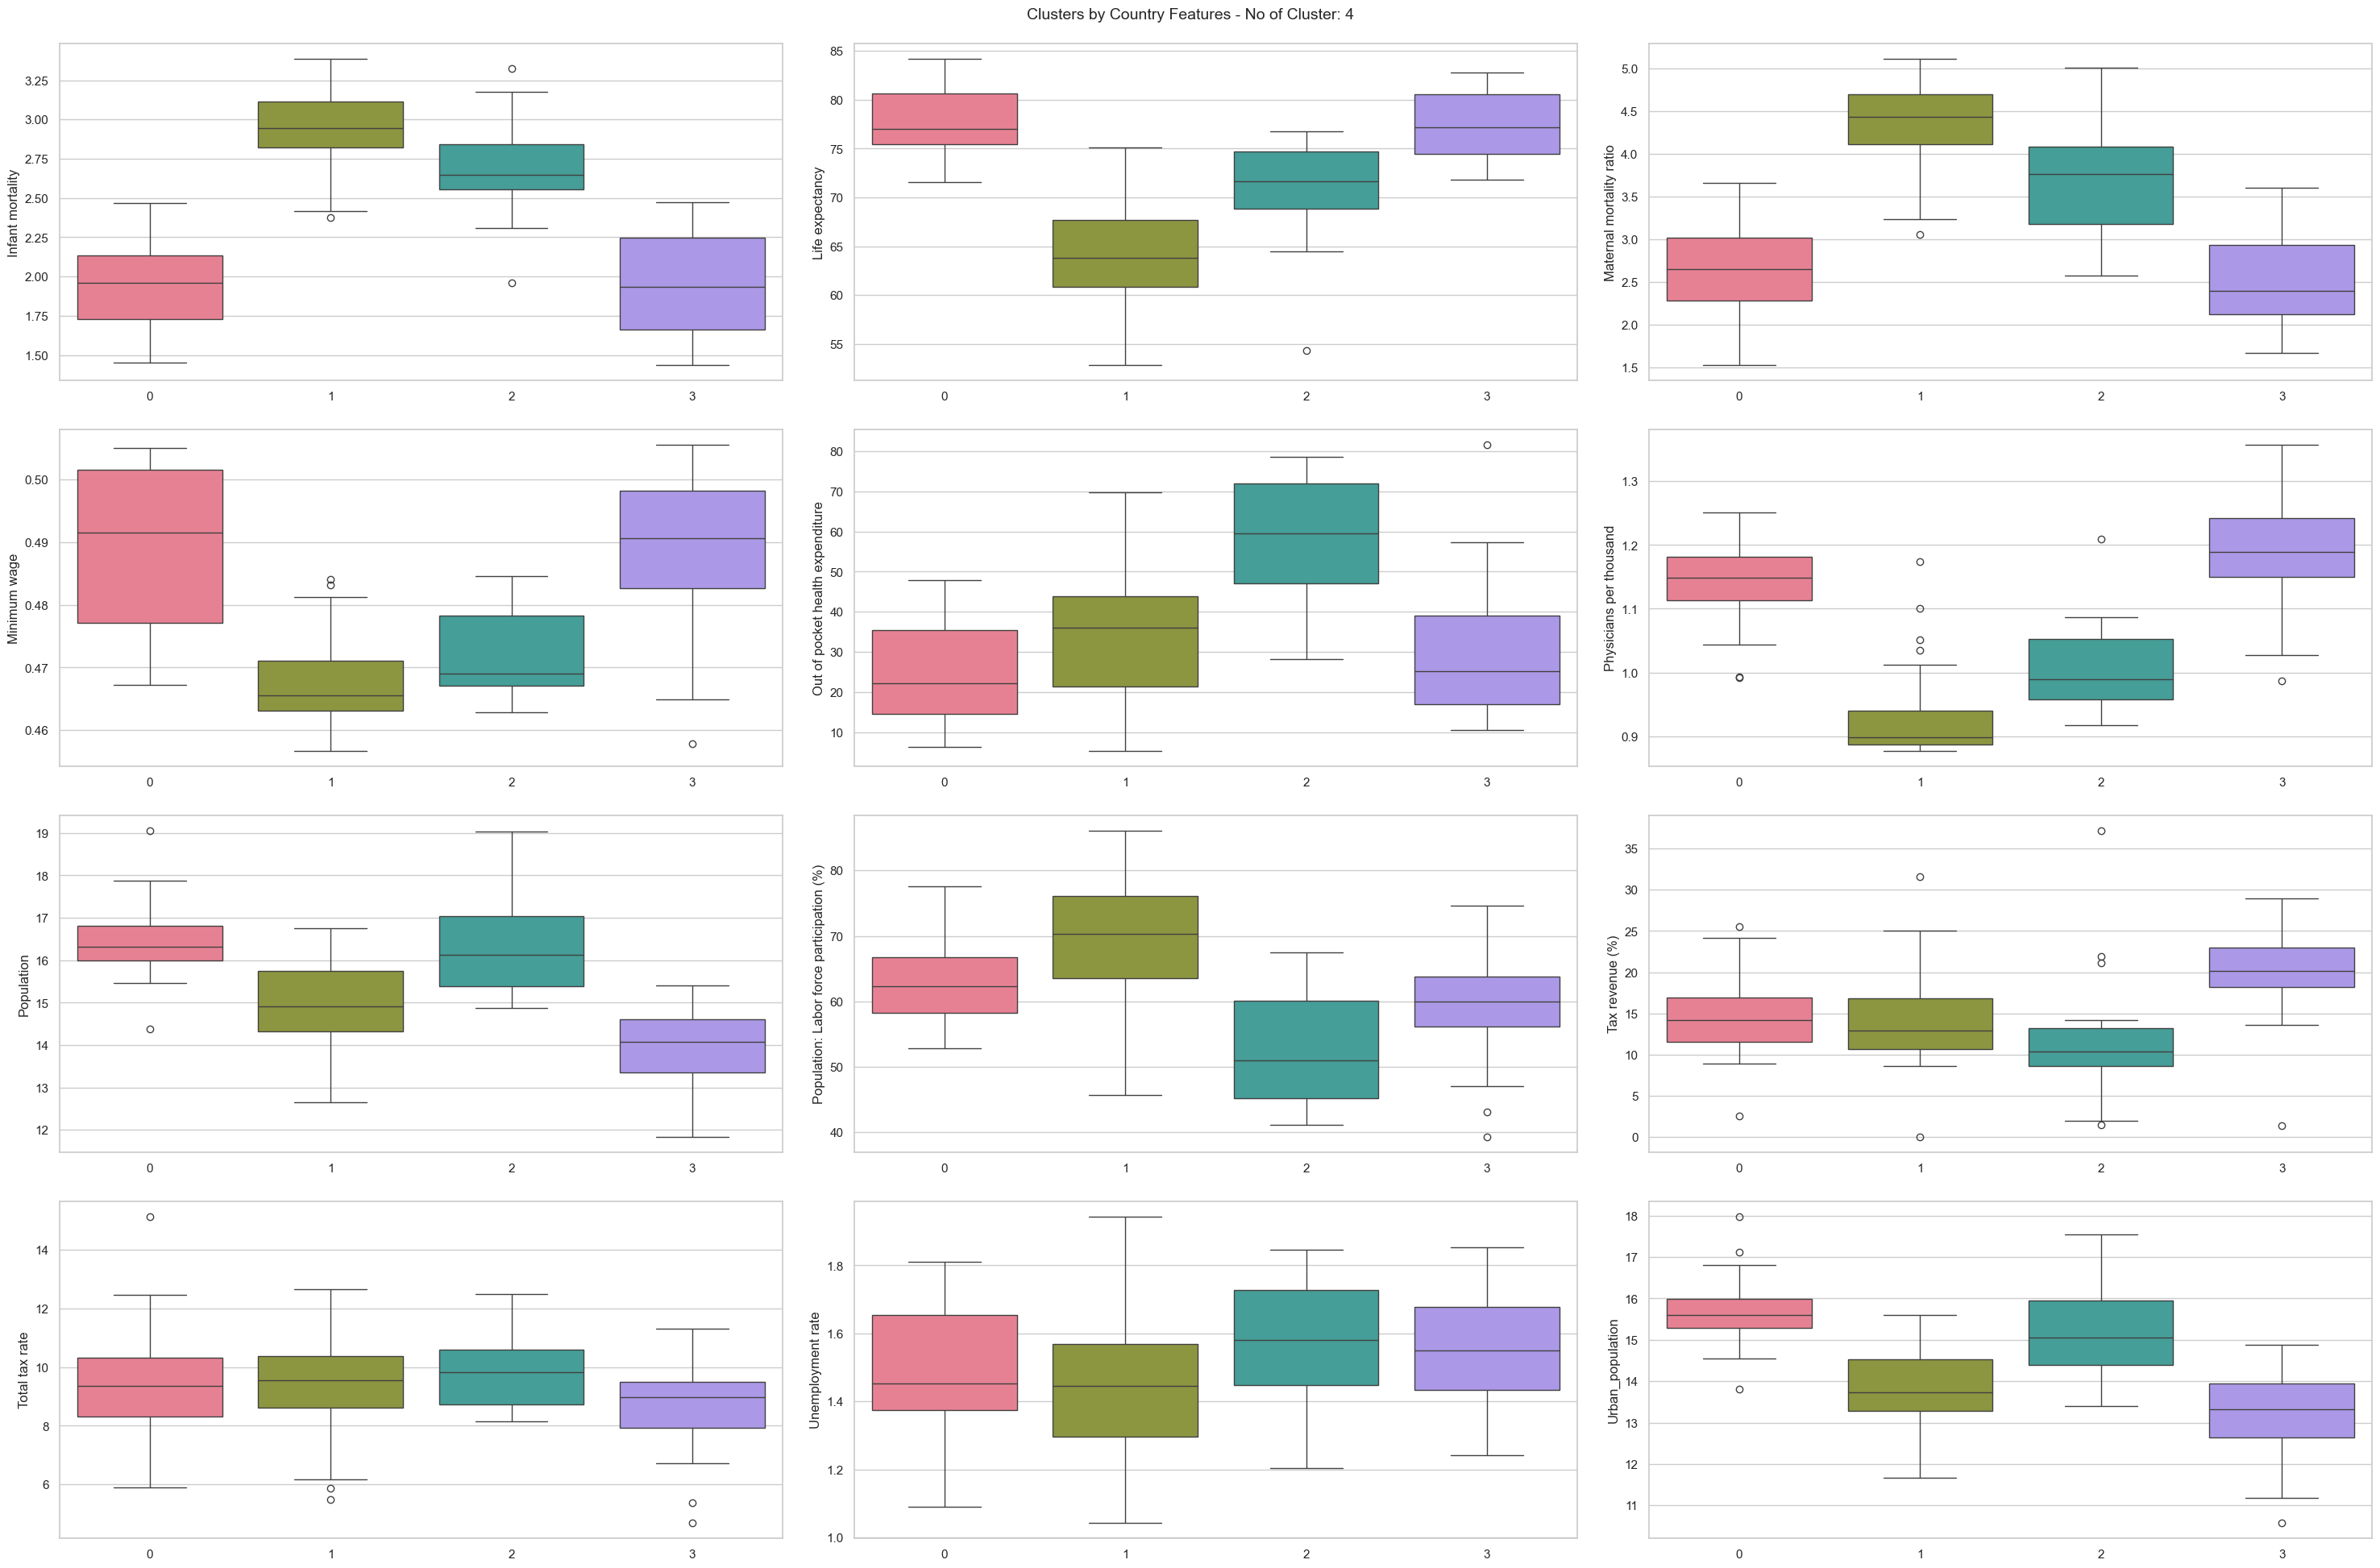

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1245822838.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_palette)
/var/folders/_k/4l462p5917dcr7f48lj53rmc0000gn/T/ipykernel_3456/1245822838.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_pale

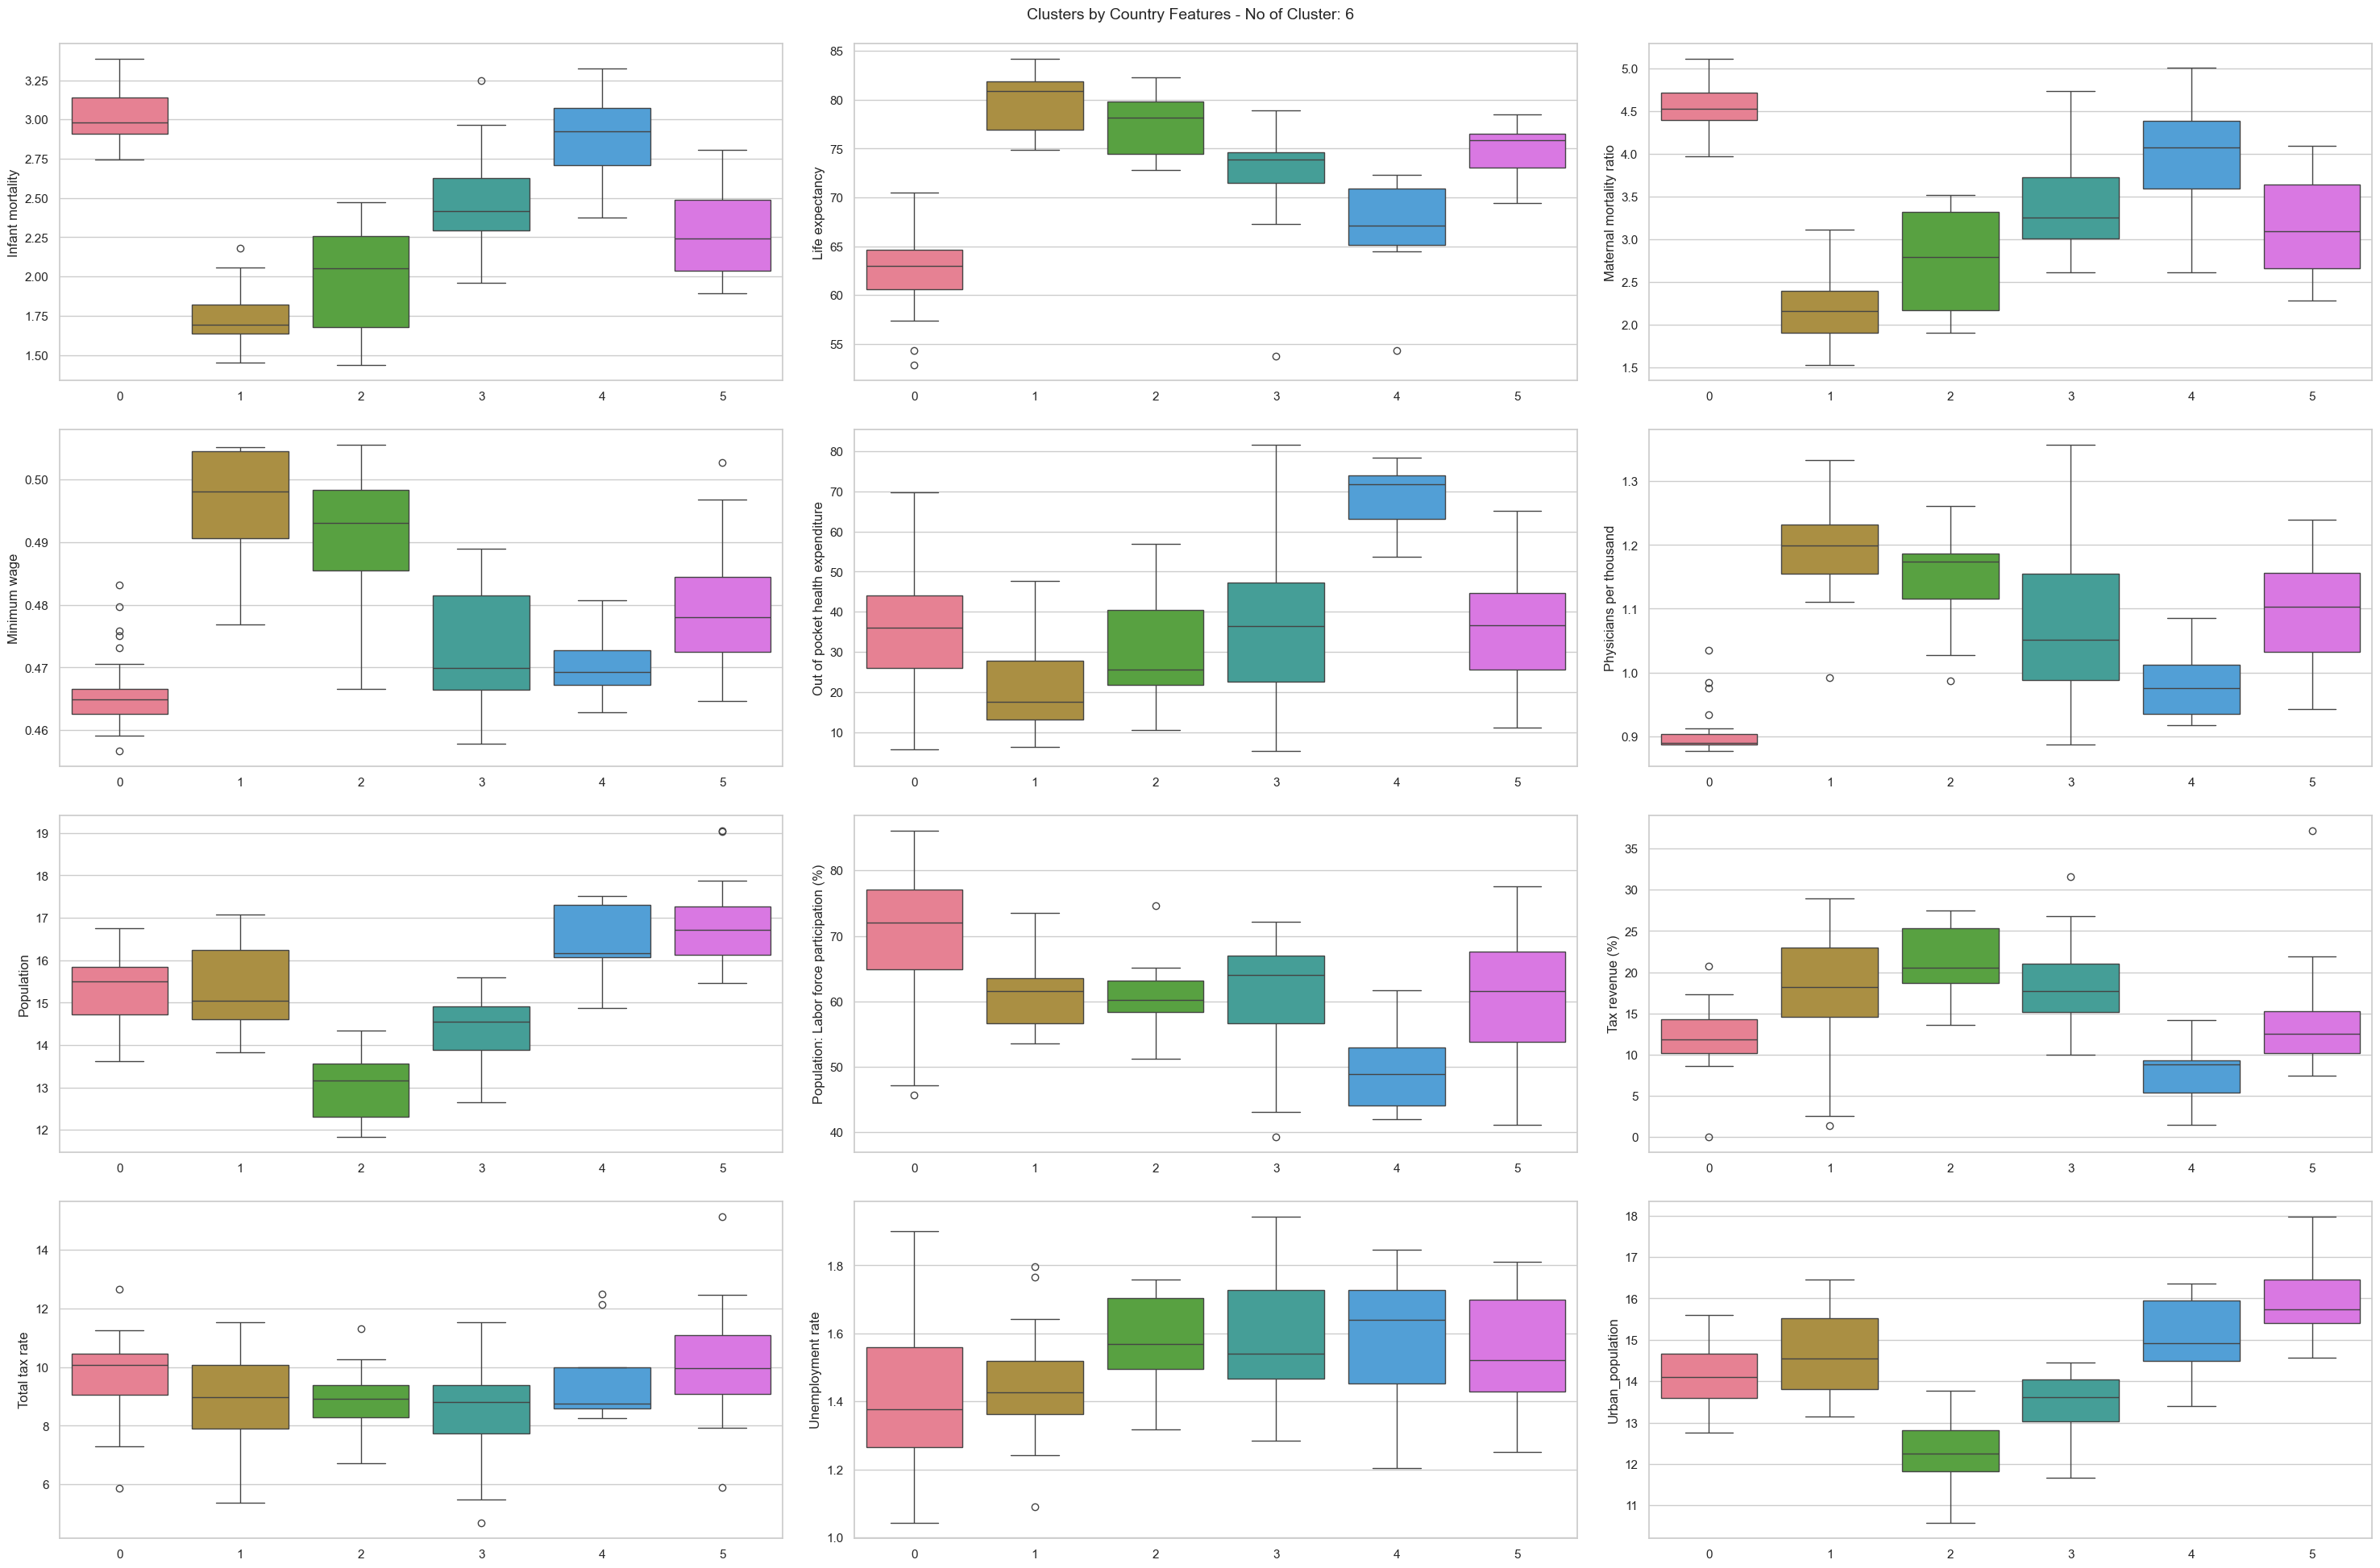

In [225]:
def cluster_boxplots(scaled_dataset, original_dataset, features, k_values=[ 4, 6], plot_size=(30, 20), add_info=''):
    num_features = len(features)
    num_rows, num_cols = divmod(num_features, 3)
    if num_cols > 0:
        num_rows += 1

    for k in k_values:
        km = KMeans(init='k-means++', n_clusters=k, random_state=98)
        km.fit(scaled_dataset)
        original_dataset['cluster'] = km.labels_

        # Generating a color palette for each cluster
        cluster_palette = sns.color_palette('husl', n_colors=k)
        
        fig, axes = plt.subplots(num_rows, 3, figsize=plot_size)

        for i, feature in enumerate(features):
            row, col = divmod(i, 3)
            ax = axes[row, col] if num_rows > 1 else axes[col]
            sns.boxplot(x='cluster', y=feature, data=original_dataset, ax=ax, palette=cluster_palette)
            ax.set_xlabel('')

        fig.suptitle('Clusters by Country Features - No of Cluster: {}{}'.format(k, add_info), fontsize=14)
        plt.tight_layout(pad=2)
        plt.show()

# Example usage:
selected_features = ['Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure',
                      'Physicians per thousand', 'Population', 'Population: Labor force participation (%)',
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

cluster_boxplots(pca_data, bc_data, selected_features, k_values=[4, 6])

In [122]:
silhouette={'Dataset':[], 'Silhouette_Score':[]}
km = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(scaled_ds)
silhouette['Dataset'].append('Original number of features')
silhouette['Silhouette_Score'].append(silhouette_score(scaled_ds, km.labels_))
km.fit(pca_data)
silhouette['Dataset'].append('PCA')
silhouette['Silhouette_Score'].append(silhouette_score(pca_data, km.labels_))
pd.DataFrame(silhouette['Silhouette_Score'], index=silhouette['Dataset'], columns=['Silhouette_Score'])

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette_Score
Original number of features          0.186860
PCA                                  0.207754

In [123]:
# I define a function to plot the dendrogram from the Hierarchical Agglomerative Clustering algorithm\
## using the dendrogram method available in scipy.

def plot_dendrogram(model, p=50, dend_title='Hierarchical Clustering Dendrogram', size=(16,6), x_line=0, y_line=0, x_text=0,\
                    y_text=0, text=''):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    plt.figure(figsize=(size))
    den = hierarchy.dendrogram(linkage_matrix, orientation='top', p=p, truncate_mode='lastp', show_leaf_counts=True)
    plt.plot(x_line,y_line, color='orange')
    plt.text(x_text, y_text, text)
    plt.title(dend_title)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.ylabel('Distance')
    plt.show()

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


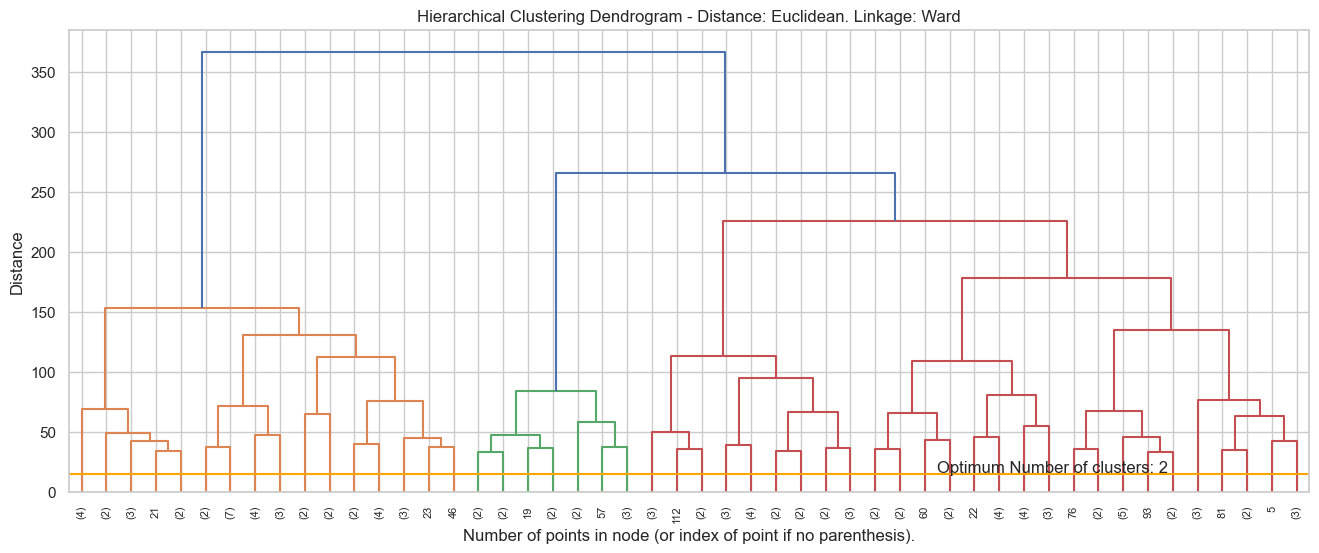

In [124]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='ward')
hac.fit(bc_data)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Ward', x_line=range(600),
                y_line=np.full((600,), 15), x_text=350, y_text=16, text='Optimum Number of clusters: 2')


/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


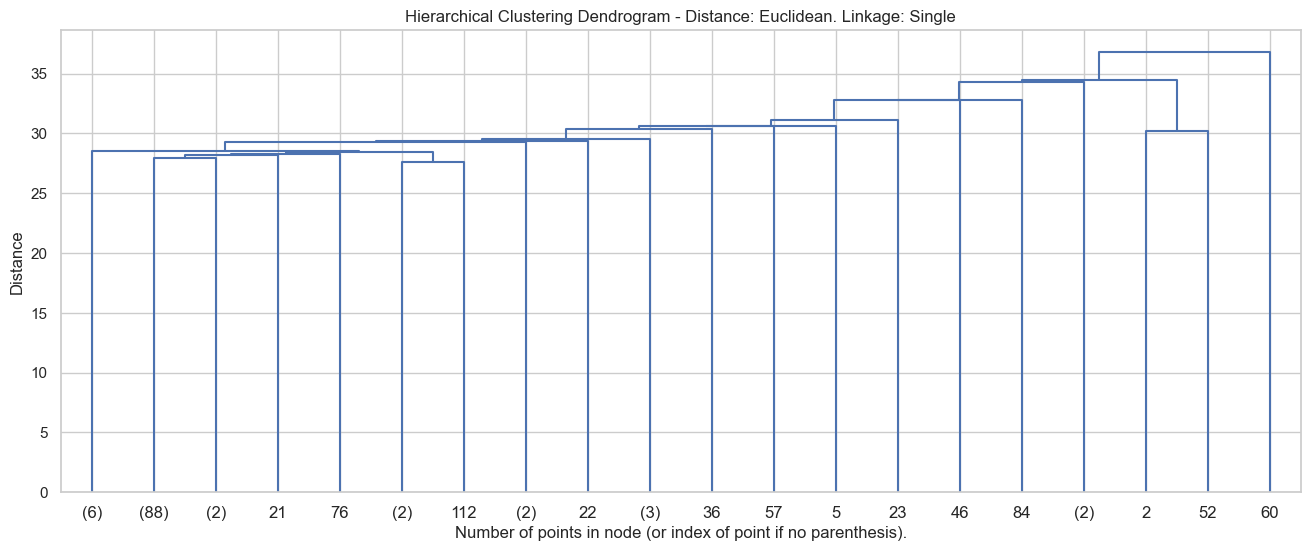

In [125]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='single')
hac.fit(bc_data)
plot_dendrogram(hac, dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Single', p=20)

/Users/thekhemfee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


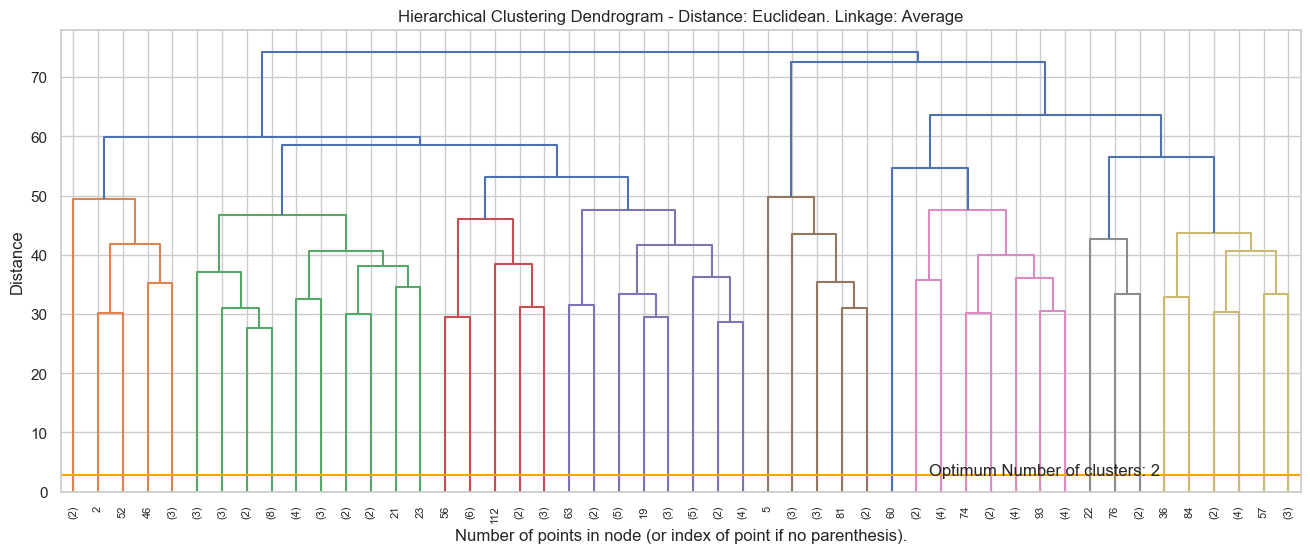

In [126]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='average')
hac.fit(bc_data)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Average', p=50,\
                x_line=range(600), y_line=np.full((600,), 2.75), x_text=350, y_text=2.8, text='Optimum Number of clusters: 2')


In [ ]:
radius = np.arange(0.5, 10, 0.05)
min_obs = range(5,61)
distances = ['euclidean', 'manhattan']
dbscan_perf = {'Distance':[], 'Radius':[], 'Min_Points':[], 'N_Cluster':[], 'Silhouette_Coefficient':[]}

for d in distances: 
    for r in radius:
        for m in min_obs:
            dbs = DBSCAN(eps=r, min_samples=m, metric=d)
            dbs.fit(bc_data)
            #bc_data['cluster'] = dbs.labels_
            dbscan_perf['Distance'].append(d)
            dbscan_perf['Radius'].append(r)
            dbscan_perf['Min_Points'].append(m)
            dbscan_perf['N_Cluster'].append(len(np.unique(dbs.labels_)))
            try:
                dbscan_perf['Silhouette_Coefficient'].append(silhouette_score(bc_data, dbs.labels_))
            except:
                dbscan_perf['Silhouette_Coefficient'].append(np.nan)
    
dbscan_perf = pd.DataFrame(dbscan_perf)

In [128]:
np.sort(dbscan_perf['N_Cluster'].unique())


array([1])

In [129]:
print("Greatest Silhouette Coefficient per Number of Clusters:")
dbscan_perf.groupby(['N_Cluster'], as_index=True)[['Silhouette_Coefficient']].max().loc[2:]

Greatest Silhouette Coefficient per Number of Clusters:


Empty DataFrame
Columns: [Silhouette_Coefficient]
Index: []